In [1]:
import yt
import unyt
# import yt_idv
import caesar
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D
# from matplotlib.patches import Rectangle

import sklearn
import pprint

import os
import copy
import gc

In [2]:
gc.isenabled()

True

In [3]:
def euclidean_distance(a, b):
    assert np.shape(a) == np.shape(b), f'Shapes of a and b are different'
    return(np.sqrt(np.sum((a-b)**2, axis=np.ndim(a)-1, keepdims=True)))

# Dictionary of simulation runs

In [4]:
sim_dict = {
    'Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)':{
        'res_level':'1',
        'halo_id':'3224',
        'target_m500c':unyt.unyt_array(1e13, 'Msun'),
        'snap_num0':151,
        'snap_dir':'/project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/',
        'snap_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}/snapshot_{snap_num:03}.hdf5',
        'caesar_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}/caesar_fof/caesar_{snap_num:03}_haloid-fof_lowres-[2].hdf5',
        'marker':'o',
    },
    'Hyenas-C Smag L1 Halo 3224 (Simba-C L1 Calibration)':{
        'res_level':'1',
        'halo_id':'3224',
        'target_m500c':unyt.unyt_array(1e13, 'Msun'),
        'snap_num0':151,
        'snap_dir':'/project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_smag/',
        'snap_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}_smag/snapshot_{snap_num:03}.hdf5',
        'caesar_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}_smag/caesar_fof/caesar_{snap_num:03}_haloid-fof_lowres-[2].hdf5',
        'marker':'^',
    },
    'Hyenas-C Grad L1 Halo 3224 (Simba-C L1 Calibration)':{
        'res_level':'1',
        'halo_id':'3224',
        'target_m500c':unyt.unyt_array(1e13, 'Msun'),
        'snap_num0':151,
        'snap_dir':'/project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_grad/',
        'snap_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}_grad/snapshot_{snap_num:03}.hdf5',
        'caesar_file_fn':lambda res_level, halo_id, snap_num : f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}_grad/caesar_fof/caesar_{snap_num:03}_haloid-fof_lowres-[2].hdf5',
        'marker':'x',
    },
    # 'Hyenas L1 Halo 3224':{
    #     'res_level':'1',
    #     'halo_id':'3224',
    #     'snap_num0':151,
    #     'target_m500c':unyt.unyt_array(1e13, 'Msun'),
    #     'snap_dir':'/home/b/babul/wcui/data/HYENAS/Level1/halo_3224/',
    #     'snap_file_fn':lambda res_level, halo_id, snap_num : f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/snap_halo_{halo_id}_{snap_num:03}.hdf5',
    #     'caesar_file_fn':lambda res_level, halo_id, snap_num : f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num:03}.hdf5',
    #     'marker':'^',
    # },
}

In [5]:
# sim_dict['Hyenas-C L1 Halo 3224']['marker'] = 'o'
# sim_dict['Hyenas L1 Halo 3224']['marker'] = '^'

# Redshift 0 snapshot

## Load particle information from redshift 0 snapshot with yt

In [6]:
for sim, sim_info in sim_dict.items():
    print(sim)
    snap_file0 = sim_info['snap_file_fn'](sim_info['res_level'], sim_info['halo_id'], sim_info['snap_num0'])
    snap0 = yt.load(snap_file0)
    sim_info['snap0'] = snap0

    sim_info['snap_props'] = {
        'age0':snap0.current_time.in_units('Gyr'),
        'redshift0':snap0.current_redshift,
        'box_size0':snap0.domain_width.in_units('Mpc/h'),
        'field_list0':snap0.field_list,
        'derived_field_list0':snap0.derived_field_list,
        'particle_types0':snap0.particle_types,
        'particle_type_counts0':snap0.particle_type_counts,
    }

    # sim_info['age0'] = snap0.current_time.in_units('Gyr')
    # sim_info['redshift0'] = snap0.current_redshift
    # sim_info['box_size0'] = snap0.domain_width.in_units('Mpc/h')
    # sim_info['field_list0'] = snap0.field_list
    # sim_info['derived_field_list0'] = snap0.derived_field_list
    # sim_info['particle_types0'] = snap0.particle_types
    # sim_info['particle_type_counts0'] = snap0.particle_type_counts

    print()

Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)


yt : [INFO     ] 2025-08-10 18:50:51,471 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:50:51,484 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-08-10 18:50:51,484 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:50:51,582 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-08-10 18:50:51,582 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:50:51,583 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:50:51,583 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:50:51,584 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:50:51,584 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-08-10 18:50:51,584 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:50:51,585 


Hyenas-C Smag L1 Halo 3224 (Simba-C L1 Calibration)


yt : [INFO     ] 2025-08-10 18:50:53,359 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-08-10 18:50:53,360 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:50:53,360 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:50:53,361 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:50:53,361 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:50:53,362 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-08-10 18:50:53,362 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:50:53,362 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:50:53,363 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 18:50:53,363 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 18:50:53,887 Allocating for 4.322e+07 particles



Hyenas-C Grad L1 Halo 3224 (Simba-C L1 Calibration)


yt : [INFO     ] 2025-08-10 18:50:55,169 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3870.47it/s]


In [7]:
pprint.pprint(sim_dict)

{'Hyenas-C Grad L1 Halo 3224 (Simba-C L1 Calibration)': {'caesar_file_fn': <function <lambda> at 0x14d14047b920>,
                                                         'halo_id': '3224',
                                                         'marker': 'x',
                                                         'res_level': '1',
                                                         'snap0': GizmoDataset: /project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_grad/snapshot_151.hdf5,
                                                         'snap_dir': '/project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_grad/',
                                                         'snap_file_fn': <function <lambda> at 0x14d14047b880>,
                                                         'snap_num0': 151,
                                                         'snap_props': {'age0': unyt_quantity(13.86308399, 'Gyr'),
                     

## Load caesar file of redshift 0 snapshot

In [8]:
for sim, sim_info in sim_dict.items():
    print(sim)
    caesar_file0 = sim_info['caesar_file_fn'](sim_info['res_level'], sim_info['halo_id'], sim_info['snap_num0'])
    obj0 = caesar.load(caesar_file0)
    sim_info['obj0'] = obj0

    print()

yt : [INFO     ] 2025-08-10 18:51:06,689 Opening /project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224/caesar_fof/caesar_151_haloid-fof_lowres-[2].hdf5
yt : [INFO     ] 2025-08-10 18:51:06,830 Found 17826 halos
yt : [INFO     ] 2025-08-10 18:51:06,835 Found 1343 galaxies
yt : [INFO     ] 2025-08-10 18:51:06,880 Opening /project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_smag/caesar_fof/caesar_151_haloid-fof_lowres-[2].hdf5


Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)

Hyenas-C Smag L1 Halo 3224 (Simba-C L1 Calibration)


yt : [INFO     ] 2025-08-10 18:51:06,902 Found 18276 halos
yt : [INFO     ] 2025-08-10 18:51:06,944 Found 1048 galaxies
yt : [INFO     ] 2025-08-10 18:51:06,950 Opening /project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_grad/caesar_fof/caesar_151_haloid-fof_lowres-[2].hdf5
yt : [INFO     ] 2025-08-10 18:51:06,991 Found 18355 halos
yt : [INFO     ] 2025-08-10 18:51:06,998 Found 1012 galaxies



Hyenas-C Grad L1 Halo 3224 (Simba-C L1 Calibration)



## Find desired halo in redshift 0 snapshot

In [9]:
m500c_contamination_check_list = [1e6, 1e7, 1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14]

Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)



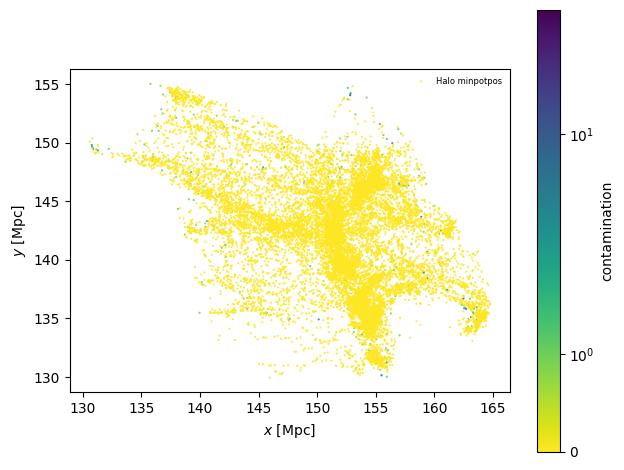

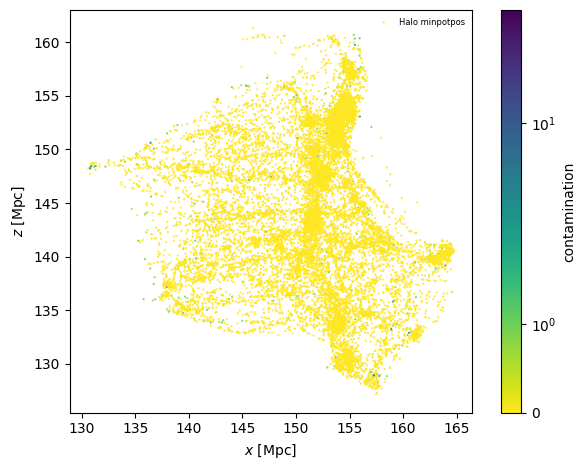

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)
/tmp/ipykernel_3186304/803154529.py:39: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),


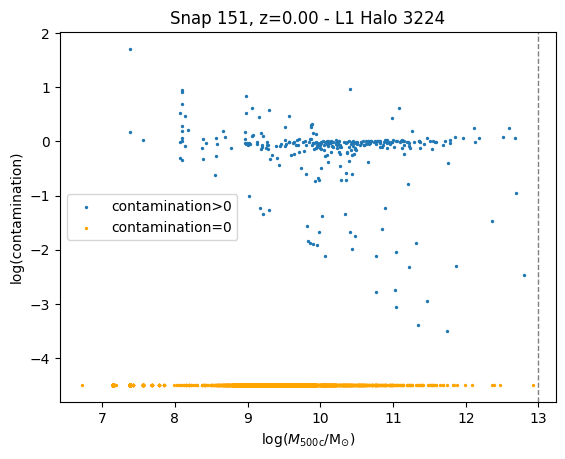



Number of contaminated halos: 714
Number of uncontaminated halos: 17112

Number of contaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0
Number of uncontaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 1

Number of contaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 3
Number of uncontaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 616

Number of contaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 34
Number of uncontaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 427

Number of contaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 84
Number of uncontaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 1830

Number of contaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 121
Number of uncontaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 414

Number of contaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 49
Number of uncontaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 53

Number of contaminated halos

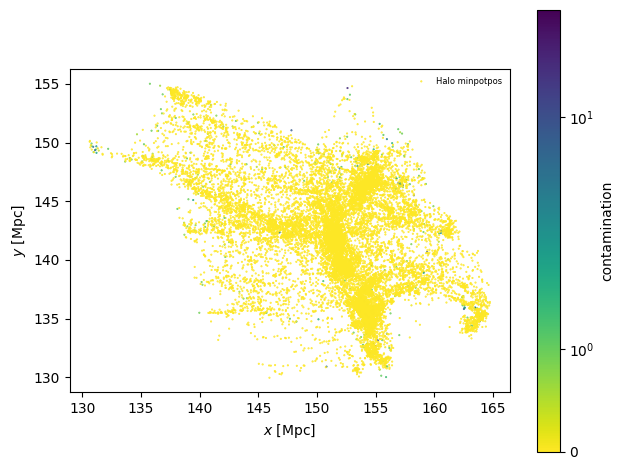

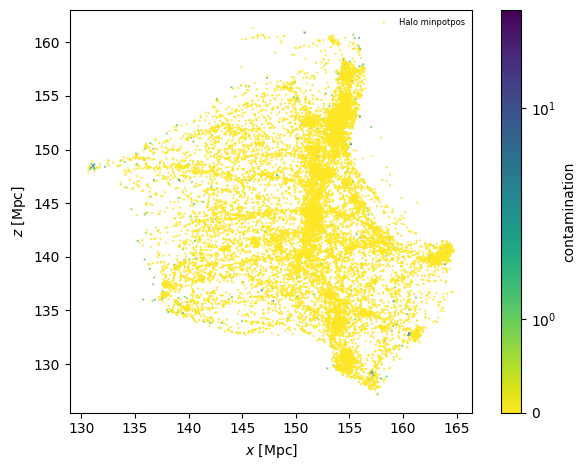

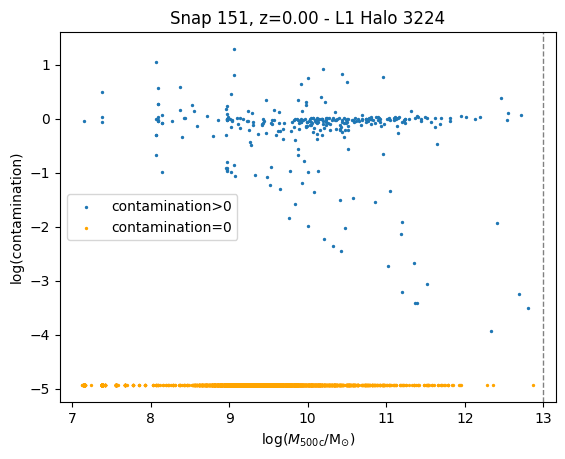



Number of contaminated halos: 785
Number of uncontaminated halos: 17491

Number of contaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0
Number of uncontaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0

Number of contaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 4
Number of uncontaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 625

Number of contaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 43
Number of uncontaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 451

Number of contaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 83
Number of uncontaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 1931

Number of contaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 122
Number of uncontaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 425

Number of contaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 47
Number of uncontaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 59

Number of contaminated halos

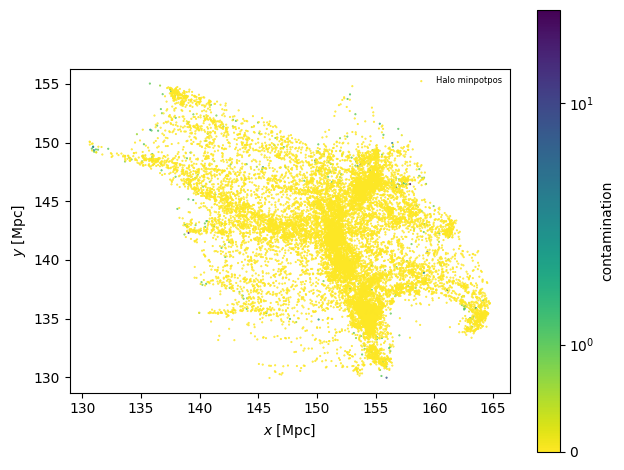

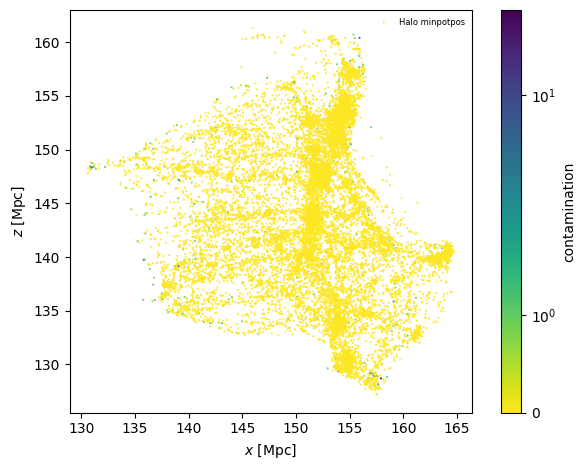

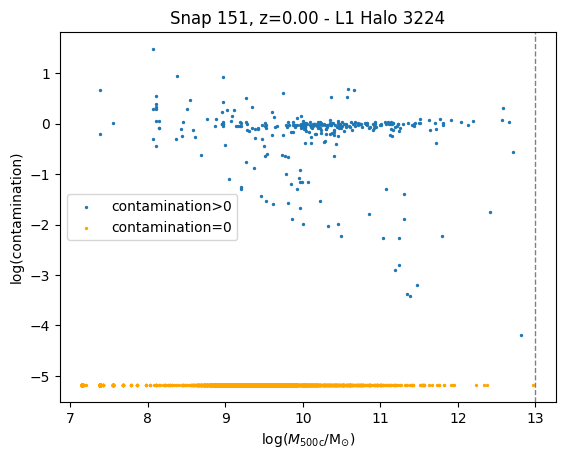



Number of contaminated halos: 770
Number of uncontaminated halos: 17585

Number of contaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0
Number of uncontaminated halos with M500>=1e+06Msun and M500<1e+07Msun: 0

Number of contaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 3
Number of uncontaminated halos with M500>=1e+07Msun and M500<1e+08Msun: 589

Number of contaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 36
Number of uncontaminated halos with M500>=1e+08Msun and M500<1e+09Msun: 443

Number of contaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 79
Number of uncontaminated halos with M500>=1e+09Msun and M500<1e+10Msun: 1870

Number of contaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 123
Number of uncontaminated halos with M500>=1e+10Msun and M500<1e+11Msun: 407

Number of contaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 50
Number of uncontaminated halos with M500>=1e+11Msun and M500<1e+12Msun: 58

Number of contaminated halos

In [10]:
for sim, sim_info in sim_dict.items():
    print(sim)
    print()

    halo_minpotpos_z0 = unyt.unyt_array([halo.minpotpos.in_units('Mpc') for halo in sim_info['obj0'].halos])
    halo_m500c_z0 = unyt.unyt_array([halo.virial_quantities['m500c'] for halo in sim_info['obj0'].halos])
    halo_contamination_z0 = unyt.unyt_array([halo.contamination for halo in sim_info['obj0'].halos])


    p=plt.scatter(halo_minpotpos_z0[:,0], halo_minpotpos_z0[:,1],
                s=0.25, c=halo_contamination_z0, cmap='viridis_r', norm='symlog',
                label='Halo minpotpos')
    plt.xlabel(rf'$x$ [{halo_minpotpos_z0.units}]')
    plt.ylabel(rf'$y$ [{halo_minpotpos_z0.units}]')
    plt.colorbar(mappable=p, label='contamination')
    plt.legend(fontsize=6, framealpha=0)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
    print()

    p=plt.scatter(halo_minpotpos_z0[:,0], halo_minpotpos_z0[:,2],
                s=0.25, c=halo_contamination_z0, cmap='viridis_r', norm='symlog',
                label='Halo minpotpos')
    plt.xlabel(rf'$x$ [{halo_minpotpos_z0.units}]')
    plt.ylabel(rf'$z$ [{halo_minpotpos_z0.units}]')
    plt.colorbar(mappable=p, label='contamination')
    plt.legend(fontsize=6, framealpha=0)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
    print()

    halo_nonzero_contamination_index_z0 = np.nonzero(np.array(halo_contamination_z0)!=0)[0]
    halo_contamination0_index_z0 = np.nonzero(np.array(halo_contamination_z0)==0)[0]
    value_of_contamination0_z0 = min(np.log10(halo_contamination_z0)[np.array(halo_contamination_z0)>0])-1

    plt.scatter(np.log10(halo_m500c_z0), np.log10(halo_contamination_z0), s=2, label='contamination>0')
    plt.scatter(np.log10(np.array(halo_m500c_z0)[halo_contamination0_index_z0]),
                np.full(len(halo_contamination0_index_z0), value_of_contamination0_z0),
                s=2, color='orange', label='contamination=0')
    plt.axvline(np.log10(sim_info['target_m500c']), ls='--', lw=1, color='grey')
    plt.title(f'Snap {sim_info['snap_num0']}, z={sim_info['snap_props']['redshift0']:.2f} - L{sim_info['res_level']} Halo {sim_info['halo_id']}')
    plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
    plt.ylabel('log(contamination)')
    plt.legend()
    plt.show()
    print()

    # halo_m500c_nonzero_contamination_z0 = np.array(halo_m500c_z0)[halo_nonzero_contamination_index_z0]
    halo_m500c_nonzero_contamination_z0 = unyt.unyt_array(halo_m500c_z0)[halo_nonzero_contamination_index_z0]
    # halo_m500c_contamination0_z0 = np.array(halo_m500c_z0)[halo_contamination0_index_z0]
    halo_m500c_contamination0_z0 = unyt.unyt_array(halo_m500c_z0)[halo_contamination0_index_z0]

    print()
    print(f'Number of contaminated halos: {len(halo_nonzero_contamination_index_z0)}')
    print(f'Number of uncontaminated halos: {len(halo_contamination0_index_z0)}')
    print()
    for ii in range(len(m500c_contamination_check_list)):
        m500c_to_check = m500c_contamination_check_list[ii]
    
        try:
            next_m500c = m500c_contamination_check_list[ii+1]
        except:
            print('No next m500c')
            continue
    
        idx_m500c_contaminated = np.where(np.logical_and(halo_m500c_nonzero_contamination_z0>=m500c_to_check, halo_m500c_nonzero_contamination_z0<next_m500c))[0]
        m500c_contaminated = halo_m500c_nonzero_contamination_z0[idx_m500c_contaminated]
        print(rf'Number of contaminated halos with M500>={m500c_to_check:.0e}Msun and M500<{next_m500c:.0e}Msun: {len(m500c_contaminated)}')
    
        idx_m500c_uncontaminated = np.where(np.logical_and(halo_m500c_contamination0_z0>=m500c_to_check, halo_m500c_contamination0_z0<next_m500c))[0]
        m500c_uncontaminated = halo_m500c_contamination0_z0[idx_m500c_uncontaminated]
        print(rf'Number of uncontaminated halos with M500>={m500c_to_check:.0e}Msun and M500<{next_m500c:.0e}Msun: {len(m500c_uncontaminated)}')
        
        print()
    print()
    print()


    ## Using only halos with 0 contamination, choose halo with mass closest to target mass
    # halo_m500c_contamination0_z0 = unyt.unyt_array(halo_m500c_z0)[halo_contamination0_index_z0]
    target_halo_index_z0 = halo_contamination0_index_z0[np.argmin(np.abs(halo_m500c_contamination0_z0 - sim_info['target_m500c']))]
    target_halo_z0 = obj0.halos[target_halo_index_z0]

    ## Central galaxy of target halo
    target_central_z0 = target_halo_z0.central_galaxy
    target_central_index_z0 = target_central_z0.GroupID

    print(f'Target halo index at z=0: {target_halo_index_z0}')
    print(f'Target central index at z=0: {target_central_index_z0}')
    print()
    

    sim_info['caesar_props'] = {
        'halo_minpotpos_z0':halo_minpotpos_z0,
        'halo_m500c_z0':halo_m500c_z0,
        'halo_contamination_z0':halo_contamination_z0,
        'halo_nonzero_contamination_index_z0':halo_nonzero_contamination_index_z0,
        'halo_contamination0_index_z0':halo_contamination0_index_z0,
        'value_of_contamination0_z0':value_of_contamination0_z0,
        'halo_m500c_nonzero_contamination_z0':halo_m500c_nonzero_contamination_z0,
        'halo_m500c_contamination0_z0':halo_m500c_contamination0_z0,
    }

    sim_info['target_halo'] = {
        'target_halo_index_z0':target_halo_index_z0,
        'target_halo_z0':target_halo_z0,
        'target_central_index_z0':target_central_index_z0,
        'target_central_z0':target_central_z0,
    }

    print()
    print()

## Get halo properties of target halo at redshift 0

Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)

target_halo_m200c_z0 = 13199843786752.0 Msun
log(target_halo_m200c_z0) = 13.120568791588195
target_halo_m500c_z0 = 8470416326656.0 Msun
log(target_halo_m500c_z0) = 12.927904756721011
target_halo_contamination_z0 = 0.0



/tmp/ipykernel_3186304/1853691398.py:25: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(sim_info['caesar_props']['halo_m500c_z0'])[sim_info['caesar_props']['halo_contamination0_index_z0']]),


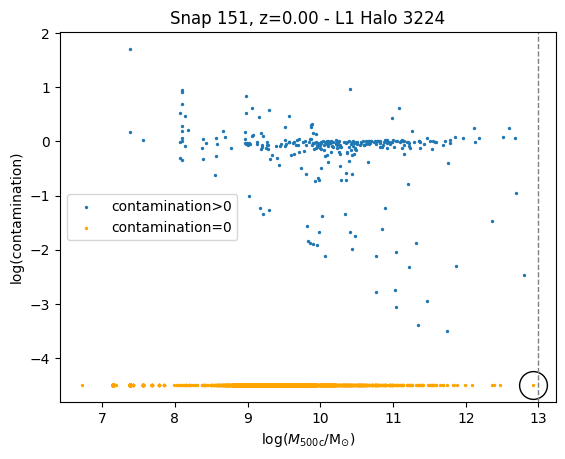

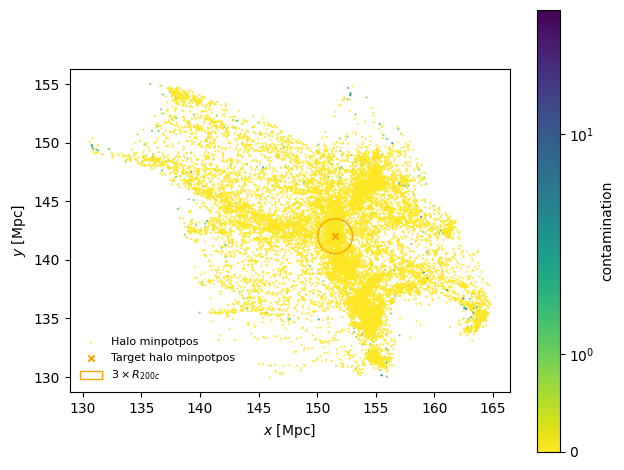

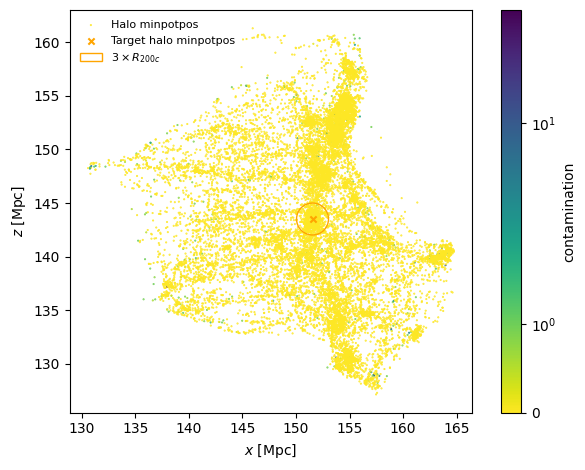




Hyenas-C Smag L1 Halo 3224 (Simba-C L1 Calibration)

target_halo_m200c_z0 = 10250492051456.0 Msun
log(target_halo_m200c_z0) = 13.010744713206709
target_halo_m500c_z0 = 7409644339200.0 Msun
log(target_halo_m500c_z0) = 12.869797362469225
target_halo_contamination_z0 = 0.0



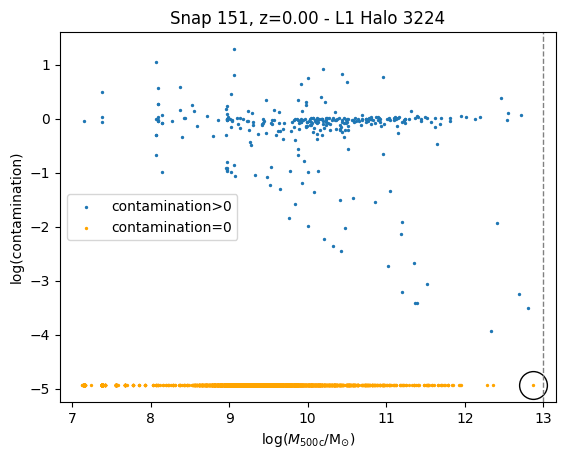

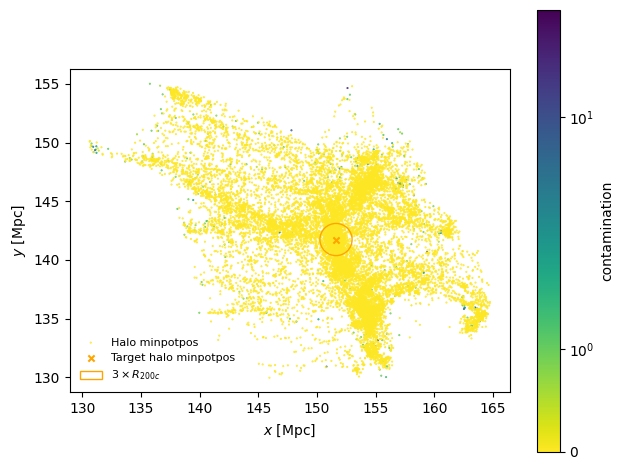

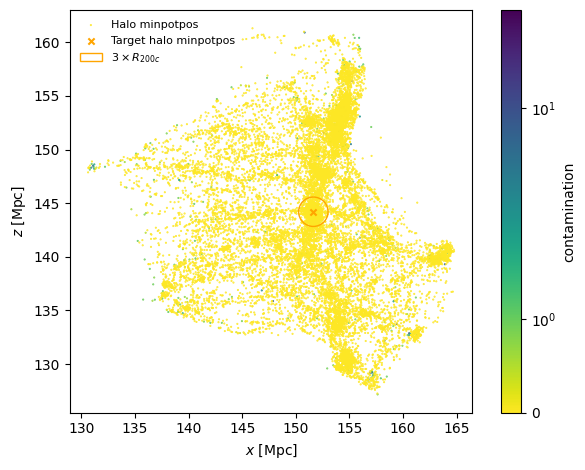




Hyenas-C Grad L1 Halo 3224 (Simba-C L1 Calibration)

target_halo_m200c_z0 = 12869592678400.0 Msun
log(target_halo_m200c_z0) = 13.109564801735575
target_halo_m500c_z0 = 9381457428480.0 Msun
log(target_halo_m500c_z0) = 12.972270312150792
target_halo_contamination_z0 = 0.0



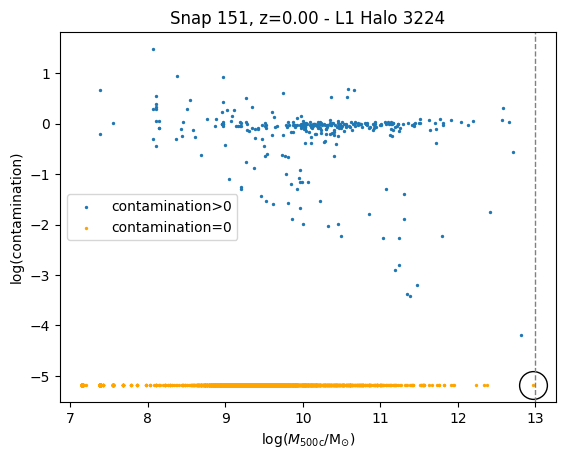

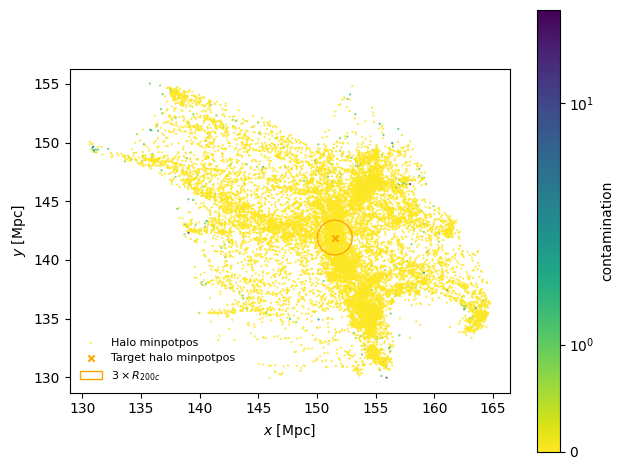

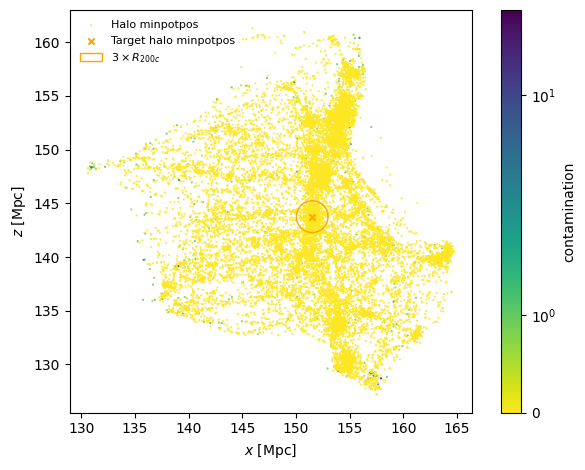

In [11]:
for sim, sim_info in sim_dict.items():
    print(sim)
    print()

    obj0 = sim_info['obj0']
    target_halo_index_z0 = sim_info['target_halo']['target_halo_index_z0']

    target_halo_minpotpos_z0 = obj0.halos[target_halo_index_z0].minpotpos.in_units('Mpc')
    target_halo_m200c_z0 = obj0.halos[target_halo_index_z0].virial_quantities['m200c']
    target_halo_m500c_z0 = obj0.halos[target_halo_index_z0].virial_quantities['m500c']
    target_halo_r500c_z0 = obj0.halos[target_halo_index_z0].virial_quantities['r500c'].in_units('Mpc')
    target_halo_r200c_z0 = obj0.halos[target_halo_index_z0].virial_quantities['r200c'].in_units('Mpc')
    target_halo_contamination_z0 = obj0.halos[target_halo_index_z0].contamination

    print(f'target_halo_m200c_z0 = {target_halo_m200c_z0}')
    print(f'log(target_halo_m200c_z0) = {np.log10(target_halo_m200c_z0)}')
    print(f'target_halo_m500c_z0 = {target_halo_m500c_z0}')
    print(f'log(target_halo_m500c_z0) = {np.log10(target_halo_m500c_z0)}')
    print(f'target_halo_contamination_z0 = {target_halo_contamination_z0}')
    print()


    plt.scatter(np.log10(sim_info['caesar_props']['halo_m500c_z0']),
                np.log10(sim_info['caesar_props']['halo_contamination_z0']), s=2, label='contamination>0')
    plt.scatter(np.log10(np.array(sim_info['caesar_props']['halo_m500c_z0'])[sim_info['caesar_props']['halo_contamination0_index_z0']]),
                np.full(len(sim_info['caesar_props']['halo_contamination0_index_z0']),
                        sim_info['caesar_props']['value_of_contamination0_z0']),
                s=2, color='orange', label='contamination=0')
    plt.plot(np.log10(target_halo_m500c_z0),
             target_halo_contamination_z0 if target_halo_contamination_z0>0 else sim_info['caesar_props']['value_of_contamination0_z0'],
             'o', ms=20, mec='black', mfc='none', mew=1)
    plt.axvline(np.log10(sim_info['target_m500c']), ls='--', lw=1, color='grey')
    plt.title(f'Snap {sim_info['snap_num0']}, z={sim_info['snap_props']['redshift0']:.2f} - L{sim_info['res_level']} Halo {sim_info['halo_id']}')
    plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
    plt.ylabel('log(contamination)')
    plt.legend()
    plt.show()
    print()
    

    p=plt.scatter(sim_info['caesar_props']['halo_minpotpos_z0'][:,0],
                  sim_info['caesar_props']['halo_minpotpos_z0'][:,1],
                  s=0.25, c=sim_info['caesar_props']['halo_contamination_z0'],
                  cmap='viridis_r', norm='symlog', label='Halo minpotpos')
    plt.scatter(target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[0],
                target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[1],
                s=20, marker='x', c='orange', label='Target halo minpotpos')
    r200c_x3_circle = plt.Circle((target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[0],
                                  target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[1]),
                                 3*target_halo_r200c_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units),
                                 fill=False, ec='orange', lw=1, label=r'$3 \times R_{200c}$')
    plt.gca().add_patch(r200c_x3_circle)
    plt.xlabel(rf'$x$ [{sim_info['caesar_props']['halo_minpotpos_z0'].units}]')
    plt.ylabel(rf'$y$ [{sim_info['caesar_props']['halo_minpotpos_z0'].units}]')
    plt.colorbar(mappable=p, label='contamination')
    plt.legend(fontsize=8, framealpha=0)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
    print()

    p=plt.scatter(sim_info['caesar_props']['halo_minpotpos_z0'][:,0],
                  sim_info['caesar_props']['halo_minpotpos_z0'][:,2],
                  s=0.25, c=sim_info['caesar_props']['halo_contamination_z0'],
                  cmap='viridis_r', norm='symlog', label='Halo minpotpos')
    plt.scatter(target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[0],
                target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[2],
                s=20, marker='x', c='orange', label='Target halo minpotpos')
    r200c_x3_circle = plt.Circle((target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[0],
                                  target_halo_minpotpos_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units)[2]),
                                 3*target_halo_r200c_z0.in_units(sim_info['caesar_props']['halo_minpotpos_z0'].units),
                                 fill=False, ec='orange', lw=1, label=r'$3 \times R_{200c}$')
    plt.gca().add_patch(r200c_x3_circle)
    plt.xlabel(rf'$x$ [{sim_info['caesar_props']['halo_minpotpos_z0'].units}]')
    plt.ylabel(rf'$z$ [{sim_info['caesar_props']['halo_minpotpos_z0'].units}]')
    plt.colorbar(mappable=p, label='contamination')
    plt.legend(fontsize=8, framealpha=0)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
    print()
    

    sim_info['target_halo']['target_halo_minpotpos_z0'] = target_halo_minpotpos_z0
    sim_info['target_halo']['target_halo_m200c_z0'] = target_halo_m200c_z0
    sim_info['target_halo']['target_halo_m500c_z0'] = target_halo_m500c_z0
    sim_info['target_halo']['target_halo_r500c_z0'] = target_halo_r500c_z0
    sim_info['target_halo']['target_halo_r200c_z0'] = target_halo_r200c_z0
    sim_info['target_halo']['target_halo_contamination_z0'] = target_halo_contamination_z0

    print()
    print()

# All other snapshots

## Iterate through all snapshots, saving target halo properties

In [12]:
## Sphere for checking mass ratios of halos with target halo
sphere_radius_type = 'r500c'
sphere_radius_factor = 10

mass_ratio_type = 'm500c'
major_merger_mass_ratio = 5

In [13]:
prop_names = ['snap_num',
              'age_halo', 'age_central', 'age_central_tracked',
              'z_halo', 'z_central', 'z_central_tracked',
              'index_halo', 'index_central', 'index_central_tracked',
              'contamination_halo',
              'minpotpos_halo', 'minpotpos_central', 'minpotpos_central_tracked',
              'num_major_mergers_halo',
              'bh_mdot_central', 'bh_mdot_central_tracked',
              'bh_fedd_central', 'bh_fedd_central_tracked',
              'bh_mdot_edd_central', 'bh_mdot_edd_central_tracked',]

central_types = ['', '_tracked']

delta_values = ['2500', '500', '200']
for delta_value in delta_values:
    prop_names.append(f'm{delta_value}c_halo')
    prop_names.append(f'r{delta_value}c_halo')

virial_quantities = ['circular_velocity', 'spin_param', 'temperature']
for quant in virial_quantities:
    prop_names.append(f'{quant}_halo')

sfr_types = ['', '_100']
for sfr_type in sfr_types:
    prop_names.append(f'sfr{sfr_type}_halo')
    prop_names.append(f'ssfr{sfr_type}_halo')
    for central_type in central_types:
        prop_names.append(f'sfr{sfr_type}_central{central_type}')
        prop_names.append(f'ssfr{sfr_type}_central{central_type}')

halo_mass_types = ['gas', 'stellar', 'dm', 'dust', 'H2']
for halo_mass_type in halo_mass_types:
    prop_names.append(f'{halo_mass_type}_mass_halo')

halo_radii_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
halo_radii_XX = ['half_mass', 'r20', 'r80']
for halo_radii_type in halo_radii_types:
    for XX in halo_radii_XX:
        prop_names.append(f'{halo_radii_type}_{XX}_radius_halo')

halo_metallicity_types = ['mass_weighted', 'sfr_weighted', 'stellar', 'mass_weighted_cgm', 'temp_weighted_cgm']
for halo_metal_type in halo_metallicity_types:
    prop_names.append(f'{halo_metal_type}_metallicity_halo')

halo_velocity_dispersion_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
for halo_vel_disp_type in halo_velocity_dispersion_types:
    prop_names.append(f'{halo_vel_disp_type}_velocity_dispersion_halo')

# halo_rotation_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
# halo_rotation_XX = ['L', 'ALPHA', 'BETA', 'BoverT', 'kappa_rot']
# for rot_type in halo_rotation_types:
#     for rot_XX in halo_rotation_XX:
#         prop_names.append(f'{rot_type}_{rot_XX}_rotation_halo')

halo_age_types = ['mass_weighted', 'metal_weighted']
for age_type in halo_age_types:
    prop_names.append(f'{age_type}_stellar_age_halo')

halo_temperature_types = ['mass_weighted', 'mass_weighted_cgm']#, 'temp_weighted_cgm']
for temp_type in halo_temperature_types:
    prop_names.append(f'{temp_type}_temperature_halo')

halo_local_density_types = ['300', '1000', '3000']
for dens_type in halo_local_density_types:
    prop_names.append(f'local_mass_density_{dens_type}kpccm_halo')
    prop_names.append(f'local_number_density_{dens_type}kpccm_halo')



central_mass_types = ['gas', 'stellar', 'bh', 'dust', 'HI', 'H2']#'dm',
central_mass_apertures = ['', '_30kpc']

central_radii_types = ['gas', 'stellar', 'baryon', 'total']#'dm',
central_radii_XX = ['half_mass', 'r20', 'r80']

central_metallicity_types = ['mass_weighted', 'sfr_weighted', 'stellar']

central_velocity_dispersion_types = ['gas', 'stellar', 'baryon', 'total']#'dm',

central_age_types = ['mass_weighted', 'metal_weighted']

central_temperature_types = ['mass_weighted', 'mass_weighted_cgm']#, 'temp_weighted_cgm']

for central_type in central_types:

    for central_mass_type in central_mass_types:
        for aperture in central_mass_apertures:
            if central_mass_type in ['stellar', 'dust'] and aperture=='_30kpc': continue
            prop_names.append(f'{central_mass_type}{aperture}_mass_central{central_type}')
    
    for central_radii_type in central_radii_types:
        for XX in central_radii_XX:
            prop_names.append(f'{central_radii_type}_{XX}_radius_central{central_type}')
    
    for central_metal_type in central_metallicity_types:
        prop_names.append(f'{central_metal_type}_metallicity_central{central_type}')
    
    for central_vel_disp_type in central_velocity_dispersion_types:
        prop_names.append(f'{central_vel_disp_type}_velocity_dispersion_central{central_type}')
    
    # central_rotation_types = ['gas', 'stellar', 'dm', 'baryon', 'total']
    # central_rotation_XX = ['L', 'ALPHA', 'BETA', 'BoverT', 'kappa_rot']
    # for rot_type in central_rotation_types:
    #     for rot_XX in central_rotation_XX:
    #         prop_names.append(f'{rot_type}_{rot_XX}_rotation_central{central_type}')
    
    for age_type in central_age_types:
        prop_names.append(f'{age_type}_stellar_age_central{central_type}')
    
    for temp_type in central_temperature_types:
        prop_names.append(f'{temp_type}_temperature_central{central_type}')

In [ ]:
for sim, sim_info in sim_dict.items():
    print(sim)
    print
    print()

    snap_num_list = range(0,sim_info['snap_num0']+1)
    # snap_num_list = range(149,152)
    # snap_num_list = [151]

    prop_dict = {}
    for prop_name in prop_names:
        prop_dict[prop_name] = []


    for snap_num in snap_num_list:
        print(f'Snapshot {snap_num}')

        snap_dir = sim_info['snap_dir']

        obj0 = sim_info['obj0']
        target_halo_index_z0 = sim_info['target_halo']['target_halo_index_z0']
        target_central_index_z0 = sim_info['target_halo']['target_central_index_z0']

        ## Load snapshot
        snap_file = sim_info['snap_file_fn'](sim_info['res_level'], sim_info['halo_id'], snap_num)
        try:
            snap = yt.load(snap_file)
        except Exception as e:
            print(e)
            print('No snapshot\n')
            continue
    
        ## Load caesar file
        caesar_file = sim_info['caesar_file_fn'](sim_info['res_level'], sim_info['halo_id'], snap_num)
        try:
            obj = caesar.load(caesar_file)
        except Exception as e:
            print(e)
            print()
            continue
    
        ## Link halos in snapshots with caesar progen
        caesar.progen.check_if_progen_is_present(caesar_file, 'progen_halo_dm')
        progens = caesar.progen.progen_finder(obj_current=obj0, obj_target=obj, caesar_file=caesar_file,
                                              snap_dir=snap_dir,#f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}',
                                              data_type='halo', part_type='dm', recompute=True,
                                              save=False, n_most=1, min_in_common=0.1, nproc=1,
                                              match_frac=True, reverse_match=False)
    
        target_halo_index = progens[0][target_halo_index_z0][0]
        target_halo = obj.halos[target_halo_index]
        try:
            target_central = target_halo.central_galaxy
        except:
            target_central = None
        print(f'Target halo index: {target_halo_index}')
        print(f'Target halo central galaxy: {target_central}')
        if target_central is not None:
            target_central_index = target_central.GroupID
            print(f'Target halo central galaxy index: {target_central_index}')
        # print()
    
        ## Link galaxies in snapshots with caesar progen
        caesar.progen.check_if_progen_is_present(caesar_file, 'progen_galaxy_star')
        try:
            gal_progens = caesar.progen.progen_finder(obj_current=obj0, obj_target=obj, caesar_file=caesar_file,
                                                      snap_dir=snap_dir,#f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}',
                                                      data_type='galaxy', part_type='star', recompute=True,
                                                      save=False, n_most=1, min_in_common=0.1, nproc=1,
                                                      match_frac=True, reverse_match=False)
        
            target_central_index_tracked = gal_progens[0][target_central_index_z0][0]
            target_central_tracked = obj.galaxies[target_central_index_tracked]
        except:
            target_central_index_tracked = -1
            target_central_tracked = None
        print(f'Target halo tracked central galaxy index: {target_central_index_tracked}')
        print(f'Target halo tracked central galaxy: {target_central_tracked}')
    
        
        ## Information for snapshot
        prop_dict['snap_num'].append(snap_num)
        prop_dict['age_halo'].append(snap.current_time.in_units('Gyr'))
        prop_dict['z_halo'].append(snap.current_redshift)
    
        ## Get properties of target halo
        prop_dict['index_halo'].append(target_halo_index)
        prop_dict['contamination_halo'].append(target_halo.contamination)
        prop_dict['minpotpos_halo'].append(target_halo.minpotpos.in_units('Mpccm'))
    
        for delta_value in delta_values:
            prop_dict[f'm{delta_value}c_halo'].append(target_halo.virial_quantities[f'm{delta_value}c'])
            prop_dict[f'r{delta_value}c_halo'].append(target_halo.virial_quantities[f'r{delta_value}c'].in_units('kpccm'))
    
        for quant in virial_quantities:
            prop_dict[f'{quant}_halo'].append(target_halo.virial_quantities[quant])
    
        try:
            prop_dict['sfr_halo'].append(target_halo.sfr)
        except:
            print('Bad sfr_halo ')
            prop_dict['sfr_halo'].append(unyt.unyt_array(0, 'Msun/yr'))
    
        try:
            prop_dict['sfr_100_halo'].append(target_halo.sfr_100)
        except:
            print('Bad sfr_100_halo')
            prop_dict['sfr_100_halo'].append(unyt.unyt_array(0, 'Msun/yr'))
    
        for mass_type in halo_mass_types:
            try:
                prop_dict[f'{mass_type}_mass_halo'].append(target_halo.masses[mass_type])
            except:
                print(f'Bad {mass_type}_mass_halo')
                prop_dict[f'{mass_type}_mass_halo'].append(unyt.unyt_array(0, 'Msun'))
        
        for radii_type in halo_radii_types:
            for XX in halo_radii_XX:
                try:
                    prop_dict[f'{radii_type}_{XX}_radius_halo'].append(target_halo.radii[f'{radii_type}_{XX}'])
                except:
                    print(f'Bad {radii_type}_{XX}_radius_halo')
                    prop_dict[f'{radii_type}_{XX}_radius_halo'].append(np.nan)
    
        for metal_type in halo_metallicity_types:
            try:
                prop_dict[f'{metal_type}_metallicity_halo'].append(target_halo.metallicities[metal_type])
            except:
                print(f'Bad {metal_type}_metallicity_halo')
                prop_dict[f'{metal_type}_metallicity_halo'].append(unyt.unyt_array(np.nan, ''))
    
        for vel_disp_type in halo_velocity_dispersion_types:
            try:
                prop_dict[f'{vel_disp_type}_velocity_dispersion_halo'].append(target_halo.velocity_dispersions[vel_disp_type])
            except:
                print(f'Bad {vel_disp_type}_velocity_dispersion_halo')
                prop_dict[f'{vel_disp_type}_velocity_dispersion_halo'].append(np.nan)
    
        # for rot_type in halo_rotation_types:
        #     for rot_XX in halo_rotation_XX:
        #         try:
        #             prop_dict[f'{rot_type}_{rot_XX}_rotation_halo'].append(target_halo.rotation[f'{rot_type}_{rot_XX}'])
        #         except:
        #             print(f'Bad {rot_type}_{rot_XX}_rotation_halo')
        #             prop_dict[f'{rot_type}_{rot_XX}_rotation_halo'].append(np.nan)
    
        for age_type in halo_age_types:
            try:
                prop_dict[f'{age_type}_stellar_age_halo'].append(target_halo.ages[age_type])
            except:
                print(f'Bad {age_type}_stellar_age_halo')
                prop_dict[f'{age_type}_stellar_age_halo'].append(np.nan)
    
        for temp_type in halo_temperature_types:
            try:
                prop_dict[f'{temp_type}_temperature_halo'].append(target_halo.temperatures[temp_type])
            except:
                print(f'Bad {temp_type}_temperature_halo')
                prop_dict[f'{temp_type}_temperature_halo'].append(np.nan)
    
        for dens_type in halo_local_density_types:
            try:
                prop_dict[f'local_mass_density_{dens_type}kpccm_halo'].append(target_halo.local_mass_density[dens_type])
            except:
                print(f'Bad local_mass_density_{dens_type}kpccm_halo')
                prop_dict[f'local_mass_density_{dens_type}kpccm_halo'].append(np.nan)
            try:
                prop_dict[f'local_number_density_{dens_type}kpccm_halo'].append(target_halo.local_number_density[dens_type])
            except:
                print(f'Bad local_number_density_{dens_type}kpccm_halo')
                prop_dict[f'local_number_density_{dens_type}kpccm_halo'].append(np.nan)
    
        
        ## Central galaxy properties
        if target_central is not None:
            prop_dict['z_central'].append(snap.current_redshift)
            prop_dict['age_central'].append(snap.current_time.in_units('Gyr'))
    
            prop_dict['index_central'].append(target_central_index)
    
            prop_dict['minpotpos_central'].append(target_central.minpotpos.in_units('Mpccm'))
            
            prop_dict['sfr_central'].append(target_central.sfr)
            prop_dict['sfr_100_central'].append(target_central.sfr_100)
    
            try:
                prop_dict['bh_mdot_central'].append(target_central.bhmdot)
            except:
                print('Bad bh_mdot_central')
                prop_dict['bh_mdot_central'].append(np.nan)
    
            try:
                prop_dict['bh_fedd_central'].append(target_central.bh_fedd)
            except:
                print('Bad bh_fedd_central')
                prop_dict['bh_fedd_central'].append(np.nan)
    
            for mass_type in central_mass_types:
                for aperture in central_mass_apertures:
                    if mass_type in ['stellar', 'dust'] and aperture=='_30kpc': continue
                    try:
                        prop_dict[f'{mass_type}{aperture}_mass_central'].append(target_central.masses[f'{mass_type}{aperture}'])
                    except:
                        print(f'Bad {mass_type}{aperture}_mass_central')
                        prop_dict[f'{mass_type}{aperture}_mass_central'].append(unyt.unyt_array(0, 'Msun'))
    
            for radii_type in central_radii_types:
                for XX in central_radii_XX:
                    try:
                        prop_dict[f'{radii_type}_{XX}_radius_central'].append(target_central.radii[f'{radii_type}_{XX}'])
                    except:
                        print(f'Bad {radii_type}_{XX}_radius_central')
                        prop_dict[f'{radii_type}_{XX}_radius_central'].append(np.nan)
        
            for metal_type in central_metallicity_types:
                prop_dict[f'{metal_type}_metallicity_central'].append(target_central.metallicities[metal_type])
        
            for vel_disp_type in central_velocity_dispersion_types:
                prop_dict[f'{vel_disp_type}_velocity_dispersion_central'].append(target_central.velocity_dispersions[vel_disp_type])
        
            # for rot_type in central_rotation_types:
            #     for rot_XX in central_rotation_XX:
            #         prop_dict[f'{rot_type}_{rot_XX}_rotation_central'].append(target_central.rotation[f'{rot_type}_{rot_XX}'])
        
            for age_type in central_age_types:
                prop_dict[f'{age_type}_stellar_age_central'].append(target_central.ages[age_type])
        
            for temp_type in central_temperature_types:
                prop_dict[f'{temp_type}_temperature_central'].append(target_central.temperatures[temp_type])
    
            del target_central
        else:
            print('No central galaxy')
    
        ## z=0 tracked central galaxy properties
        if target_central_tracked is not None:
            prop_dict['z_central_tracked'].append(snap.current_redshift)
            prop_dict['age_central_tracked'].append(snap.current_time.in_units('Gyr'))
            
            prop_dict['index_central_tracked'].append(target_central_index_tracked)
            
            prop_dict['minpotpos_central_tracked'].append(target_central_tracked.minpotpos.in_units('Mpccm'))
    
            prop_dict['sfr_central_tracked'].append(target_central_tracked.sfr)
            prop_dict['sfr_100_central_tracked'].append(target_central_tracked.sfr_100)
    
            try:
                prop_dict['bh_mdot_central_tracked'].append(target_central_tracked.bhmdot)
            except:
                print('Bad bh_mdot_central_tracked')
                prop_dict['bh_mdot_central_tracked'].append(np.nan)
    
            try:
                prop_dict['bh_fedd_central_tracked'].append(target_central_tracked.bh_fedd)
            except:
                print('Bad bh_fedd_central_tracked')
                prop_dict['bh_fedd_central_tracked'].append(np.nan)
            # prop_dict['bh_mdot_central_tracked'].append(target_central_tracked.bhmdot)
            # prop_dict['bh_fedd_central_tracked'].append(target_central_tracked.bh_fedd)
    
            for mass_type in central_mass_types:
                for aperture in central_mass_apertures:
                    if mass_type in ['stellar', 'dust'] and aperture=='_30kpc': continue
                    # prop_dict[f'{mass_type}{aperture}_mass_central_tracked'].append(target_central_tracked.masses[f'{mass_type}{aperture}'])
                    try:
                        prop_dict[f'{mass_type}{aperture}_mass_central_tracked'].append(target_central_tracked.masses[f'{mass_type}{aperture}'])
                    except:
                        print(f'Bad {mass_type}{aperture}_mass_central_tracked')
                        prop_dict[f'{mass_type}{aperture}_mass_central_tracked'].append(unyt.unyt_array(0, 'Msun'))
    
            for radii_type in central_radii_types:
                for XX in central_radii_XX:
                    # prop_dict[f'{radii_type}_{XX}_radius_central_tracked'].append(target_central_tracked.radii[f'{radii_type}_{XX}'])
                    try:
                        prop_dict[f'{radii_type}_{XX}_radius_central_tracked'].append(target_central_tracked.radii[f'{radii_type}_{XX}'])
                    except:
                        print(f'Bad {radii_type}_{XX}_radius_central_tracked')
                        prop_dict[f'{radii_type}_{XX}_radius_central_tracked'].append(np.nan)
        
            for metal_type in central_metallicity_types:
                prop_dict[f'{metal_type}_metallicity_central_tracked'].append(target_central_tracked.metallicities[metal_type])
        
            for vel_disp_type in central_velocity_dispersion_types:
                prop_dict[f'{vel_disp_type}_velocity_dispersion_central_tracked'].append(target_central_tracked.velocity_dispersions[vel_disp_type])
        
            # for rot_type in central_rotation_types:
            #     for rot_XX in central_rotation_XX:
            #         prop_dict[f'{rot_type}_{rot_XX}_rotation_central_tracked'].append(target_central_tracked.rotation[f'{rot_type}_{rot_XX}'])
        
            for age_type in central_age_types:
                prop_dict[f'{age_type}_stellar_age_central_tracked'].append(target_central_tracked.ages[age_type])
        
            for temp_type in central_temperature_types:
                prop_dict[f'{temp_type}_temperature_central_tracked'].append(target_central_tracked.temperatures[temp_type])
    
            del gal_progens, target_central_tracked
        else:
            print('No tracked central galaxy')
        # try:
        #     prop_dict['sfr_central'].append(target_central.sfr)
        #     prop_dict['sfr_100_central'].append(target_central.sfr_100)
            
        #     prop_dict['bh_mdot_central'].append(target_central.bhmdot)
        #     prop_dict['bh_fedd_central'].append(target_central.bh_fedd)
        # except Exception as e:
        #     print(Exception)
        #     print('No central galaxy')
    
        
        ############# Check for nearby halos that qualify as major mergers ###########################
        ## Make sphere around target halo
        sphere_radius = sphere_radius_factor*target_halo.virial_quantities[sphere_radius_type]
        sphere = snap.sphere(target_halo.minpotpos, sphere_radius)
    
        ## Find all halos whose centres are within sphere
        halo_minpotpos = unyt.unyt_array([_halo.minpotpos.in_units('Mpc') for _halo in obj.halos])
        distance_from_target_halo = unyt.unyt_array(np.zeros(len(halo_minpotpos)), halo_minpotpos.units)
        for ii in range(len(halo_minpotpos)):
            _minpotpos = halo_minpotpos[ii]
            distance_from_target_halo[ii] = euclidean_distance(_minpotpos, target_halo.minpotpos.in_units('Mpc'))
        halo_within_sphere_index = np.nonzero(distance_from_target_halo <= sphere_radius)[0]
        halo_within_sphere_index = np.setdiff1d(halo_within_sphere_index, target_halo_index) # Remove id of target halo
    
        ## Check for major merger mass ratio
        target_halo_m500c = target_halo.virial_quantities[mass_ratio_type]
        halo_m500c = unyt.unyt_array([halo.virial_quantities[mass_ratio_type] for halo in obj.halos])
        halos_within_sphere_m500c = halo_m500c[halo_within_sphere_index]
        halo_m500c_ratio = []
        for halo_within_sphere_m500c in halos_within_sphere_m500c:
            if target_halo_m500c >= halo_within_sphere_m500c:
                halo_m500c_ratio.append(target_halo_m500c/halo_within_sphere_m500c)
            else:
                halo_m500c_ratio.append(halo_within_sphere_m500c/target_halo_m500c)
        halo_m500c_ratio = np.array(halo_m500c_ratio)
        major_merger_indexes = np.where(halo_m500c_ratio <= major_merger_mass_ratio)[0]
        num_major_mergers = unyt.unyt_array(len(major_merger_indexes), '')
    
        prop_dict['num_major_mergers_halo'].append(num_major_mergers)
    
        print()
    
        ## dynamically deallocate variables to free up memory
        del snap, obj, progens, target_halo, sphere, halo_m500c, halos_within_sphere_m500c, halo_m500c_ratio, major_merger_indexes
        gc.collect()

    ## Add some extra derived properties
    prop_dict['ssfr_halo'] = unyt.unyt_array(prop_dict['sfr_halo'])/unyt.unyt_array(prop_dict['stellar_mass_halo'])
    prop_dict['ssfr_central'] = unyt.unyt_array(prop_dict['sfr_central'])/unyt.unyt_array(prop_dict['stellar_mass_central'])
    prop_dict['ssfr_central_tracked'] = unyt.unyt_array(prop_dict['sfr_central_tracked'])/unyt.unyt_array(prop_dict['stellar_mass_central_tracked'])
    
    prop_dict['ssfr_100_halo'] = unyt.unyt_array(prop_dict['sfr_100_halo'])/unyt.unyt_array(prop_dict['stellar_mass_halo'])
    prop_dict['ssfr_100_central'] = unyt.unyt_array(prop_dict['sfr_100_central'])/unyt.unyt_array(prop_dict['stellar_mass_central'])
    prop_dict['ssfr_100_central_tracked'] = unyt.unyt_array(prop_dict['sfr_100_central_tracked'])/unyt.unyt_array(prop_dict['stellar_mass_central_tracked'])
    
    prop_dict['bh_mdot_edd_central'] = unyt.unyt_array(prop_dict['bh_mdot_central'])/unyt.unyt_array(prop_dict['bh_fedd_central'])
    prop_dict['bh_mdot_edd_central_tracked'] = unyt.unyt_array(prop_dict['bh_mdot_central_tracked'])/unyt.unyt_array(prop_dict['bh_fedd_central_tracked'])


    ## Save prop_dict for sim
    sim_info['target_halo']['prop_dict'] = copy.deepcopy(prop_dict)

    print()
    print()

Hyenas-C Ref L1 Halo 3224 (Simba-C L1 Calibration)

Snapshot 0


yt : [INFO     ] 2025-08-10 18:52:40,851 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:52:40,860 Calculating time from 1.000e-02 to be 5.523e+14 seconds
yt : [INFO     ] 2025-08-10 18:52:40,861 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:52:40,946 Parameters: current_time              = 552318270036239.0 s
yt : [INFO     ] 2025-08-10 18:52:40,947 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:52:40,947 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:52:40,947 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:52:40,948 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:52:40,948 Parameters: current_redshift          = 99.00000023293738
yt : [INFO     ] 2025-08-10 18:52:40,949 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:52:40,949 Parameter

"Unable to synchronously open object (object 'halo_data' doesn't exist)"

Snapshot 1


yt : [INFO     ] 2025-08-10 18:52:41,203 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:52:41,212 Calculating time from 4.819e-02 to be 5.843e+15 seconds
yt : [INFO     ] 2025-08-10 18:52:41,213 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:52:41,297 Parameters: current_time              = 5843332823158994.0 s
yt : [INFO     ] 2025-08-10 18:52:41,298 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:52:41,298 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:52:41,298 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:52:41,299 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:52:41,299 Parameters: current_redshift          = 19.749471077908044
yt : [INFO     ] 2025-08-10 18:52:41,300 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:52:41,300 Paramet

Target halo index: -1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:52:49,597 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3491.20it/s]
/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: invalid value encountered in divide
  out_arr = func(



Snapshot 2


yt : [INFO     ] 2025-08-10 18:52:51,445 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:52:51,454 Calculating time from 5.023e-02 to be 6.217e+15 seconds
yt : [INFO     ] 2025-08-10 18:52:51,454 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:52:51,538 Parameters: current_time              = 6216909357021337.0 s
yt : [INFO     ] 2025-08-10 18:52:51,539 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:52:51,539 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:52:51,539 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:52:51,540 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:52:51,540 Parameters: current_redshift          = 18.909610477251775
yt : [INFO     ] 2025-08-10 18:52:51,541 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:52:51,541 Paramet

Target halo index: 1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:52:54,089 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3331.14it/s]



Snapshot 3


yt : [INFO     ] 2025-08-10 18:52:55,571 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:52:55,579 Calculating time from 5.230e-02 to be 6.606e+15 seconds
yt : [INFO     ] 2025-08-10 18:52:55,580 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:52:55,664 Parameters: current_time              = 6605883446916031.0 s
yt : [INFO     ] 2025-08-10 18:52:55,664 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:52:55,665 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:52:55,665 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:52:55,666 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:52:55,666 Parameters: current_redshift          = 18.120093490662676
yt : [INFO     ] 2025-08-10 18:52:55,667 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:52:55,667 Paramet

Target halo index: -1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:52:58,323 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3343.93it/s]



Snapshot 4


yt : [INFO     ] 2025-08-10 18:52:59,917 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:52:59,926 Calculating time from 5.442e-02 to be 7.011e+15 seconds
yt : [INFO     ] 2025-08-10 18:52:59,927 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:00,012 Parameters: current_time              = 7010947874183372.0 s
yt : [INFO     ] 2025-08-10 18:53:00,012 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:00,013 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:00,013 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:00,014 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:00,014 Parameters: current_redshift          = 17.37627259944165
yt : [INFO     ] 2025-08-10 18:53:00,015 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:00,015 Paramete

Target halo index: 5
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:53:02,856 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3305.07it/s]



Snapshot 5


yt : [INFO     ] 2025-08-10 18:53:04,353 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:04,361 Calculating time from 5.658e-02 to be 7.432e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:04,362 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:04,446 Parameters: current_time              = 7432037082871881.0 s
yt : [INFO     ] 2025-08-10 18:53:04,447 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:04,448 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:04,448 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:04,449 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:04,449 Parameters: current_redshift          = 16.675339457457085
yt : [INFO     ] 2025-08-10 18:53:04,450 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:04,450 Paramet

Target halo index: 1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:53:07,345 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3357.14it/s]



Snapshot 6


yt : [INFO     ] 2025-08-10 18:53:08,949 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:08,958 Calculating time from 5.878e-02 to be 7.870e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:08,959 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:09,043 Parameters: current_time              = 7869657748427234.0 s
yt : [INFO     ] 2025-08-10 18:53:09,043 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:09,044 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:09,045 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:09,045 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:09,046 Parameters: current_redshift          = 16.01374723643373
yt : [INFO     ] 2025-08-10 18:53:09,046 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:09,046 Paramete

Target halo index: 5
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:53:12,216 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3319.45it/s]
yt : [INFO     ] 2025-08-10 18:53:13,761 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:13,770 Calculating time from 6.102e-02 to be 8.324e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:13,771 Assuming length units are in kpc/h (comoving)



Snapshot 7


yt : [INFO     ] 2025-08-10 18:53:13,855 Parameters: current_time              = 8324126902340825.0 s
yt : [INFO     ] 2025-08-10 18:53:13,856 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:13,857 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:13,857 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:13,858 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:13,858 Parameters: current_redshift          = 15.388606645618658
yt : [INFO     ] 2025-08-10 18:53:13,859 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:13,859 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:53:13,859 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 18:53:13,860 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 18:53:13,890 Opening /project/b/babul/aspadawe/snapshot

Target halo index: 30
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 18:53:17,112 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3341.16it/s]



Snapshot 8


yt : [INFO     ] 2025-08-10 18:53:18,714 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:18,723 Calculating time from 6.330e-02 to be 8.796e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:18,724 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:18,808 Parameters: current_time              = 8795552589592508.0 s
yt : [INFO     ] 2025-08-10 18:53:18,809 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:18,809 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:18,810 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:18,810 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:18,811 Parameters: current_redshift          = 14.797538802663889
yt : [INFO     ] 2025-08-10 18:53:18,811 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:18,812 Paramet

Target halo index: 2
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fcad0>
No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:53:22,344 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3360.08it/s]
/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning: divide by zero encountered in divide
  out_arr = func(



Snapshot 9


yt : [INFO     ] 2025-08-10 18:53:24,032 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:24,041 Calculating time from 6.563e-02 to be 9.285e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:24,042 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:24,126 Parameters: current_time              = 9284664303949876.0 s
yt : [INFO     ] 2025-08-10 18:53:24,126 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:24,127 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:24,128 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:24,128 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:24,129 Parameters: current_redshift          = 14.237630987071062
yt : [INFO     ] 2025-08-10 18:53:24,129 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:24,129 Paramet

Target halo index: 5
Target halo central galaxy: None
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fe820>
No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:53:27,725 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3356.86it/s]



Snapshot 10


yt : [INFO     ] 2025-08-10 18:53:29,442 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:29,451 Calculating time from 6.799e-02 to be 9.791e+15 seconds
yt : [INFO     ] 2025-08-10 18:53:29,452 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:29,536 Parameters: current_time              = 9791357839165172.0 s
yt : [INFO     ] 2025-08-10 18:53:29,536 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:29,537 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:29,537 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:29,538 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:29,538 Parameters: current_redshift          = 13.707180051845798
yt : [INFO     ] 2025-08-10 18:53:29,539 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:29,539 Paramet

Target halo index: 8
Target halo central galaxy: None
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fd010>


yt : [INFO     ] 2025-08-10 18:53:33,203 Allocating for 4.337e+07 particles


No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3344.85it/s]



Snapshot 11


yt : [INFO     ] 2025-08-10 18:53:35,064 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:35,072 Calculating time from 7.040e-02 to be 1.032e+16 seconds
yt : [INFO     ] 2025-08-10 18:53:35,073 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:35,157 Parameters: current_time              = 1.0316157080745224e+16 s
yt : [INFO     ] 2025-08-10 18:53:35,158 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:35,159 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:35,159 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:35,160 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:35,160 Parameters: current_redshift          = 13.203940183070895
yt : [INFO     ] 2025-08-10 18:53:35,161 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:35,161 Par

Target halo index: 6
Target halo central galaxy: None
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ffaf0>


yt : [INFO     ] 2025-08-10 18:53:38,950 Allocating for 4.337e+07 particles


No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3312.80it/s]



Snapshot 12


yt : [INFO     ] 2025-08-10 18:53:40,777 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:40,785 Calculating time from 7.285e-02 to be 1.086e+16 seconds
yt : [INFO     ] 2025-08-10 18:53:40,786 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:40,870 Parameters: current_time              = 1.0859377630906222e+16 s
yt : [INFO     ] 2025-08-10 18:53:40,871 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:40,871 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:40,872 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:40,872 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:40,873 Parameters: current_redshift          = 12.72608230357968
yt : [INFO     ] 2025-08-10 18:53:40,873 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:40,873 Para

Target halo index: 7
Target halo central galaxy: None
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fe0b0>
No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:53:44,800 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3346.85it/s]
yt : [INFO     ] 2025-08-10 18:53:46,701 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 13


yt : [INFO     ] 2025-08-10 18:53:46,710 Calculating time from 7.535e-02 to be 1.142e+16 seconds
yt : [INFO     ] 2025-08-10 18:53:46,711 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:46,796 Parameters: current_time              = 1.1421334511090116e+16 s
yt : [INFO     ] 2025-08-10 18:53:46,796 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:46,797 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:46,797 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:46,798 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:46,798 Parameters: current_redshift          = 12.271928585280284
yt : [INFO     ] 2025-08-10 18:53:46,799 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:46,799 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:53:46,799 Parameters: omega_radiati

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fd5c0>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ffa10>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:53:50,889 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3302.12it/s]



Snapshot 14


yt : [INFO     ] 2025-08-10 18:53:52,882 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:52,891 Calculating time from 7.788e-02 to be 1.200e+16 seconds
yt : [INFO     ] 2025-08-10 18:53:52,892 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:52,976 Parameters: current_time              = 1.2002342486778024e+16 s
yt : [INFO     ] 2025-08-10 18:53:52,977 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:52,977 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:52,978 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:52,978 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:52,979 Parameters: current_redshift          = 11.839937401272726
yt : [INFO     ] 2025-08-10 18:53:52,979 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:52,980 Par

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fc6e0>
Target halo central galaxy index: 9
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fef20>


yt : [INFO     ] 2025-08-10 18:53:57,104 Allocating for 4.337e+07 particles


Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3308.02it/s]



Snapshot 15


yt : [INFO     ] 2025-08-10 18:53:59,277 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:53:59,286 Calculating time from 8.046e-02 to be 1.260e+16 seconds
yt : [INFO     ] 2025-08-10 18:53:59,287 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:53:59,372 Parameters: current_time              = 1.2602715837434478e+16 s
yt : [INFO     ] 2025-08-10 18:53:59,372 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:53:59,373 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:53:59,373 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:53:59,374 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:53:59,374 Parameters: current_redshift          = 11.428690426983227
yt : [INFO     ] 2025-08-10 18:53:59,375 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:53:59,375 Par

Target halo index: 12
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fdfd0>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fe6d0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:03,732 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3299.52it/s]



Snapshot 16


yt : [INFO     ] 2025-08-10 18:54:06,024 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:06,033 Calculating time from 8.308e-02 to be 1.322e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:06,034 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:06,118 Parameters: current_time              = 1.3222529605725718e+16 s
yt : [INFO     ] 2025-08-10 18:54:06,119 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:06,119 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:06,120 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:06,120 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:06,121 Parameters: current_redshift          = 11.037025926460794
yt : [INFO     ] 2025-08-10 18:54:06,121 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:06,122 Par

Target halo index: 11
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d1574cb690>
Target halo central galaxy index: 10
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ffcb0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:10,733 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3291.96it/s]



Snapshot 17


yt : [INFO     ] 2025-08-10 18:54:13,131 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:13,140 Calculating time from 8.574e-02 to be 1.386e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:13,141 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:13,225 Parameters: current_time              = 1.3862570465104512e+16 s
yt : [INFO     ] 2025-08-10 18:54:13,226 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:13,226 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:13,227 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:13,227 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:13,228 Parameters: current_redshift          = 10.663439860191094
yt : [INFO     ] 2025-08-10 18:54:13,228 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:13,229 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d1573d6190>
Target halo central galaxy index: 12
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a74dcc0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:18,077 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3268.77it/s]



Snapshot 18


yt : [INFO     ] 2025-08-10 18:54:20,626 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:20,635 Calculating time from 8.844e-02 to be 1.452e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:20,636 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:20,720 Parameters: current_time              = 1.4522670153464322e+16 s
yt : [INFO     ] 2025-08-10 18:54:20,720 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:20,721 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:20,722 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:20,722 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:20,723 Parameters: current_redshift          = 10.307100963531022
yt : [INFO     ] 2025-08-10 18:54:20,723 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:20,723 Par

Target halo index: 11
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a74f3f0>
Target halo central galaxy index: 12
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a74ec80>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:25,526 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3270.48it/s]



Snapshot 19


yt : [INFO     ] 2025-08-10 18:54:28,259 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:28,268 Calculating time from 9.118e-02 to be 1.520e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:28,269 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:28,353 Parameters: current_time              = 1.5203629335143074e+16 s
yt : [INFO     ] 2025-08-10 18:54:28,354 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:28,354 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:28,355 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:28,355 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:28,356 Parameters: current_redshift          = 9.966716126735145
yt : [INFO     ] 2025-08-10 18:54:28,356 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:28,357 Para

Target halo index: 12
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fcde0>
Target halo central galaxy index: 6
Target halo tracked central galaxy index: 5
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a74d710>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:33,475 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3270.71it/s]
yt : [INFO     ] 2025-08-10 18:54:36,270 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 20


yt : [INFO     ] 2025-08-10 18:54:36,279 Calculating time from 9.397e-02 to be 1.591e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:36,280 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:36,364 Parameters: current_time              = 1.590526350110506e+16 s
yt : [INFO     ] 2025-08-10 18:54:36,365 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:36,365 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:36,366 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:36,367 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:36,367 Parameters: current_redshift          = 9.641580913634277
yt : [INFO     ] 2025-08-10 18:54:36,367 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:36,368 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:54:36,368 Parameters: omega_radiation

Target halo index: 5
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a74db70>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a74e4a0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:41,693 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3329.30it/s]



Snapshot 21


yt : [INFO     ] 2025-08-10 18:54:44,650 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:44,659 Calculating time from 9.680e-02 to be 1.663e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:44,660 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:44,745 Parameters: current_time              = 1.6628386485130034e+16 s
yt : [INFO     ] 2025-08-10 18:54:44,745 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:44,746 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:44,746 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:44,747 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:44,747 Parameters: current_redshift          = 9.330578533125887
yt : [INFO     ] 2025-08-10 18:54:44,748 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:44,748 Para

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a23c0>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a0fa0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:50,232 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3315.62it/s]



Snapshot 22


yt : [INFO     ] 2025-08-10 18:54:53,426 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:54:53,435 Calculating time from 9.967e-02 to be 1.737e+16 seconds
yt : [INFO     ] 2025-08-10 18:54:53,436 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:54:53,521 Parameters: current_time              = 1.7372797243590968e+16 s
yt : [INFO     ] 2025-08-10 18:54:53,521 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:54:53,522 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:54:53,522 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:54:53,523 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:54:53,523 Parameters: current_redshift          = 9.033109311534076
yt : [INFO     ] 2025-08-10 18:54:53,524 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:54:53,524 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d148d840c0>
Target halo central galaxy index: 9


yt : [INFO     ] 2025-08-10 18:54:58,601 Progen doing 1343 groups (nproc=1), RAM=0.8943 GB


Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a2d60>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:54:58,945 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3322.29it/s]



Snapshot 23


yt : [INFO     ] 2025-08-10 18:55:02,209 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:02,217 Calculating time from 1.026e-01 to be 1.814e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:02,218 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:02,303 Parameters: current_time              = 1.8139323850765876e+16 s
yt : [INFO     ] 2025-08-10 18:55:02,303 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:02,304 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:02,304 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:02,305 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:02,306 Parameters: current_redshift          = 8.748203898386265
yt : [INFO     ] 2025-08-10 18:55:02,306 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:02,306 Para

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a2890>
Target halo central galaxy index: 4


yt : [INFO     ] 2025-08-10 18:55:07,510 Progen doing 1343 groups (nproc=1), RAM=0.9355 GB


Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a91acf0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:55:08,013 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3311.52it/s]



Snapshot 24


yt : [INFO     ] 2025-08-10 18:55:11,444 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:11,453 Calculating time from 1.055e-01 to be 1.893e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:11,454 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:11,538 Parameters: current_time              = 1.892801660389732e+16 s
yt : [INFO     ] 2025-08-10 18:55:11,538 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:11,539 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:11,539 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:11,540 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:11,540 Parameters: current_redshift          = 8.47526013425001
yt : [INFO     ] 2025-08-10 18:55:11,541 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:11,541 Parame

Target halo index: 4
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a919c50>
Target halo central galaxy index: 18


yt : [INFO     ] 2025-08-10 18:55:16,840 Progen doing 1343 groups (nproc=1), RAM=0.9817 GB


Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a919d30>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 18:55:17,249 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3573.50it/s]



Snapshot 25


yt : [INFO     ] 2025-08-10 18:55:20,752 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:20,760 Calculating time from 1.085e-01 to be 1.974e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:20,761 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:20,846 Parameters: current_time              = 1.9739183190998844e+16 s
yt : [INFO     ] 2025-08-10 18:55:20,846 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:20,847 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:20,847 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:20,848 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:20,848 Parameters: current_redshift          = 8.213617727292156
yt : [INFO     ] 2025-08-10 18:55:20,849 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:20,849 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a62bd90>
Target halo central galaxy index: 51
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a62be00>


yt : [INFO     ] 2025-08-10 18:55:26,570 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3587.62it/s]



Snapshot 26


yt : [INFO     ] 2025-08-10 18:55:30,243 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:30,251 Calculating time from 1.116e-01 to be 2.057e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:30,252 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:30,336 Parameters: current_time              = 2.0573129361782136e+16 s
yt : [INFO     ] 2025-08-10 18:55:30,337 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:30,338 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:30,338 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:30,339 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:30,339 Parameters: current_redshift          = 7.962661596710548
yt : [INFO     ] 2025-08-10 18:55:30,340 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:30,340 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12ab5dcc0>
Target halo central galaxy index: 66
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12ab5fc40>


yt : [INFO     ] 2025-08-10 18:55:36,250 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3486.35it/s]



Snapshot 27


yt : [INFO     ] 2025-08-10 18:55:39,985 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:39,994 Calculating time from 1.147e-01 to be 2.143e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:39,995 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:40,079 Parameters: current_time              = 2.1430440825189464e+16 s
yt : [INFO     ] 2025-08-10 18:55:40,080 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:40,080 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:40,081 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:40,081 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:40,082 Parameters: current_redshift          = 7.721741567935869
yt : [INFO     ] 2025-08-10 18:55:40,082 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:40,083 Para

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12f574830>
Target halo central galaxy index: 92
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12f575c50>


yt : [INFO     ] 2025-08-10 18:55:46,136 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3532.55it/s]



Snapshot 28


yt : [INFO     ] 2025-08-10 18:55:49,986 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:55:49,995 Calculating time from 1.178e-01 to be 2.231e+16 seconds
yt : [INFO     ] 2025-08-10 18:55:49,996 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:55:50,080 Parameters: current_time              = 2.2311148643494492e+16 s
yt : [INFO     ] 2025-08-10 18:55:50,081 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:55:50,081 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:55:50,082 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:55:50,082 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:55:50,083 Parameters: current_redshift          = 7.490405845230528
yt : [INFO     ] 2025-08-10 18:55:50,083 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:55:50,083 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12f88a7b0>
Target halo central galaxy index: 78
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12f88a970>


yt : [INFO     ] 2025-08-10 18:55:56,097 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3520.65it/s]



Snapshot 29


yt : [INFO     ] 2025-08-10 18:56:00,001 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:00,010 Calculating time from 1.209e-01 to be 2.322e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:00,011 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:00,095 Parameters: current_time              = 2.3215555528379252e+16 s
yt : [INFO     ] 2025-08-10 18:56:00,096 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:00,096 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:00,097 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:00,098 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:00,098 Parameters: current_redshift          = 7.268152746123462
yt : [INFO     ] 2025-08-10 18:56:00,098 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:00,099 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d13e72a740>
Target halo central galaxy index: 120
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12f463f50>


yt : [INFO     ] 2025-08-10 18:56:06,290 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3477.64it/s]



Snapshot 30


yt : [INFO     ] 2025-08-10 18:56:10,280 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:10,289 Calculating time from 1.242e-01 to be 2.414e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:10,290 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:10,374 Parameters: current_time              = 2.4144254078848e+16 s
yt : [INFO     ] 2025-08-10 18:56:10,375 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:10,375 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:10,376 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:10,376 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:10,377 Parameters: current_redshift          = 7.054448121870065
yt : [INFO     ] 2025-08-10 18:56:10,377 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:10,378 Paramet

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d10be94c20>
Target halo central galaxy index: 146
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d10be950f0>


yt : [INFO     ] 2025-08-10 18:56:16,501 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3660.75it/s]



Snapshot 31


yt : [INFO     ] 2025-08-10 18:56:20,541 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:20,550 Calculating time from 1.274e-01 to be 2.510e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:20,551 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:20,635 Parameters: current_time              = 2.5097260941874052e+16 s
yt : [INFO     ] 2025-08-10 18:56:20,636 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:20,636 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:20,637 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:20,637 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:20,638 Parameters: current_redshift          = 6.8489239131059865
yt : [INFO     ] 2025-08-10 18:56:20,638 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:20,638 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d10bd9bee0>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d109b48ec0>


yt : [INFO     ] 2025-08-10 18:56:26,919 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3618.04it/s]



Snapshot 32


yt : [INFO     ] 2025-08-10 18:56:30,989 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:30,997 Calculating time from 1.307e-01 to be 2.608e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:30,998 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:31,083 Parameters: current_time              = 2.6075172237749228e+16 s
yt : [INFO     ] 2025-08-10 18:56:31,083 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:31,084 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:31,084 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:31,085 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:31,085 Parameters: current_redshift          = 6.651109485146017
yt : [INFO     ] 2025-08-10 18:56:31,086 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:31,086 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12d004d00>
Target halo central galaxy index: 8
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d104fbd550>


yt : [INFO     ] 2025-08-10 18:56:37,391 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3636.07it/s]



Snapshot 33


yt : [INFO     ] 2025-08-10 18:56:41,472 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:41,481 Calculating time from 1.340e-01 to be 2.708e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:41,482 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:41,566 Parameters: current_time              = 2.7077994670220268e+16 s
yt : [INFO     ] 2025-08-10 18:56:41,566 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:41,567 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:41,567 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:41,568 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:41,568 Parameters: current_redshift          = 6.4606822325180735
yt : [INFO     ] 2025-08-10 18:56:41,568 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:41,569 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d104fbc830>
Target halo central galaxy index: 10
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d102edaf20>


yt : [INFO     ] 2025-08-10 18:56:47,992 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3671.33it/s]



Snapshot 34


yt : [INFO     ] 2025-08-10 18:56:52,151 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:56:52,160 Calculating time from 1.374e-01 to be 2.811e+16 seconds
yt : [INFO     ] 2025-08-10 18:56:52,160 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:56:52,245 Parameters: current_time              = 2.8106328531044944e+16 s
yt : [INFO     ] 2025-08-10 18:56:52,245 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:56:52,246 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:56:52,246 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:56:52,247 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:56:52,247 Parameters: current_redshift          = 6.277225963534808
yt : [INFO     ] 2025-08-10 18:56:52,247 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:56:52,248 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d100bb8d70>
Target halo central galaxy index: 12
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d100bb9d30>


yt : [INFO     ] 2025-08-10 18:56:58,626 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3688.62it/s]



Snapshot 35


yt : [INFO     ] 2025-08-10 18:57:02,856 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:02,865 Calculating time from 1.408e-01 to be 2.916e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:02,865 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:02,950 Parameters: current_time              = 2.9160168725613596e+16 s
yt : [INFO     ] 2025-08-10 18:57:02,950 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:02,951 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:02,951 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:02,952 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:02,952 Parameters: current_redshift          = 6.1004573002973075
yt : [INFO     ] 2025-08-10 18:57:02,952 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:02,953 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0fea1cd00>
Target halo central galaxy index: 15
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0fea1db70>


yt : [INFO     ] 2025-08-10 18:57:09,353 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3713.72it/s]



Snapshot 36


yt : [INFO     ] 2025-08-10 18:57:13,695 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:13,703 Calculating time from 1.443e-01 to be 3.024e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:13,704 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:13,788 Parameters: current_time              = 3.0240433311189256e+16 s
yt : [INFO     ] 2025-08-10 18:57:13,788 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:13,789 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:13,789 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:13,790 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:13,790 Parameters: current_redshift          = 5.929958964935739
yt : [INFO     ] 2025-08-10 18:57:13,791 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:13,791 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0fc7115c0>
Target halo central galaxy index: 11
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0fc7127b0>


yt : [INFO     ] 2025-08-10 18:57:20,383 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3660.79it/s]



Snapshot 37


yt : [INFO     ] 2025-08-10 18:57:24,794 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:24,803 Calculating time from 1.478e-01 to be 3.135e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:24,804 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:24,888 Parameters: current_time              = 3.134679977974547e+16 s
yt : [INFO     ] 2025-08-10 18:57:24,888 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:24,889 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:24,889 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:24,890 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:24,890 Parameters: current_redshift          = 5.76553367856664
yt : [INFO     ] 2025-08-10 18:57:24,890 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:24,891 Parame

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0fea1ce50>
Target halo central galaxy index: 9
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d1093903d0>


yt : [INFO     ] 2025-08-10 18:57:31,429 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3678.49it/s]



Snapshot 38


yt : [INFO     ] 2025-08-10 18:57:35,854 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:35,863 Calculating time from 1.514e-01 to be 3.248e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:35,864 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:35,948 Parameters: current_time              = 3.2480196066148244e+16 s
yt : [INFO     ] 2025-08-10 18:57:35,948 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:35,948 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:35,949 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:35,949 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:35,950 Parameters: current_redshift          = 5.606809021481197
yt : [INFO     ] 2025-08-10 18:57:35,950 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:35,950 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0fc711550>
Target halo central galaxy index: 9
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d10931bcb0>


yt : [INFO     ] 2025-08-10 18:57:42,640 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3675.23it/s]



Snapshot 39


yt : [INFO     ] 2025-08-10 18:57:47,129 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:47,137 Calculating time from 1.550e-01 to be 3.364e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:47,138 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:47,223 Parameters: current_time              = 3.3640280497878324e+16 s
yt : [INFO     ] 2025-08-10 18:57:47,223 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:47,223 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:47,224 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:47,224 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:47,225 Parameters: current_redshift          = 5.453611450549308
yt : [INFO     ] 2025-08-10 18:57:47,225 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:47,225 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d106fadd30>
Target halo central galaxy index: 19
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d106faf850>


yt : [INFO     ] 2025-08-10 18:57:53,931 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3746.45it/s]



Snapshot 40


yt : [INFO     ] 2025-08-10 18:57:58,572 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:57:58,581 Calculating time from 1.586e-01 to be 3.483e+16 seconds
yt : [INFO     ] 2025-08-10 18:57:58,582 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:57:58,667 Parameters: current_time              = 3.4827991089255524e+16 s
yt : [INFO     ] 2025-08-10 18:57:58,667 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:57:58,668 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:57:58,668 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:57:58,668 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:57:58,669 Parameters: current_redshift          = 5.305607602342714
yt : [INFO     ] 2025-08-10 18:57:58,669 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:57:58,669 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d13e728f30>
Target halo central galaxy index: 5
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0f5a83540>


yt : [INFO     ] 2025-08-10 18:58:05,513 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3722.74it/s]



Snapshot 41


yt : [INFO     ] 2025-08-10 18:58:10,273 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:58:10,282 Calculating time from 1.623e-01 to be 3.604e+16 seconds
yt : [INFO     ] 2025-08-10 18:58:10,283 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:58:10,367 Parameters: current_time              = 3.604296594678276e+16 s
yt : [INFO     ] 2025-08-10 18:58:10,367 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:58:10,367 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:58:10,368 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:58:10,368 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:58:10,369 Parameters: current_redshift          = 5.1626445146541595
yt : [INFO     ] 2025-08-10 18:58:10,369 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:58:10,369 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0f3274910>
Target halo central galaxy index: 9
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0f3275b00>


yt : [INFO     ] 2025-08-10 18:58:17,525 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3698.17it/s]



Snapshot 42


yt : [INFO     ] 2025-08-10 18:58:22,340 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:58:22,349 Calculating time from 1.660e-01 to be 3.729e+16 seconds
yt : [INFO     ] 2025-08-10 18:58:22,350 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:58:22,434 Parameters: current_time              = 3.728648813340649e+16 s
yt : [INFO     ] 2025-08-10 18:58:22,434 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:58:22,435 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:58:22,435 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:58:22,436 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:58:22,436 Parameters: current_redshift          = 5.0243867515502965
yt : [INFO     ] 2025-08-10 18:58:22,436 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:58:22,437 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0f5a82a50>
Target halo central galaxy index: 3
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0e95410f0>


yt : [INFO     ] 2025-08-10 18:58:29,290 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3643.09it/s]



Snapshot 43


yt : [INFO     ] 2025-08-10 18:58:34,182 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:58:34,191 Calculating time from 1.698e-01 to be 3.856e+16 seconds
yt : [INFO     ] 2025-08-10 18:58:34,192 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:58:34,276 Parameters: current_time              = 3.855784682418584e+16 s
yt : [INFO     ] 2025-08-10 18:58:34,277 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:58:34,277 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:58:34,278 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:58:34,278 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:58:34,279 Parameters: current_redshift          = 4.890738624996892
yt : [INFO     ] 2025-08-10 18:58:34,279 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:58:34,279 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0f3274830>
Target halo central galaxy index: 2
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0e6b8d160>


yt : [INFO     ] 2025-08-10 18:58:41,239 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3652.78it/s]
yt : [INFO     ] 2025-08-10 18:58:46,129 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 44


yt : [INFO     ] 2025-08-10 18:58:46,138 Calculating time from 1.736e-01 to be 3.986e+16 seconds
yt : [INFO     ] 2025-08-10 18:58:46,139 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:58:46,223 Parameters: current_time              = 3.9858341761438936e+16 s
yt : [INFO     ] 2025-08-10 18:58:46,223 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:58:46,224 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:58:46,224 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:58:46,225 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:58:46,225 Parameters: current_redshift          = 4.761397524829645
yt : [INFO     ] 2025-08-10 18:58:46,226 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:58:46,226 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:58:46,226 Parameters: omega_radiatio

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0e6e77e70>
Target halo central galaxy index: 2
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0e474c8a0>


yt : [INFO     ] 2025-08-10 18:58:53,267 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3676.29it/s]



Snapshot 45


yt : [INFO     ] 2025-08-10 18:58:58,346 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:58:58,355 Calculating time from 1.774e-01 to be 4.119e+16 seconds
yt : [INFO     ] 2025-08-10 18:58:58,356 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:58:58,441 Parameters: current_time              = 4.118757950250362e+16 s
yt : [INFO     ] 2025-08-10 18:58:58,441 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:58:58,441 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:58:58,442 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:58:58,442 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:58:58,443 Parameters: current_redshift          = 4.63624787644692
yt : [INFO     ] 2025-08-10 18:58:58,443 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:58:58,443 Parame

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0f0c23770>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0e43ab230>


yt : [INFO     ] 2025-08-10 18:59:05,596 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3700.18it/s]
yt : [INFO     ] 2025-08-10 18:59:10,661 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:59:10,670 Calculating time from 1.813e-01 to be 4.255e+16 seconds
yt : [INFO     ] 2025-08-10 18:59:10,670 Assuming length units are in kpc/h (comoving)



Snapshot 46


yt : [INFO     ] 2025-08-10 18:59:10,755 Parameters: current_time              = 4.254618551300811e+16 s
yt : [INFO     ] 2025-08-10 18:59:10,756 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:59:10,756 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:59:10,757 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:59:10,757 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:59:10,757 Parameters: current_redshift          = 4.515080997869515
yt : [INFO     ] 2025-08-10 18:59:10,758 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:59:10,758 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 18:59:10,758 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 18:59:10,759 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 18:59:10,827 Opening /project/b/babul/aspadawe/snapsh

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0e43a9390>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0dc5687c0>


yt : [INFO     ] 2025-08-10 18:59:17,995 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3663.86it/s]



Snapshot 47


yt : [INFO     ] 2025-08-10 18:59:23,212 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:59:23,221 Calculating time from 1.853e-01 to be 4.393e+16 seconds
yt : [INFO     ] 2025-08-10 18:59:23,222 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:59:23,305 Parameters: current_time              = 4.393444115423187e+16 s
yt : [INFO     ] 2025-08-10 18:59:23,306 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:59:23,306 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:59:23,307 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:59:23,307 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:59:23,308 Parameters: current_redshift          = 4.397731875354307
yt : [INFO     ] 2025-08-10 18:59:23,308 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:59:23,308 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0e6e77d90>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0dc5cdb00>


yt : [INFO     ] 2025-08-10 18:59:30,479 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3691.14it/s]



Snapshot 48


yt : [INFO     ] 2025-08-10 18:59:35,820 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:59:35,828 Calculating time from 1.892e-01 to be 4.535e+16 seconds
yt : [INFO     ] 2025-08-10 18:59:35,829 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:59:35,913 Parameters: current_time              = 4.535262398750615e+16 s
yt : [INFO     ] 2025-08-10 18:59:35,914 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:59:35,914 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:59:35,915 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:59:35,915 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:59:35,915 Parameters: current_redshift          = 4.284043825816761
yt : [INFO     ] 2025-08-10 18:59:35,916 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:59:35,916 Param

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0e0662ba0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0d9de0d00>


yt : [INFO     ] 2025-08-10 18:59:43,175 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3706.08it/s]



Snapshot 49


yt : [INFO     ] 2025-08-10 18:59:48,616 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 18:59:48,624 Calculating time from 1.933e-01 to be 4.680e+16 seconds
yt : [INFO     ] 2025-08-10 18:59:48,625 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 18:59:48,709 Parameters: current_time              = 4.6801370597419496e+16 s
yt : [INFO     ] 2025-08-10 18:59:48,710 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 18:59:48,710 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 18:59:48,710 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 18:59:48,711 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 18:59:48,711 Parameters: current_redshift          = 4.173841101831268
yt : [INFO     ] 2025-08-10 18:59:48,712 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 18:59:48,712 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0dc5cd0f0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0d5964b40>


yt : [INFO     ] 2025-08-10 18:59:56,305 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3709.53it/s]
yt : [INFO     ] 2025-08-10 19:00:01,709 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:00:01,717 Calculating time from 1.974e-01 to be 4.828e+16 seconds



Snapshot 50


yt : [INFO     ] 2025-08-10 19:00:01,718 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:00:01,802 Parameters: current_time              = 4.828059552860518e+16 s
yt : [INFO     ] 2025-08-10 19:00:01,803 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:00:01,803 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:00:01,803 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:00:01,804 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:00:01,804 Parameters: current_redshift          = 4.0670112742696745
yt : [INFO     ] 2025-08-10 19:00:01,805 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:00:01,805 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:00:01,805 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:00:01,805 Parameters: hubble_constant           

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0d59644b0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0d2b10ec0>


yt : [INFO     ] 2025-08-10 19:00:09,253 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3747.86it/s]



Snapshot 51


yt : [INFO     ] 2025-08-10 19:00:14,832 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:00:14,841 Calculating time from 2.015e-01 to be 4.979e+16 seconds
yt : [INFO     ] 2025-08-10 19:00:14,841 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:00:14,925 Parameters: current_time              = 4.979093303113057e+16 s
yt : [INFO     ] 2025-08-10 19:00:14,926 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:00:14,926 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:00:14,927 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:00:14,927 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:00:14,928 Parameters: current_redshift          = 3.9633949781158417
yt : [INFO     ] 2025-08-10 19:00:14,928 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:00:14,929 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0d9de0670>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 5
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0ce9d2f90>


yt : [INFO     ] 2025-08-10 19:00:22,364 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3710.13it/s]



Snapshot 52


yt : [INFO     ] 2025-08-10 19:00:28,032 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:00:28,041 Calculating time from 2.056e-01 to be 5.133e+16 seconds
yt : [INFO     ] 2025-08-10 19:00:28,042 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:00:28,125 Parameters: current_time              = 5.1332652399365944e+16 s
yt : [INFO     ] 2025-08-10 19:00:28,126 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:00:28,126 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:00:28,126 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:00:28,127 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:00:28,127 Parameters: current_redshift          = 3.862867192859354
yt : [INFO     ] 2025-08-10 19:00:28,128 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:00:28,128 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0d2b10830>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 5
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0cbd56b30>


yt : [INFO     ] 2025-08-10 19:00:35,630 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3723.44it/s]



Snapshot 53


yt : [INFO     ] 2025-08-10 19:00:41,283 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:00:41,292 Calculating time from 2.098e-01 to be 5.291e+16 seconds
yt : [INFO     ] 2025-08-10 19:00:41,293 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:00:41,378 Parameters: current_time              = 5.290602139880935e+16 s
yt : [INFO     ] 2025-08-10 19:00:41,378 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:00:41,378 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:00:41,379 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:00:41,379 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:00:41,380 Parameters: current_redshift          = 3.7653085683574075
yt : [INFO     ] 2025-08-10 19:00:41,380 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:00:41,380 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0ce9d1080>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 6
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0c27d5630>


yt : [INFO     ] 2025-08-10 19:00:48,816 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3734.65it/s]



Snapshot 54


yt : [INFO     ] 2025-08-10 19:00:54,520 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:00:54,528 Calculating time from 2.141e-01 to be 5.451e+16 seconds
yt : [INFO     ] 2025-08-10 19:00:54,529 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:00:54,613 Parameters: current_time              = 5.451129886334167e+16 s
yt : [INFO     ] 2025-08-10 19:00:54,613 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:00:54,614 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:00:54,614 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:00:54,615 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:00:54,615 Parameters: current_redshift          = 3.6706055679015366
yt : [INFO     ] 2025-08-10 19:00:54,615 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:00:54,616 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0cbd562e0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 6
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0bfede190>


yt : [INFO     ] 2025-08-10 19:01:02,353 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3708.02it/s]



Snapshot 55


yt : [INFO     ] 2025-08-10 19:01:08,270 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:01:08,279 Calculating time from 2.184e-01 to be 5.615e+16 seconds
yt : [INFO     ] 2025-08-10 19:01:08,280 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:01:08,364 Parameters: current_time              = 5.614912295105537e+16 s
yt : [INFO     ] 2025-08-10 19:01:08,364 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:01:08,365 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:01:08,365 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:01:08,366 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:01:08,366 Parameters: current_redshift          = 3.578628821423006
yt : [INFO     ] 2025-08-10 19:01:08,366 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:01:08,367 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0c76db8c0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 7
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0b8fd9780>


yt : [INFO     ] 2025-08-10 19:01:16,246 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3733.60it/s]



Snapshot 56


yt : [INFO     ] 2025-08-10 19:01:22,068 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:01:22,076 Calculating time from 2.228e-01 to be 5.782e+16 seconds
yt : [INFO     ] 2025-08-10 19:01:22,077 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:01:22,161 Parameters: current_time              = 5.7819753320170424e+16 s
yt : [INFO     ] 2025-08-10 19:01:22,161 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:01:22,162 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:01:22,162 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:01:22,163 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:01:22,163 Parameters: current_redshift          = 3.489277386788431
yt : [INFO     ] 2025-08-10 19:01:22,163 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:01:22,164 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0bfedd6a0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 7
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0ee7a82f0>


yt : [INFO     ] 2025-08-10 19:01:30,034 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3730.67it/s]
yt : [INFO     ] 2025-08-10 19:01:35,933 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:01:35,941 Calculating time from 2.271e-01 to be 5.952e+16 seconds
yt : [INFO     ] 2025-08-10 19:01:35,942 Assuming length units are in kpc/h (comoving)



Snapshot 57


yt : [INFO     ] 2025-08-10 19:01:36,026 Parameters: current_time              = 5.952305323629529e+16 s
yt : [INFO     ] 2025-08-10 19:01:36,027 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:01:36,027 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:01:36,028 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:01:36,028 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:01:36,028 Parameters: current_redshift          = 3.4024742309496725
yt : [INFO     ] 2025-08-10 19:01:36,029 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:01:36,029 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:01:36,029 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:01:36,030 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:01:36,087 Opening /project/b/babul/aspadawe/snaps

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0b8f6a9e0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 7
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0eeaa26d0>


yt : [INFO     ] 2025-08-10 19:01:43,930 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3688.49it/s]



Snapshot 58


yt : [INFO     ] 2025-08-10 19:01:49,879 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:01:49,888 Calculating time from 2.316e-01 to be 6.126e+16 seconds
yt : [INFO     ] 2025-08-10 19:01:49,889 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:01:49,972 Parameters: current_time              = 6.126004621743833e+16 s
yt : [INFO     ] 2025-08-10 19:01:49,973 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:01:49,973 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:01:49,974 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:01:49,974 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:01:49,974 Parameters: current_redshift          = 3.318087627204706
yt : [INFO     ] 2025-08-10 19:01:49,975 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:01:49,975 Param

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0bdcdfe70>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 6
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0ab646c80>


yt : [INFO     ] 2025-08-10 19:01:58,290 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3725.66it/s]
yt : [INFO     ] 2025-08-10 19:02:04,302 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 59


yt : [INFO     ] 2025-08-10 19:02:04,311 Calculating time from 2.361e-01 to be 6.303e+16 seconds
yt : [INFO     ] 2025-08-10 19:02:04,312 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:02:04,396 Parameters: current_time              = 6.303098191932434e+16 s
yt : [INFO     ] 2025-08-10 19:02:04,396 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:02:04,397 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:02:04,397 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:02:04,398 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:02:04,398 Parameters: current_redshift          = 3.2360316972445267
yt : [INFO     ] 2025-08-10 19:02:04,398 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:02:04,399 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:02:04,399 Parameters: omega_radiatio

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0ab6449f0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 5
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0a5e4e040>


yt : [INFO     ] 2025-08-10 19:02:12,436 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3710.39it/s]



Snapshot 60


yt : [INFO     ] 2025-08-10 19:02:18,592 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:02:18,601 Calculating time from 2.406e-01 to be 6.484e+16 seconds
yt : [INFO     ] 2025-08-10 19:02:18,602 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:02:18,685 Parameters: current_time              = 6.483570341364946e+16 s
yt : [INFO     ] 2025-08-10 19:02:18,686 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:02:18,686 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:02:18,687 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:02:18,687 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:02:18,688 Parameters: current_redshift          = 3.1562414489147272
yt : [INFO     ] 2025-08-10 19:02:18,688 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:02:18,688 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0eeaa1ef0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0a3286120>


yt : [INFO     ] 2025-08-10 19:02:26,892 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3691.44it/s]
yt : [INFO     ] 2025-08-10 19:02:33,025 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:02:33,033 Calculating time from 2.452e-01 to be 6.667e+16 seconds
yt : [INFO     ] 2025-08-10 19:02:33,034 Assuming length units are in kpc/h (comoving)



Snapshot 61


yt : [INFO     ] 2025-08-10 19:02:33,119 Parameters: current_time              = 6.6674840411096104e+16 s
yt : [INFO     ] 2025-08-10 19:02:33,119 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:02:33,120 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:02:33,120 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:02:33,121 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:02:33,121 Parameters: current_redshift          = 3.078619481882667
yt : [INFO     ] 2025-08-10 19:02:33,121 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:02:33,122 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:02:33,122 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:02:33,122 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:02:33,190 Opening /project/b/babul/aspadawe/snaps

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0a86732a0>
Target halo central galaxy index: 1


yt : [INFO     ] 2025-08-10 19:02:40,465 Progen doing 1343 groups (nproc=1), RAM=3.829 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d09dc12190>


yt : [INFO     ] 2025-08-10 19:02:41,053 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3708.23it/s]
yt : [INFO     ] 2025-08-10 19:02:47,238 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:02:47,247 Calculating time from 2.498e-01 to be 6.855e+16 seconds
yt : [INFO     ] 2025-08-10 19:02:47,248 Assuming length units are in kpc/h (comoving)



Snapshot 62


yt : [INFO     ] 2025-08-10 19:02:47,333 Parameters: current_time              = 6.85490265439127e+16 s
yt : [INFO     ] 2025-08-10 19:02:47,334 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:02:47,334 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:02:47,335 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:02:47,335 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:02:47,335 Parameters: current_redshift          = 3.003074395272611
yt : [INFO     ] 2025-08-10 19:02:47,336 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:02:47,336 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:02:47,336 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:02:47,337 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:02:47,401 Opening /project/b/babul/aspadawe/snapsho

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0a3296eb0>
Target halo central galaxy index: 1
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d09af39470>


yt : [INFO     ] 2025-08-10 19:02:55,606 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3732.02it/s]



Snapshot 63


yt : [INFO     ] 2025-08-10 19:03:01,904 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:03:01,912 Calculating time from 2.545e-01 to be 7.046e+16 seconds
yt : [INFO     ] 2025-08-10 19:03:01,913 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:03:01,997 Parameters: current_time              = 7.045849380027991e+16 s
yt : [INFO     ] 2025-08-10 19:03:01,998 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:03:01,998 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:03:01,999 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:03:02,000 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:03:02,000 Parameters: current_redshift          = 2.929535574106451
yt : [INFO     ] 2025-08-10 19:03:02,001 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:03:02,001 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0ab55fe70>
Target halo central galaxy index: 1


yt : [INFO     ] 2025-08-10 19:03:09,824 Progen doing 1343 groups (nproc=1), RAM=4.035 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0980b4d70>


yt : [INFO     ] 2025-08-10 19:03:10,368 Allocating for 4.336e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3717.23it/s]



Snapshot 64


yt : [INFO     ] 2025-08-10 19:03:16,776 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:03:16,785 Calculating time from 2.592e-01 to be 7.240e+16 seconds
yt : [INFO     ] 2025-08-10 19:03:16,786 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:03:16,870 Parameters: current_time              = 7.240346153489138e+16 s
yt : [INFO     ] 2025-08-10 19:03:16,871 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:03:16,871 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:03:16,872 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:03:16,873 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:03:16,873 Parameters: current_redshift          = 2.8579353951297617
yt : [INFO     ] 2025-08-10 19:03:16,874 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:03:16,874 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0983a1390>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0983a7770>


yt : [INFO     ] 2025-08-10 19:03:26,470 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3671.21it/s]
yt : [INFO     ] 2025-08-10 19:03:32,813 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 65


yt : [INFO     ] 2025-08-10 19:03:32,822 Calculating time from 2.640e-01 to be 7.438e+16 seconds
yt : [INFO     ] 2025-08-10 19:03:32,823 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:03:32,907 Parameters: current_time              = 7.438414236279142e+16 s
yt : [INFO     ] 2025-08-10 19:03:32,908 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:03:32,908 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:03:32,909 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:03:32,910 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:03:32,910 Parameters: current_redshift          = 2.7882088508774516
yt : [INFO     ] 2025-08-10 19:03:32,911 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:03:32,911 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:03:32,912 Parameters: omega_radiatio

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0983a4d70>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d08d21df60>


yt : [INFO     ] 2025-08-10 19:03:40,946 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3698.42it/s]



Snapshot 66


yt : [INFO     ] 2025-08-10 19:03:47,391 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:03:47,400 Calculating time from 2.688e-01 to be 7.640e+16 seconds
yt : [INFO     ] 2025-08-10 19:03:47,400 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:03:47,485 Parameters: current_time              = 7.640116138057715e+16 s
yt : [INFO     ] 2025-08-10 19:03:47,485 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:03:47,486 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:03:47,486 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:03:47,487 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:03:47,487 Parameters: current_redshift          = 2.7202796236155753
yt : [INFO     ] 2025-08-10 19:03:47,488 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:03:47,488 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d09af76200>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d084fa0600>


yt : [INFO     ] 2025-08-10 19:03:56,077 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3684.49it/s]



Snapshot 67


yt : [INFO     ] 2025-08-10 19:04:03,369 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:04:03,378 Calculating time from 2.737e-01 to be 7.846e+16 seconds
yt : [INFO     ] 2025-08-10 19:04:03,379 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:04:03,464 Parameters: current_time              = 7.845514244232426e+16 s
yt : [INFO     ] 2025-08-10 19:04:03,465 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:04:03,465 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:04:03,465 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:04:03,466 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:04:03,466 Parameters: current_redshift          = 2.6540759749231855
yt : [INFO     ] 2025-08-10 19:04:03,467 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:04:03,467 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d085477ee0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d08540e2e0>


yt : [INFO     ] 2025-08-10 19:04:11,563 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3684.40it/s]



Snapshot 68


yt : [INFO     ] 2025-08-10 19:04:18,164 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:04:18,172 Calculating time from 2.786e-01 to be 8.055e+16 seconds
yt : [INFO     ] 2025-08-10 19:04:18,173 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:04:18,257 Parameters: current_time              = 8.054586510348798e+16 s
yt : [INFO     ] 2025-08-10 19:04:18,258 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:04:18,258 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:04:18,259 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:04:18,259 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:04:18,260 Parameters: current_redshift          = 2.589555836058499
yt : [INFO     ] 2025-08-10 19:04:18,260 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:04:18,260 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d08d189fd0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:04:28,466 Progen doing 1343 groups (nproc=1), RAM=4.506 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0746d03d0>


yt : [INFO     ] 2025-08-10 19:04:30,611 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3728.92it/s]



Snapshot 69


yt : [INFO     ] 2025-08-10 19:04:38,771 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:04:38,780 Calculating time from 2.836e-01 to be 8.267e+16 seconds
yt : [INFO     ] 2025-08-10 19:04:38,781 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:04:38,865 Parameters: current_time              = 8.267436906618418e+16 s
yt : [INFO     ] 2025-08-10 19:04:38,865 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:04:38,866 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:04:38,866 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:04:38,867 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:04:38,867 Parameters: current_redshift          = 2.5266402423632908
yt : [INFO     ] 2025-08-10 19:04:38,867 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:04:38,868 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d09af75ef0>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:04:47,350 Progen doing 1343 groups (nproc=1), RAM=4.658 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d06e522190>


yt : [INFO     ] 2025-08-10 19:04:47,915 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3692.68it/s]



Snapshot 70


yt : [INFO     ] 2025-08-10 19:04:56,835 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:04:56,843 Calculating time from 2.886e-01 to be 8.484e+16 seconds
yt : [INFO     ] 2025-08-10 19:04:56,844 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:04:56,928 Parameters: current_time              = 8.48404114656577e+16 s
yt : [INFO     ] 2025-08-10 19:04:56,929 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:04:56,929 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:04:56,930 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:04:56,930 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:04:56,930 Parameters: current_redshift          = 2.4652916677596406
yt : [INFO     ] 2025-08-10 19:04:56,931 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:04:56,931 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d09e292190>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:05:05,484 Progen doing 1343 groups (nproc=1), RAM=4.716 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d06e7cb770>


yt : [INFO     ] 2025-08-10 19:05:06,093 Allocating for 4.335e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3709.61it/s]



Snapshot 71


yt : [INFO     ] 2025-08-10 19:05:12,899 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:05:12,908 Calculating time from 2.936e-01 to be 8.704e+16 seconds
yt : [INFO     ] 2025-08-10 19:05:12,909 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:05:12,993 Parameters: current_time              = 8.704460011436094e+16 s
yt : [INFO     ] 2025-08-10 19:05:12,994 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:05:12,994 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:05:12,995 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:05:12,996 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:05:12,996 Parameters: current_redshift          = 2.405449428375538
yt : [INFO     ] 2025-08-10 19:05:12,997 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:05:12,997 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d085477c40>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:05:20,943 Progen doing 1343 groups (nproc=1), RAM=4.82 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d062d64910>


yt : [INFO     ] 2025-08-10 19:05:22,565 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3681.59it/s]



Snapshot 72


yt : [INFO     ] 2025-08-10 19:05:29,394 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:05:29,402 Calculating time from 2.988e-01 to be 8.929e+16 seconds
yt : [INFO     ] 2025-08-10 19:05:29,403 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:05:29,487 Parameters: current_time              = 8.92871010578206e+16 s
yt : [INFO     ] 2025-08-10 19:05:29,488 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:05:29,488 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:05:29,489 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:05:29,489 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:05:29,490 Parameters: current_redshift          = 2.3470674933580957
yt : [INFO     ] 2025-08-10 19:05:29,490 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:05:29,490 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d06e7c9550>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:05:37,976 Progen doing 1343 groups (nproc=1), RAM=4.926 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d05ca82890>


yt : [INFO     ] 2025-08-10 19:05:38,505 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3730.98it/s]



Snapshot 73


yt : [INFO     ] 2025-08-10 19:05:45,394 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:05:45,403 Calculating time from 3.039e-01 to be 9.157e+16 seconds
yt : [INFO     ] 2025-08-10 19:05:45,404 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:05:45,489 Parameters: current_time              = 9.15689539063033e+16 s
yt : [INFO     ] 2025-08-10 19:05:45,489 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:05:45,489 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:05:45,490 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:05:45,490 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:05:45,491 Parameters: current_redshift          = 2.290079769986765
yt : [INFO     ] 2025-08-10 19:05:45,491 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:05:45,491 Parame

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d068bde270>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:05:53,367 Progen doing 1343 groups (nproc=1), RAM=5.034 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d059f90210>


yt : [INFO     ] 2025-08-10 19:05:54,085 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3681.47it/s]



Snapshot 74


yt : [INFO     ] 2025-08-10 19:06:01,074 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:06:01,083 Calculating time from 3.092e-01 to be 9.389e+16 seconds
yt : [INFO     ] 2025-08-10 19:06:01,084 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:06:01,168 Parameters: current_time              = 9.389031744634454e+16 s
yt : [INFO     ] 2025-08-10 19:06:01,168 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:06:01,169 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:06:01,169 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:06:01,170 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:06:01,170 Parameters: current_redshift          = 2.234445582484371
yt : [INFO     ] 2025-08-10 19:06:01,170 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:06:01,171 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d07a179e10>
Target halo central galaxy index: 2


yt : [INFO     ] 2025-08-10 19:06:11,083 Progen doing 1343 groups (nproc=1), RAM=5.195 GB


Target halo tracked central galaxy index: 23
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d056d9d5c0>


yt : [INFO     ] 2025-08-10 19:06:11,641 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3632.80it/s]



Snapshot 75


yt : [INFO     ] 2025-08-10 19:06:19,172 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:06:19,180 Calculating time from 3.145e-01 to be 9.625e+16 seconds
yt : [INFO     ] 2025-08-10 19:06:19,181 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:06:19,265 Parameters: current_time              = 9.62508916680895e+16 s
yt : [INFO     ] 2025-08-10 19:06:19,265 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:06:19,266 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:06:19,266 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:06:19,267 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:06:19,267 Parameters: current_redshift          = 2.180135607936541
yt : [INFO     ] 2025-08-10 19:06:19,268 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:06:19,268 Parame

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0746b39a0>
Target halo central galaxy index: 24


yt : [INFO     ] 2025-08-10 19:06:27,205 Progen doing 1343 groups (nproc=1), RAM=5.253 GB


Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d056d2ae40>


yt : [INFO     ] 2025-08-10 19:06:27,800 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3641.10it/s]
yt : [INFO     ] 2025-08-10 19:06:34,913 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 76


yt : [INFO     ] 2025-08-10 19:06:34,922 Calculating time from 3.198e-01 to be 9.865e+16 seconds
yt : [INFO     ] 2025-08-10 19:06:34,923 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:06:35,007 Parameters: current_time              = 9.86521519077975e+16 s
yt : [INFO     ] 2025-08-10 19:06:35,008 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:06:35,008 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:06:35,008 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:06:35,009 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:06:35,009 Parameters: current_redshift          = 2.1270814647628615
yt : [INFO     ] 2025-08-10 19:06:35,010 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:06:35,010 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:06:35,010 Parameters: omega_radiation

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d056d2a9e0>
Target halo central galaxy index: 19


yt : [INFO     ] 2025-08-10 19:06:42,869 Progen doing 1343 groups (nproc=1), RAM=5.365 GB


Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d04dafbbd0>


yt : [INFO     ] 2025-08-10 19:06:44,005 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3709.10it/s]



Snapshot 77


yt : [INFO     ] 2025-08-10 19:06:51,253 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:06:51,262 Calculating time from 3.252e-01 to be 1.011e+17 seconds
yt : [INFO     ] 2025-08-10 19:06:51,263 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:06:51,353 Parameters: current_time              = 1.0109377900500253e+17 s
yt : [INFO     ] 2025-08-10 19:06:51,353 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:06:51,353 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:06:51,354 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:06:51,354 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:06:51,355 Parameters: current_redshift          = 2.0752577131518755
yt : [INFO     ] 2025-08-10 19:06:51,355 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:06:51,355 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d05cc38bb0>
Target halo central galaxy index: 21
Target halo tracked central galaxy index: 25
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d047d1e430>


yt : [INFO     ] 2025-08-10 19:06:59,897 Allocating for 4.334e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3666.52it/s]



Snapshot 78


yt : [INFO     ] 2025-08-10 19:07:07,439 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:07:07,448 Calculating time from 3.306e-01 to be 1.036e+17 seconds
yt : [INFO     ] 2025-08-10 19:07:07,449 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:07:07,533 Parameters: current_time              = 1.0357634221669797e+17 s
yt : [INFO     ] 2025-08-10 19:07:07,534 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:07:07,534 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:07:07,535 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:07:07,535 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:07:07,535 Parameters: current_redshift          = 2.0246204127063745
yt : [INFO     ] 2025-08-10 19:07:07,536 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:07:07,536 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d04dafb930>
Target halo central galaxy index: 21
Target halo tracked central galaxy index: 25
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d03bad77e0>


yt : [INFO     ] 2025-08-10 19:07:16,576 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3603.84it/s]



Snapshot 79


yt : [INFO     ] 2025-08-10 19:07:23,807 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:07:23,816 Calculating time from 3.361e-01 to be 1.061e+17 seconds
yt : [INFO     ] 2025-08-10 19:07:23,817 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:07:23,901 Parameters: current_time              = 1.0610040414555789e+17 s
yt : [INFO     ] 2025-08-10 19:07:23,901 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:07:23,902 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:07:23,903 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:07:23,903 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:07:23,904 Parameters: current_redshift          = 1.9751279484805568
yt : [INFO     ] 2025-08-10 19:07:23,905 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:07:23,905 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d047d1d240>
Target halo central galaxy index: 18
Target halo tracked central galaxy index: 26
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d038970520>


yt : [INFO     ] 2025-08-10 19:07:32,616 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3623.38it/s]



Snapshot 80


yt : [INFO     ] 2025-08-10 19:07:40,073 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:07:40,081 Calculating time from 3.417e-01 to be 1.087e+17 seconds
yt : [INFO     ] 2025-08-10 19:07:40,082 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:07:40,166 Parameters: current_time              = 1.0866606231062189e+17 s
yt : [INFO     ] 2025-08-10 19:07:40,167 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:07:40,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:07:40,168 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:07:40,169 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:07:40,169 Parameters: current_redshift          = 1.9267493356954457
yt : [INFO     ] 2025-08-10 19:07:40,170 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:07:40,170 Par

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d03bad6120>
Target halo central galaxy index: 18


yt : [INFO     ] 2025-08-10 19:07:48,212 Progen doing 1343 groups (nproc=1), RAM=5.809 GB


Target halo tracked central galaxy index: 34
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0388ea510>


yt : [INFO     ] 2025-08-10 19:07:48,815 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3703.79it/s]



Snapshot 81


yt : [INFO     ] 2025-08-10 19:07:56,497 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:07:56,505 Calculating time from 3.473e-01 to be 1.113e+17 seconds
yt : [INFO     ] 2025-08-10 19:07:56,506 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:07:56,590 Parameters: current_time              = 1.1127432626636245e+17 s
yt : [INFO     ] 2025-08-10 19:07:56,591 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:07:56,591 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:07:56,592 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:07:56,592 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:07:56,592 Parameters: current_redshift          = 1.8794379544598794
yt : [INFO     ] 2025-08-10 19:07:56,593 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:07:56,593 Par

Target halo index: 7
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d062ce7a10>
Target halo central galaxy index: 18


yt : [INFO     ] 2025-08-10 19:08:04,657 Progen doing 1343 groups (nproc=1), RAM=5.92 GB


Target halo tracked central galaxy index: 36
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d02f0beac0>


yt : [INFO     ] 2025-08-10 19:08:05,226 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3548.40it/s]



Snapshot 82


yt : [INFO     ] 2025-08-10 19:08:12,613 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:08:12,622 Calculating time from 3.530e-01 to be 1.139e+17 seconds
yt : [INFO     ] 2025-08-10 19:08:12,623 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:08:12,707 Parameters: current_time              = 1.1392527460133213e+17 s
yt : [INFO     ] 2025-08-10 19:08:12,707 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:08:12,708 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:08:12,709 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:08:12,710 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:08:12,710 Parameters: current_redshift          = 1.8331661834657118
yt : [INFO     ] 2025-08-10 19:08:12,711 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:08:12,711 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0388e8d70>
Target halo central galaxy index: 17


yt : [INFO     ] 2025-08-10 19:08:21,001 Progen doing 1343 groups (nproc=1), RAM=6.036 GB


Target halo tracked central galaxy index: 36
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d029604d00>


yt : [INFO     ] 2025-08-10 19:08:21,558 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3633.72it/s]



Snapshot 83


yt : [INFO     ] 2025-08-10 19:08:29,269 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:08:29,278 Calculating time from 3.587e-01 to be 1.166e+17 seconds
yt : [INFO     ] 2025-08-10 19:08:29,279 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:08:29,363 Parameters: current_time              = 1.1661896449200805e+17 s
yt : [INFO     ] 2025-08-10 19:08:29,363 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:08:29,363 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:08:29,364 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:08:29,364 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:08:29,365 Parameters: current_redshift          = 1.787907178194553
yt : [INFO     ] 2025-08-10 19:08:29,365 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:08:29,365 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d02f0be890>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 37
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0295333f0>


yt : [INFO     ] 2025-08-10 19:08:38,268 Allocating for 4.333e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3668.39it/s]



Snapshot 84


yt : [INFO     ] 2025-08-10 19:08:45,933 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:08:45,941 Calculating time from 3.645e-01 to be 1.194e+17 seconds
yt : [INFO     ] 2025-08-10 19:08:45,942 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:08:46,026 Parameters: current_time              = 1.1935638386921146e+17 s
yt : [INFO     ] 2025-08-10 19:08:46,026 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:08:46,027 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:08:46,028 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:08:46,028 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:08:46,029 Parameters: current_redshift          = 1.7436197230562778
yt : [INFO     ] 2025-08-10 19:08:46,029 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:08:46,030 Par

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d02c477c40>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:08:54,214 Progen doing 1343 groups (nproc=1), RAM=6.258 GB


Target halo tracked central galaxy index: 29
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d023157c40>


yt : [INFO     ] 2025-08-10 19:08:54,871 Allocating for 4.332e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3492.65it/s]



Snapshot 85


yt : [INFO     ] 2025-08-10 19:09:02,522 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:09:02,530 Calculating time from 3.703e-01 to be 1.221e+17 seconds
yt : [INFO     ] 2025-08-10 19:09:02,531 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:09:02,615 Parameters: current_time              = 1.2213804527798934e+17 s
yt : [INFO     ] 2025-08-10 19:09:02,615 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:09:02,616 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:09:02,616 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:09:02,617 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:09:02,617 Parameters: current_redshift          = 1.7002724807281129
yt : [INFO     ] 2025-08-10 19:09:02,617 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:09:02,618 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d029530fa0>
Target halo central galaxy index: 0
Target halo tracked central galaxy index: 26
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d019cf9320>


yt : [INFO     ] 2025-08-10 19:09:11,458 Allocating for 4.332e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3645.00it/s]



Snapshot 86


yt : [INFO     ] 2025-08-10 19:09:19,475 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:09:19,484 Calculating time from 3.762e-01 to be 1.250e+17 seconds
yt : [INFO     ] 2025-08-10 19:09:19,485 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:09:19,569 Parameters: current_time              = 1.2496445338100248e+17 s
yt : [INFO     ] 2025-08-10 19:09:19,569 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:09:19,570 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:09:19,570 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:09:19,571 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:09:19,571 Parameters: current_redshift          = 1.6578355673299665
yt : [INFO     ] 2025-08-10 19:09:19,571 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:09:19,572 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0231567b0>
Target halo central galaxy index: 6


yt : [INFO     ] 2025-08-10 19:09:28,138 Progen doing 1343 groups (nproc=1), RAM=6.491 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d019e61cc0>


yt : [INFO     ] 2025-08-10 19:09:28,755 Allocating for 4.332e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3662.19it/s]



Snapshot 87


yt : [INFO     ] 2025-08-10 19:09:36,715 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:09:36,724 Calculating time from 3.822e-01 to be 1.278e+17 seconds
yt : [INFO     ] 2025-08-10 19:09:36,725 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:09:36,809 Parameters: current_time              = 1.2783513147353832e+17 s
yt : [INFO     ] 2025-08-10 19:09:36,810 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:09:36,810 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:09:36,811 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:09:36,811 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:09:36,812 Parameters: current_redshift          = 1.6162942858913811
yt : [INFO     ] 2025-08-10 19:09:36,812 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:09:36,812 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d019e61da0>
Target halo central galaxy index: 6


yt : [INFO     ] 2025-08-10 19:09:45,088 Progen doing 1343 groups (nproc=1), RAM=6.61 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d00c8d24a0>


yt : [INFO     ] 2025-08-10 19:09:45,733 Allocating for 4.332e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3481.28it/s]



Snapshot 88


yt : [INFO     ] 2025-08-10 19:09:53,862 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:09:53,871 Calculating time from 3.883e-01 to be 1.308e+17 seconds
yt : [INFO     ] 2025-08-10 19:09:53,872 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:09:53,956 Parameters: current_time              = 1.3075199603798213e+17 s
yt : [INFO     ] 2025-08-10 19:09:53,956 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:09:53,957 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:09:53,957 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:09:53,958 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:09:53,958 Parameters: current_redshift          = 1.5756003332080692
yt : [INFO     ] 2025-08-10 19:09:53,958 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:09:53,959 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d01cb372a0>
Target halo central galaxy index: 6


yt : [INFO     ] 2025-08-10 19:10:02,328 Progen doing 1343 groups (nproc=1), RAM=6.88 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d009aab540>


yt : [INFO     ] 2025-08-10 19:10:02,928 Allocating for 4.332e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3656.93it/s]
yt : [INFO     ] 2025-08-10 19:10:11,078 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 89


yt : [INFO     ] 2025-08-10 19:10:11,087 Calculating time from 3.944e-01 to be 1.337e+17 seconds
yt : [INFO     ] 2025-08-10 19:10:11,088 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:10:11,172 Parameters: current_time              = 1.3371406252976402e+17 s
yt : [INFO     ] 2025-08-10 19:10:11,172 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:10:11,173 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:10:11,173 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:10:11,174 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:10:11,174 Parameters: current_redshift          = 1.5357477243572224
yt : [INFO     ] 2025-08-10 19:10:11,174 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:10:11,175 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:10:11,175 Parameters: omega_radiati

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d009aa9fd0>
Target halo central galaxy index: 5
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cffbf6b540>


yt : [INFO     ] 2025-08-10 19:10:20,213 Allocating for 4.331e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3723.71it/s]



Snapshot 90


yt : [INFO     ] 2025-08-10 19:10:28,178 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:10:28,187 Calculating time from 4.005e-01 to be 1.367e+17 seconds
yt : [INFO     ] 2025-08-10 19:10:28,188 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:10:28,272 Parameters: current_time              = 1.3672323220435099e+17 s
yt : [INFO     ] 2025-08-10 19:10:28,272 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:10:28,273 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:10:28,273 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:10:28,273 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:10:28,274 Parameters: current_redshift          = 1.4966919055836132
yt : [INFO     ] 2025-08-10 19:10:28,274 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:10:28,274 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d00c8d0d00>
Target halo central galaxy index: 6


yt : [INFO     ] 2025-08-10 19:10:36,764 Progen doing 1343 groups (nproc=1), RAM=7.118 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0b2f18f30>


yt : [INFO     ] 2025-08-10 19:10:37,322 Allocating for 4.331e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3507.67it/s]



Snapshot 91


yt : [INFO     ] 2025-08-10 19:10:45,336 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:10:45,345 Calculating time from 4.068e-01 to be 1.398e+17 seconds
yt : [INFO     ] 2025-08-10 19:10:45,346 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:10:45,429 Parameters: current_time              = 1.3977896711058416e+17 s
yt : [INFO     ] 2025-08-10 19:10:45,430 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:10:45,430 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:10:45,431 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:10:45,431 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:10:45,432 Parameters: current_redshift          = 1.4584219393397784
yt : [INFO     ] 2025-08-10 19:10:45,432 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:10:45,432 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cffbf6a740>
Target halo central galaxy index: 7


yt : [INFO     ] 2025-08-10 19:10:53,910 Progen doing 1343 groups (nproc=1), RAM=7.234 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0b2cba890>


yt : [INFO     ] 2025-08-10 19:10:54,527 Allocating for 4.331e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3679.88it/s]
yt : [INFO     ] 2025-08-10 19:11:02,884 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 92


yt : [INFO     ] 2025-08-10 19:11:02,892 Calculating time from 4.131e-01 to be 1.429e+17 seconds
yt : [INFO     ] 2025-08-10 19:11:02,893 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:11:02,978 Parameters: current_time              = 1.4288216710838494e+17 s
yt : [INFO     ] 2025-08-10 19:11:02,978 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:11:02,979 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:11:02,979 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:11:02,980 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:11:02,980 Parameters: current_redshift          = 1.4209089308345537
yt : [INFO     ] 2025-08-10 19:11:02,980 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:11:02,981 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:11:02,981 Parameters: omega_radiati

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0b2cb9390>
Target halo central galaxy index: 8


yt : [INFO     ] 2025-08-10 19:11:11,420 Progen doing 1343 groups (nproc=1), RAM=7.354 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d0afe93d90>


yt : [INFO     ] 2025-08-10 19:11:12,000 Allocating for 4.331e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3625.32it/s]
yt : [INFO     ] 2025-08-10 19:11:20,045 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:11:20,054 Calculating time from 4.194e-01 to be 1.460e+17 seconds
yt : [INFO     ] 2025-08-10 19:11:20,054 Assuming length units are in kpc/h (comoving)



Snapshot 93


yt : [INFO     ] 2025-08-10 19:11:20,139 Parameters: current_time              = 1.4603324033121312e+17 s
yt : [INFO     ] 2025-08-10 19:11:20,139 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:11:20,140 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:11:20,140 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:11:20,141 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:11:20,141 Parameters: current_redshift          = 1.3841312355308073
yt : [INFO     ] 2025-08-10 19:11:20,141 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:11:20,142 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:11:20,142 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:11:20,142 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:11:20,193 Opening /project/b/babul/aspadawe/snap

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0afe927b0>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:11:28,615 Progen doing 1343 groups (nproc=1), RAM=7.471 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cff00dc1a0>


yt : [INFO     ] 2025-08-10 19:11:29,219 Allocating for 4.331e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3557.98it/s]



Snapshot 94


yt : [INFO     ] 2025-08-10 19:11:37,608 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:11:37,617 Calculating time from 4.259e-01 to be 1.492e+17 seconds
yt : [INFO     ] 2025-08-10 19:11:37,618 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:11:37,702 Parameters: current_time              = 1.492330630255977e+17 s
yt : [INFO     ] 2025-08-10 19:11:37,702 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:11:37,703 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:11:37,703 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:11:37,704 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:11:37,704 Parameters: current_redshift          = 1.34806274543205
yt : [INFO     ] 2025-08-10 19:11:37,704 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:11:37,705 Parame

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d0b5bafee0>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:11:46,278 Progen doing 1343 groups (nproc=1), RAM=7.59 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cff02a9470>


yt : [INFO     ] 2025-08-10 19:11:46,976 Allocating for 4.33e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3644.59it/s]



Snapshot 95


yt : [INFO     ] 2025-08-10 19:11:55,473 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:11:55,482 Calculating time from 4.324e-01 to be 1.525e+17 seconds
yt : [INFO     ] 2025-08-10 19:11:55,483 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:11:55,567 Parameters: current_time              = 1.5248150707254022e+17 s
yt : [INFO     ] 2025-08-10 19:11:55,567 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:11:55,567 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:11:55,568 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:11:55,568 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:11:55,569 Parameters: current_redshift          = 1.3126894983593127
yt : [INFO     ] 2025-08-10 19:11:55,569 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:11:55,569 Par

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cff6e1fd20>
Target halo central galaxy index: 16


yt : [INFO     ] 2025-08-10 19:12:04,113 Progen doing 1343 groups (nproc=1), RAM=7.717 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfd1b964a0>


yt : [INFO     ] 2025-08-10 19:12:04,728 Allocating for 4.33e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3466.70it/s]
yt : [INFO     ] 2025-08-10 19:12:12,828 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:12:12,837 Calculating time from 4.390e-01 to be 1.558e+17 seconds
yt : [INFO     ] 2025-08-10 19:12:12,838 Assuming length units are in kpc/h (comoving)



Snapshot 96


yt : [INFO     ] 2025-08-10 19:12:12,922 Parameters: current_time              = 1.5577991566126003e+17 s
yt : [INFO     ] 2025-08-10 19:12:12,923 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:12:12,923 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:12:12,924 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:12:12,924 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:12:12,924 Parameters: current_redshift          = 1.2779821645252123
yt : [INFO     ] 2025-08-10 19:12:12,925 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:12:12,925 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:12:12,925 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:12:12,926 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:12:12,975 Opening /project/b/babul/aspadawe/snap

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfd1b95fd0>
Target halo central galaxy index: 16


yt : [INFO     ] 2025-08-10 19:12:21,475 Progen doing 1343 groups (nproc=1), RAM=7.845 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfc45f0050>


yt : [INFO     ] 2025-08-10 19:12:22,145 Allocating for 4.33e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3643.23it/s]



Snapshot 97


yt : [INFO     ] 2025-08-10 19:12:30,836 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:12:30,844 Calculating time from 4.456e-01 to be 1.591e+17 seconds
yt : [INFO     ] 2025-08-10 19:12:30,845 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:12:30,929 Parameters: current_time              = 1.5912861969726643e+17 s
yt : [INFO     ] 2025-08-10 19:12:30,929 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:12:30,930 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:12:30,930 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:12:30,931 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:12:30,931 Parameters: current_redshift          = 1.243923473176514
yt : [INFO     ] 2025-08-10 19:12:30,931 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:12:30,932 Para

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cff02a8fa0>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:12:39,586 Progen doing 1343 groups (nproc=1), RAM=7.958 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfc4ab0b40>


yt : [INFO     ] 2025-08-10 19:12:40,227 Allocating for 4.33e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3666.77it/s]



Snapshot 98


yt : [INFO     ] 2025-08-10 19:12:48,792 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:12:48,800 Calculating time from 4.524e-01 to be 1.625e+17 seconds
yt : [INFO     ] 2025-08-10 19:12:48,801 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:12:48,885 Parameters: current_time              = 1.6252742504073286e+17 s
yt : [INFO     ] 2025-08-10 19:12:48,885 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:12:48,886 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:12:48,886 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:12:48,886 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:12:48,887 Parameters: current_redshift          = 1.2105016721923811
yt : [INFO     ] 2025-08-10 19:12:48,887 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:12:48,887 Par

Target halo index: 10
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfc4b77930>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:12:57,526 Progen doing 1343 groups (nproc=1), RAM=8.082 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfbddcdef0>


yt : [INFO     ] 2025-08-10 19:12:58,189 Allocating for 4.33e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3491.17it/s]
yt : [INFO     ] 2025-08-10 19:13:06,557 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:13:06,565 Calculating time from 4.592e-01 to be 1.660e+17 seconds
yt : [INFO     ] 2025-08-10 19:13:06,566 Assuming length units are in kpc/h (comoving)



Snapshot 99


yt : [INFO     ] 2025-08-10 19:13:06,650 Parameters: current_time              = 1.6597813127766528e+17 s
yt : [INFO     ] 2025-08-10 19:13:06,651 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:13:06,651 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:13:06,652 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:13:06,652 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:13:06,652 Parameters: current_redshift          = 1.177686130861932
yt : [INFO     ] 2025-08-10 19:13:06,653 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:13:06,653 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:13:06,653 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:13:06,654 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:13:06,724 Opening /project/b/babul/aspadawe/snaps

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfbddcdd30>
Target halo central galaxy index: 15


yt : [INFO     ] 2025-08-10 19:13:15,357 Progen doing 1343 groups (nproc=1), RAM=8.202 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfbb2f8ec0>


yt : [INFO     ] 2025-08-10 19:13:16,053 Allocating for 4.329e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3657.09it/s]
yt : [INFO     ] 2025-08-10 19:13:24,843 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:13:24,852 Calculating time from 4.661e-01 to be 1.695e+17 seconds
yt : [INFO     ] 2025-08-10 19:13:24,853 Assuming length units are in kpc/h (comoving)



Snapshot 100


yt : [INFO     ] 2025-08-10 19:13:24,937 Parameters: current_time              = 1.694799870056887e+17 s
yt : [INFO     ] 2025-08-10 19:13:24,937 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:13:24,938 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:13:24,938 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:13:24,939 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:13:24,939 Parameters: current_redshift          = 1.145471554829339
yt : [INFO     ] 2025-08-10 19:13:24,940 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:13:24,940 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:13:24,940 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:13:24,941 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:13:25,033 Opening /project/b/babul/aspadawe/snapsh

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfbb2f8ad0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:13:33,856 Progen doing 1343 groups (nproc=1), RAM=8.325 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfb057b770>


yt : [INFO     ] 2025-08-10 19:13:34,494 Allocating for 4.329e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3594.73it/s]
yt : [INFO     ] 2025-08-10 19:13:43,047 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 101


yt : [INFO     ] 2025-08-10 19:13:43,056 Calculating time from 4.731e-01 to be 1.730e+17 seconds
yt : [INFO     ] 2025-08-10 19:13:43,057 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:13:43,142 Parameters: current_time              = 1.7303475156914166e+17 s
yt : [INFO     ] 2025-08-10 19:13:43,142 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:13:43,143 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:13:43,143 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:13:43,144 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:13:43,144 Parameters: current_redshift          = 1.1138297478353474
yt : [INFO     ] 2025-08-10 19:13:43,145 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:13:43,145 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:13:43,145 Parameters: omega_radiati

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfb0579e80>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:13:52,043 Progen doing 1343 groups (nproc=1), RAM=8.45 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfa9801e80>


yt : [INFO     ] 2025-08-10 19:13:52,651 Allocating for 4.329e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3632.62it/s]



Snapshot 102


yt : [INFO     ] 2025-08-10 19:14:01,109 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:14:01,118 Calculating time from 4.801e-01 to be 1.766e+17 seconds
yt : [INFO     ] 2025-08-10 19:14:01,118 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:14:01,203 Parameters: current_time              = 1.7664264768245283e+17 s
yt : [INFO     ] 2025-08-10 19:14:01,203 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:14:01,204 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:14:01,204 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:14:01,205 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:14:01,205 Parameters: current_redshift          = 1.082747561002427
yt : [INFO     ] 2025-08-10 19:14:01,205 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:14:01,206 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfc4ab0750>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:14:09,911 Progen doing 1343 groups (nproc=1), RAM=8.572 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf9e933b60>


yt : [INFO     ] 2025-08-10 19:14:10,558 Allocating for 4.329e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3603.11it/s]



Snapshot 103


yt : [INFO     ] 2025-08-10 19:14:19,091 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:14:19,100 Calculating time from 4.873e-01 to be 1.803e+17 seconds
yt : [INFO     ] 2025-08-10 19:14:19,101 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:14:19,185 Parameters: current_time              = 1.8030436830965837e+17 s
yt : [INFO     ] 2025-08-10 19:14:19,185 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:14:19,186 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:14:19,186 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:14:19,186 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:14:19,187 Parameters: current_redshift          = 1.0522081859440409
yt : [INFO     ] 2025-08-10 19:14:19,187 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:14:19,187 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfa9800a60>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:14:28,018 Progen doing 1343 groups (nproc=1), RAM=8.697 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cfa6c97a80>


yt : [INFO     ] 2025-08-10 19:14:28,671 Allocating for 4.328e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3486.42it/s]



Snapshot 104


yt : [INFO     ] 2025-08-10 19:14:37,296 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:14:37,304 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2025-08-10 19:14:37,305 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:14:37,389 Parameters: current_time              = 1.840200773738191e+17 s
yt : [INFO     ] 2025-08-10 19:14:37,390 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:14:37,390 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:14:37,390 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:14:37,391 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:14:37,391 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2025-08-10 19:14:37,392 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:14:37,392 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf9e9331c0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:14:46,250 Progen doing 1343 groups (nproc=1), RAM=8.82 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf85bda890>


yt : [INFO     ] 2025-08-10 19:14:46,924 Allocating for 4.328e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3579.00it/s]



Snapshot 105


yt : [INFO     ] 2025-08-10 19:14:56,175 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:14:56,184 Calculating time from 5.018e-01 to be 1.878e+17 seconds
yt : [INFO     ] 2025-08-10 19:14:56,184 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:14:56,269 Parameters: current_time              = 1.8779144697846768e+17 s
yt : [INFO     ] 2025-08-10 19:14:56,270 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:14:56,270 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:14:56,270 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:14:56,271 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:14:56,271 Parameters: current_redshift          = 0.9926987587503426
yt : [INFO     ] 2025-08-10 19:14:56,272 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:14:56,272 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfa6c96350>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:15:05,113 Progen doing 1343 groups (nproc=1), RAM=8.946 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf85aaa2e0>


yt : [INFO     ] 2025-08-10 19:15:05,665 Allocating for 4.328e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3665.02it/s]



Snapshot 106


yt : [INFO     ] 2025-08-10 19:15:14,706 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:15:14,714 Calculating time from 5.092e-01 to be 1.916e+17 seconds
yt : [INFO     ] 2025-08-10 19:15:14,715 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:15:14,799 Parameters: current_time              = 1.916180648301231e+17 s
yt : [INFO     ] 2025-08-10 19:15:14,800 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:15:14,800 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:15:14,801 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:15:14,801 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:15:14,802 Parameters: current_redshift          = 0.9636990642730099
yt : [INFO     ] 2025-08-10 19:15:14,802 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:15:14,802 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf85bd9080>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:15:23,661 Progen doing 1343 groups (nproc=1), RAM=9.069 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf7fd094e0>


yt : [INFO     ] 2025-08-10 19:15:24,249 Allocating for 4.328e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3409.14it/s]



Snapshot 107


yt : [INFO     ] 2025-08-10 19:15:33,329 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:15:33,338 Calculating time from 5.167e-01 to be 1.955e+17 seconds
yt : [INFO     ] 2025-08-10 19:15:33,338 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:15:33,423 Parameters: current_time              = 1.9550154972416368e+17 s
yt : [INFO     ] 2025-08-10 19:15:33,423 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:15:33,423 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:15:33,424 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:15:33,425 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:15:33,425 Parameters: current_redshift          = 0.9351792371069156
yt : [INFO     ] 2025-08-10 19:15:33,426 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:15:33,426 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf85aa8830>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:15:42,438 Progen doing 1343 groups (nproc=1), RAM=9.196 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf7fd69010>


yt : [INFO     ] 2025-08-10 19:15:43,055 Allocating for 4.327e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3603.72it/s]



Snapshot 108


yt : [INFO     ] 2025-08-10 19:15:53,089 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:15:53,098 Calculating time from 5.243e-01 to be 1.994e+17 seconds
yt : [INFO     ] 2025-08-10 19:15:53,099 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:15:53,184 Parameters: current_time              = 1.9944141765567142e+17 s
yt : [INFO     ] 2025-08-10 19:15:53,184 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:15:53,185 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:15:53,185 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:15:53,186 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:15:53,186 Parameters: current_redshift          = 0.9071340283349829
yt : [INFO     ] 2025-08-10 19:15:53,187 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:15:53,187 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf82c2bbd0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:16:03,687 Progen doing 1343 groups (nproc=1), RAM=9.322 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf720bd0f0>


yt : [INFO     ] 2025-08-10 19:16:04,261 Allocating for 4.327e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3356.63it/s]



Snapshot 109


yt : [INFO     ] 2025-08-10 19:16:13,895 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:16:13,903 Calculating time from 5.320e-01 to be 2.034e+17 seconds
yt : [INFO     ] 2025-08-10 19:16:13,904 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:16:13,993 Parameters: current_time              = 2.034397476860179e+17 s
yt : [INFO     ] 2025-08-10 19:16:13,993 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:16:13,994 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:16:13,995 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:16:13,995 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:16:13,996 Parameters: current_redshift          = 0.8795402787336928
yt : [INFO     ] 2025-08-10 19:16:13,996 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:16:13,996 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cfa6c95f60>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:16:24,598 Progen doing 1343 groups (nproc=1), RAM=9.449 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf6f23cfa0>


yt : [INFO     ] 2025-08-10 19:16:25,287 Allocating for 4.327e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3270.20it/s]



Snapshot 110


yt : [INFO     ] 2025-08-10 19:16:35,317 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:16:35,326 Calculating time from 5.398e-01 to be 2.075e+17 seconds
yt : [INFO     ] 2025-08-10 19:16:35,327 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:16:35,413 Parameters: current_time              = 2.074965061956108e+17 s
yt : [INFO     ] 2025-08-10 19:16:35,414 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:16:35,415 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:16:35,416 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:16:35,416 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:16:35,417 Parameters: current_redshift          = 0.8523904297003797
yt : [INFO     ] 2025-08-10 19:16:35,418 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:16:35,418 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf82f03a80>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:16:46,113 Progen doing 1343 groups (nproc=1), RAM=9.575 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf63ee57f0>


yt : [INFO     ] 2025-08-10 19:16:46,788 Allocating for 4.327e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3392.99it/s]



Snapshot 111


yt : [INFO     ] 2025-08-10 19:16:58,074 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:16:58,084 Calculating time from 5.477e-01 to be 2.116e+17 seconds
yt : [INFO     ] 2025-08-10 19:16:58,085 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:16:58,171 Parameters: current_time              = 2.1161265945844307e+17 s
yt : [INFO     ] 2025-08-10 19:16:58,171 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:16:58,172 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:16:58,172 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:16:58,173 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:16:58,173 Parameters: current_redshift          = 0.8256704044321022
yt : [INFO     ] 2025-08-10 19:16:58,174 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:16:58,174 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf85aa8670>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:17:08,892 Progen doing 1343 groups (nproc=1), RAM=9.7 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf63f65080>


yt : [INFO     ] 2025-08-10 19:17:09,594 Allocating for 4.326e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3144.95it/s]



Snapshot 112


yt : [INFO     ] 2025-08-10 19:17:19,740 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:17:19,749 Calculating time from 5.558e-01 to be 2.158e+17 seconds
yt : [INFO     ] 2025-08-10 19:17:19,750 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:17:19,835 Parameters: current_time              = 2.157891422626373e+17 s
yt : [INFO     ] 2025-08-10 19:17:19,836 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:17:19,837 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:17:19,837 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:17:19,838 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:17:19,838 Parameters: current_redshift          = 0.7993669870512239
yt : [INFO     ] 2025-08-10 19:17:19,838 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:17:19,839 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf82c2b9a0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:17:30,656 Progen doing 1343 groups (nproc=1), RAM=9.829 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf5ca1fd90>


yt : [INFO     ] 2025-08-10 19:17:31,368 Allocating for 4.326e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3369.34it/s]



Snapshot 113


yt : [INFO     ] 2025-08-10 19:17:42,017 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:17:42,026 Calculating time from 5.639e-01 to be 2.200e+17 seconds
yt : [INFO     ] 2025-08-10 19:17:42,027 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:17:42,114 Parameters: current_time              = 2.2002683808115114e+17 s
yt : [INFO     ] 2025-08-10 19:17:42,114 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:17:42,115 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:17:42,115 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:17:42,116 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:17:42,116 Parameters: current_redshift          = 0.7734678713447483
yt : [INFO     ] 2025-08-10 19:17:42,117 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:17:42,117 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf7203b700>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:17:52,859 Progen doing 1343 groups (nproc=1), RAM=9.956 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf4e975f60>


yt : [INFO     ] 2025-08-10 19:17:53,756 Allocating for 4.326e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3225.49it/s]



Snapshot 114


yt : [INFO     ] 2025-08-10 19:18:04,457 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:18:04,466 Calculating time from 5.721e-01 to be 2.243e+17 seconds
yt : [INFO     ] 2025-08-10 19:18:04,467 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:18:04,554 Parameters: current_time              = 2.2432607794587568e+17 s
yt : [INFO     ] 2025-08-10 19:18:04,555 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:18:04,556 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:18:04,556 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:18:04,557 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:18:04,558 Parameters: current_redshift          = 0.7479645079387789
yt : [INFO     ] 2025-08-10 19:18:04,558 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:18:04,558 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf4786e0b0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:18:17,582 Progen doing 1343 groups (nproc=1), RAM=10.09 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf4786e6d0>


yt : [INFO     ] 2025-08-10 19:18:18,361 Allocating for 4.326e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3383.42it/s]



Snapshot 115


yt : [INFO     ] 2025-08-10 19:18:29,044 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:18:29,054 Calculating time from 5.804e-01 to be 2.287e+17 seconds
yt : [INFO     ] 2025-08-10 19:18:29,055 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:18:29,142 Parameters: current_time              = 2.2868766169847744e+17 s
yt : [INFO     ] 2025-08-10 19:18:29,143 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:18:29,143 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:18:29,144 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:18:29,144 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:18:29,144 Parameters: current_redshift          = 0.72284580923341
yt : [INFO     ] 2025-08-10 19:18:29,145 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:18:29,146 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf5a0aff50>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:18:40,337 Progen doing 1343 groups (nproc=1), RAM=10.21 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf47693f50>


yt : [INFO     ] 2025-08-10 19:18:40,965 Allocating for 4.326e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3341.14it/s]



Snapshot 116


yt : [INFO     ] 2025-08-10 19:18:51,458 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:18:51,466 Calculating time from 5.889e-01 to be 2.331e+17 seconds
yt : [INFO     ] 2025-08-10 19:18:51,467 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:18:51,555 Parameters: current_time              = 2.3311339127641046e+17 s
yt : [INFO     ] 2025-08-10 19:18:51,555 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:18:51,556 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:18:51,557 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:18:51,557 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:18:51,558 Parameters: current_redshift          = 0.6980955996881277
yt : [INFO     ] 2025-08-10 19:18:51,558 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:18:51,559 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf7922b700>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:19:02,753 Progen doing 1343 groups (nproc=1), RAM=10.34 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf3bb7a4a0>


yt : [INFO     ] 2025-08-10 19:19:03,416 Allocating for 4.325e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3252.87it/s]



Snapshot 117


yt : [INFO     ] 2025-08-10 19:19:14,260 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:19:14,269 Calculating time from 5.975e-01 to be 2.376e+17 seconds
yt : [INFO     ] 2025-08-10 19:19:14,271 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:19:14,358 Parameters: current_time              = 2.3760345182061894e+17 s
yt : [INFO     ] 2025-08-10 19:19:14,359 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:19:14,359 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:19:14,359 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:19:14,360 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:19:14,360 Parameters: current_redshift          = 0.6737074038435555
yt : [INFO     ] 2025-08-10 19:19:14,361 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:19:14,361 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf63f64600>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:19:25,243 Progen doing 1343 groups (nproc=1), RAM=10.47 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf347057f0>


yt : [INFO     ] 2025-08-10 19:19:25,896 Allocating for 4.325e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3329.64it/s]



Snapshot 118


yt : [INFO     ] 2025-08-10 19:19:37,971 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:19:37,980 Calculating time from 6.062e-01 to be 2.422e+17 seconds
yt : [INFO     ] 2025-08-10 19:19:37,982 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:19:38,069 Parameters: current_time              = 2.4215849424267293e+17 s
yt : [INFO     ] 2025-08-10 19:19:38,069 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:19:38,070 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:19:38,071 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:19:38,071 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:19:38,072 Parameters: current_redshift          = 0.6496723067115553
yt : [INFO     ] 2025-08-10 19:19:38,072 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:19:38,073 Par

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf34704ec0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:19:49,235 Progen doing 1343 groups (nproc=1), RAM=10.6 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf21794e50>


yt : [INFO     ] 2025-08-10 19:19:50,000 Allocating for 4.325e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3394.31it/s]



Snapshot 119


yt : [INFO     ] 2025-08-10 19:20:01,071 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:20:01,079 Calculating time from 6.150e-01 to be 2.468e+17 seconds
yt : [INFO     ] 2025-08-10 19:20:01,080 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:20:01,165 Parameters: current_time              = 2.4678016964356842e+17 s
yt : [INFO     ] 2025-08-10 19:20:01,166 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:20:01,166 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:20:01,167 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:20:01,167 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:20:01,168 Parameters: current_redshift          = 0.6259766105218598
yt : [INFO     ] 2025-08-10 19:20:01,168 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:20:01,168 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf219e7c40>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:20:14,026 Progen doing 1343 groups (nproc=1), RAM=10.73 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf21961710>


yt : [INFO     ] 2025-08-10 19:20:14,790 Allocating for 4.325e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3150.66it/s]



Snapshot 120


yt : [INFO     ] 2025-08-10 19:20:25,507 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:20:25,516 Calculating time from 6.240e-01 to be 2.515e+17 seconds
yt : [INFO     ] 2025-08-10 19:20:25,517 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:20:25,605 Parameters: current_time              = 2.5146901841929e+17 s
yt : [INFO     ] 2025-08-10 19:20:25,605 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:20:25,606 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:20:25,606 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:20:25,607 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:20:25,607 Parameters: current_redshift          = 0.6026129035521897
yt : [INFO     ] 2025-08-10 19:20:25,608 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:20:25,608 Parame

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf4786dc50>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:20:37,511 Progen doing 1343 groups (nproc=1), RAM=10.85 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf1c2c4ec0>


yt : [INFO     ] 2025-08-10 19:20:38,998 Allocating for 4.325e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3447.05it/s]



Snapshot 121


yt : [INFO     ] 2025-08-10 19:20:52,853 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:20:52,862 Calculating time from 6.331e-01 to be 2.562e+17 seconds
yt : [INFO     ] 2025-08-10 19:20:52,863 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:20:52,951 Parameters: current_time              = 2.5622656589246067e+17 s
yt : [INFO     ] 2025-08-10 19:20:52,951 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:20:52,952 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:20:52,952 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:20:52,953 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:20:52,953 Parameters: current_redshift          = 0.5795692337788922
yt : [INFO     ] 2025-08-10 19:20:52,953 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:20:52,954 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf4786e040>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:21:06,853 Progen doing 1343 groups (nproc=1), RAM=10.98 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf1c4d2350>


yt : [INFO     ] 2025-08-10 19:21:07,527 Allocating for 4.324e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3127.32it/s]



Snapshot 122


yt : [INFO     ] 2025-08-10 19:21:18,477 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:21:18,486 Calculating time from 6.423e-01 to be 2.611e+17 seconds
yt : [INFO     ] 2025-08-10 19:21:18,487 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:21:18,572 Parameters: current_time              = 2.61053238149574e+17 s
yt : [INFO     ] 2025-08-10 19:21:18,572 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:21:18,573 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:21:18,573 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:21:18,574 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:21:18,574 Parameters: current_redshift          = 0.5568394361219393
yt : [INFO     ] 2025-08-10 19:21:18,575 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:21:18,575 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf3bb784b0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:21:31,022 Progen doing 1343 groups (nproc=1), RAM=11.11 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf0db49160>


yt : [INFO     ] 2025-08-10 19:21:32,250 Allocating for 4.324e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3405.94it/s]



Snapshot 123


yt : [INFO     ] 2025-08-10 19:21:43,690 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:21:43,698 Calculating time from 6.517e-01 to be 2.660e+17 seconds
yt : [INFO     ] 2025-08-10 19:21:43,699 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:21:43,787 Parameters: current_time              = 2.65950426528247e+17 s
yt : [INFO     ] 2025-08-10 19:21:43,787 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:21:43,788 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:21:43,789 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:21:43,789 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:21:43,790 Parameters: current_redshift          = 0.5344130618633627
yt : [INFO     ] 2025-08-10 19:21:43,790 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:21:43,790 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf47692430>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:21:56,059 Progen doing 1343 groups (nproc=1), RAM=11.24 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cf0df02c80>


yt : [INFO     ] 2025-08-10 19:21:56,969 Allocating for 4.324e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3262.30it/s]



Snapshot 124


yt : [INFO     ] 2025-08-10 19:22:08,291 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:22:08,300 Calculating time from 6.613e-01 to be 2.709e+17 seconds
yt : [INFO     ] 2025-08-10 19:22:08,301 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:22:08,388 Parameters: current_time              = 2.7091946169311997e+17 s
yt : [INFO     ] 2025-08-10 19:22:08,389 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:22:08,389 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:22:08,390 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:22:08,390 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:22:08,391 Parameters: current_redshift          = 0.5122804853667127
yt : [INFO     ] 2025-08-10 19:22:08,391 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:22:08,391 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf31abbd20>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:22:17,954 Progen doing 1343 groups (nproc=1), RAM=11.37 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ceff1880c0>


yt : [INFO     ] 2025-08-10 19:22:18,702 Allocating for 4.324e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3530.94it/s]



Snapshot 125


yt : [INFO     ] 2025-08-10 19:22:29,483 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:22:29,492 Calculating time from 6.709e-01 to be 2.760e+17 seconds
yt : [INFO     ] 2025-08-10 19:22:29,492 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:22:29,577 Parameters: current_time              = 2.759610723355083e+17 s
yt : [INFO     ] 2025-08-10 19:22:29,577 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:22:29,578 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:22:29,578 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:22:29,579 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:22:29,579 Parameters: current_redshift          = 0.4904351460029006
yt : [INFO     ] 2025-08-10 19:22:29,579 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:22:29,579 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf5a0afe70>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:22:40,258 Progen doing 1343 groups (nproc=1), RAM=11.5 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ceff699160>


yt : [INFO     ] 2025-08-10 19:22:41,556 Allocating for 4.323e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3360.72it/s]



Snapshot 126


yt : [INFO     ] 2025-08-10 19:22:51,938 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:22:51,947 Calculating time from 6.808e-01 to be 2.811e+17 seconds
yt : [INFO     ] 2025-08-10 19:22:51,947 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:22:52,032 Parameters: current_time              = 2.810764373951112e+17 s
yt : [INFO     ] 2025-08-10 19:22:52,032 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:22:52,033 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:22:52,033 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:22:52,034 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:22:52,034 Parameters: current_redshift          = 0.4688687954662514
yt : [INFO     ] 2025-08-10 19:22:52,034 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:22:52,035 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cef58998d0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:23:02,070 Progen doing 1343 groups (nproc=1), RAM=11.63 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cef55406e0>


yt : [INFO     ] 2025-08-10 19:23:02,832 Allocating for 4.323e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3492.00it/s]



Snapshot 127


yt : [INFO     ] 2025-08-10 19:23:14,039 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:23:14,047 Calculating time from 6.908e-01 to be 2.863e+17 seconds
yt : [INFO     ] 2025-08-10 19:23:14,048 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:23:14,133 Parameters: current_time              = 2.86267158959824e+17 s
yt : [INFO     ] 2025-08-10 19:23:14,133 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:23:14,134 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:23:14,134 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:23:14,135 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:23:14,135 Parameters: current_redshift          = 0.4475718529020922
yt : [INFO     ] 2025-08-10 19:23:14,135 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:23:14,136 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cef549af90>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:23:25,658 Progen doing 1343 groups (nproc=1), RAM=11.77 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cef5497cb0>


yt : [INFO     ] 2025-08-10 19:23:26,342 Allocating for 4.323e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3355.55it/s]



Snapshot 128


yt : [INFO     ] 2025-08-10 19:23:38,961 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:23:38,970 Calculating time from 7.010e-01 to be 2.915e+17 seconds
yt : [INFO     ] 2025-08-10 19:23:38,971 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:23:39,055 Parameters: current_time              = 2.915342514209981e+17 s
yt : [INFO     ] 2025-08-10 19:23:39,056 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:23:39,056 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:23:39,057 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:23:39,057 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:23:39,058 Parameters: current_redshift          = 0.4265375941729961
yt : [INFO     ] 2025-08-10 19:23:39,058 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:23:39,058 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf0e163700>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:23:49,160 Progen doing 1343 groups (nproc=1), RAM=11.9 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cee2305390>


yt : [INFO     ] 2025-08-10 19:23:50,093 Allocating for 4.323e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3544.51it/s]



Snapshot 129


yt : [INFO     ] 2025-08-10 19:24:01,390 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:24:01,399 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2025-08-10 19:24:01,399 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:24:01,486 Parameters: current_time              = 2.968791388457765e+17 s
yt : [INFO     ] 2025-08-10 19:24:01,486 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:24:01,487 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:24:01,487 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:24:01,488 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:24:01,488 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2025-08-10 19:24:01,489 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:24:01,489 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf0df024a0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:24:13,066 Progen doing 1343 groups (nproc=1), RAM=12.03 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cedf90cb40>


yt : [INFO     ] 2025-08-10 19:24:13,847 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3267.65it/s]



Snapshot 130


yt : [INFO     ] 2025-08-10 19:24:25,130 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:24:25,144 Calculating time from 7.219e-01 to be 3.023e+17 seconds
yt : [INFO     ] 2025-08-10 19:24:25,145 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:24:25,231 Parameters: current_time              = 3.023031558852208e+17 s
yt : [INFO     ] 2025-08-10 19:24:25,232 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:24:25,232 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:24:25,233 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:24:25,233 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:24:25,234 Parameters: current_redshift          = 0.38522574268715637
yt : [INFO     ] 2025-08-10 19:24:25,234 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:24:25,234 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf0b0b5be0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:24:36,527 Progen doing 1343 groups (nproc=1), RAM=12.16 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cedf859d30>


yt : [INFO     ] 2025-08-10 19:24:37,293 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3401.13it/s]



Snapshot 131


yt : [INFO     ] 2025-08-10 19:24:49,050 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:24:49,059 Calculating time from 7.326e-01 to be 3.078e+17 seconds
yt : [INFO     ] 2025-08-10 19:24:49,060 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:24:49,145 Parameters: current_time              = 3.078075362193085e+17 s
yt : [INFO     ] 2025-08-10 19:24:49,145 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:24:49,146 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:24:49,146 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:24:49,147 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:24:49,147 Parameters: current_redshift          = 0.36493430396725124
yt : [INFO     ] 2025-08-10 19:24:49,148 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:24:49,148 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cef5495f60>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:25:02,569 Progen doing 1343 groups (nproc=1), RAM=12.29 GB


Target halo tracked central galaxy index: 4
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ced3686820>


yt : [INFO     ] 2025-08-10 19:25:03,401 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3221.95it/s]



Snapshot 132


yt : [INFO     ] 2025-08-10 19:25:15,925 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:25:15,935 Calculating time from 7.436e-01 to be 3.134e+17 seconds
yt : [INFO     ] 2025-08-10 19:25:15,936 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:25:16,022 Parameters: current_time              = 3.133939199100318e+17 s
yt : [INFO     ] 2025-08-10 19:25:16,023 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:25:16,023 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:25:16,024 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:25:16,024 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:25:16,025 Parameters: current_redshift          = 0.3448759660295668
yt : [INFO     ] 2025-08-10 19:25:16,025 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:25:16,025 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ceff6986e0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:25:27,402 Progen doing 1343 groups (nproc=1), RAM=12.42 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cec9221630>


yt : [INFO     ] 2025-08-10 19:25:28,054 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3422.69it/s]



Snapshot 133


yt : [INFO     ] 2025-08-10 19:25:40,053 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:25:40,063 Calculating time from 7.547e-01 to be 3.191e+17 seconds
yt : [INFO     ] 2025-08-10 19:25:40,064 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:25:40,151 Parameters: current_time              = 3.190638301027465e+17 s
yt : [INFO     ] 2025-08-10 19:25:40,151 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:25:40,152 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:25:40,152 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:25:40,153 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:25:40,153 Parameters: current_redshift          = 0.325043860417187
yt : [INFO     ] 2025-08-10 19:25:40,153 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:25:40,154 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cf1c4d18d0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:25:51,251 Progen doing 1343 groups (nproc=1), RAM=12.56 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cebd16d1d0>


yt : [INFO     ] 2025-08-10 19:25:51,958 Allocating for 4.321e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3211.37it/s]



Snapshot 134


yt : [INFO     ] 2025-08-10 19:26:03,852 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:26:03,860 Calculating time from 7.660e-01 to be 3.248e+17 seconds
yt : [INFO     ] 2025-08-10 19:26:03,861 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:26:03,949 Parameters: current_time              = 3.248186636754935e+17 s
yt : [INFO     ] 2025-08-10 19:26:03,949 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:26:03,950 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:26:03,951 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:26:03,951 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:26:03,952 Parameters: current_redshift          = 0.30543190772844064
yt : [INFO     ] 2025-08-10 19:26:03,952 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:26:03,952 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cedf859b00>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:26:15,201 Progen doing 1343 groups (nproc=1), RAM=12.69 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ceb58119b0>


yt : [INFO     ] 2025-08-10 19:26:15,937 Allocating for 4.321e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3276.04it/s]



Snapshot 135


yt : [INFO     ] 2025-08-10 19:26:27,692 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:26:27,701 Calculating time from 7.776e-01 to be 3.307e+17 seconds
yt : [INFO     ] 2025-08-10 19:26:27,702 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:26:27,788 Parameters: current_time              = 3.306602105375535e+17 s
yt : [INFO     ] 2025-08-10 19:26:27,789 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:26:27,789 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:26:27,790 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:26:27,791 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:26:27,791 Parameters: current_redshift          = 0.2860330406058891
yt : [INFO     ] 2025-08-10 19:26:27,792 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:26:27,792 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cec949f8c0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:26:38,671 Progen doing 1343 groups (nproc=1), RAM=12.82 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ceb5792190>


yt : [INFO     ] 2025-08-10 19:26:39,514 Allocating for 4.321e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3110.63it/s]



Snapshot 136


yt : [INFO     ] 2025-08-10 19:26:50,932 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:26:50,940 Calculating time from 7.894e-01 to be 3.366e+17 seconds
yt : [INFO     ] 2025-08-10 19:26:50,941 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:26:51,026 Parameters: current_time              = 3.365896126526096e+17 s
yt : [INFO     ] 2025-08-10 19:26:51,027 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:26:51,028 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:26:51,028 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:26:51,029 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:26:51,029 Parameters: current_redshift          = 0.266842677597781
yt : [INFO     ] 2025-08-10 19:26:51,030 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:26:51,030 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cedf8598d0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:27:02,250 Progen doing 1343 groups (nproc=1), RAM=12.95 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ceb307b5b0>


yt : [INFO     ] 2025-08-10 19:27:03,600 Allocating for 4.321e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3522.82it/s]



Snapshot 137


yt : [INFO     ] 2025-08-10 19:27:15,331 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:27:15,339 Calculating time from 8.014e-01 to be 3.426e+17 seconds
yt : [INFO     ] 2025-08-10 19:27:15,340 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:27:15,425 Parameters: current_time              = 3.42609387263104e+17 s
yt : [INFO     ] 2025-08-10 19:27:15,426 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:27:15,426 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:27:15,427 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:27:15,427 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:27:15,428 Parameters: current_redshift          = 0.2478521361246715
yt : [INFO     ] 2025-08-10 19:27:15,428 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:27:15,428 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ceb2fb9fd0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:27:26,547 Progen doing 1343 groups (nproc=1), RAM=13.09 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cea6c39080>


yt : [INFO     ] 2025-08-10 19:27:27,242 Allocating for 4.321e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3238.78it/s]



Snapshot 138


yt : [INFO     ] 2025-08-10 19:27:38,891 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:27:38,899 Calculating time from 8.136e-01 to be 3.487e+17 seconds
yt : [INFO     ] 2025-08-10 19:27:38,900 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:27:38,985 Parameters: current_time              = 3.487208867769282e+17 s
yt : [INFO     ] 2025-08-10 19:27:38,986 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:27:38,986 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:27:38,987 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:27:38,988 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:27:38,988 Parameters: current_redshift          = 0.22905687621821502
yt : [INFO     ] 2025-08-10 19:27:38,988 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:27:38,989 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce9f129080>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:27:49,967 Progen doing 1343 groups (nproc=1), RAM=13.22 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce9cb13c40>


yt : [INFO     ] 2025-08-10 19:27:50,658 Allocating for 4.32e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3408.02it/s]



Snapshot 139


yt : [INFO     ] 2025-08-10 19:28:02,402 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:28:02,411 Calculating time from 8.261e-01 to be 3.549e+17 seconds
yt : [INFO     ] 2025-08-10 19:28:02,412 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:28:02,498 Parameters: current_time              = 3.549258160500651e+17 s
yt : [INFO     ] 2025-08-10 19:28:02,499 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:28:02,499 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:28:02,500 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:28:02,501 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:28:02,501 Parameters: current_redshift          = 0.2104515284671069
yt : [INFO     ] 2025-08-10 19:28:02,501 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:28:02,502 Para

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce9cb11a90>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:28:13,586 Progen doing 1343 groups (nproc=1), RAM=13.36 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce905443d0>


yt : [INFO     ] 2025-08-10 19:28:14,302 Allocating for 4.32e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3136.49it/s]



Snapshot 140


yt : [INFO     ] 2025-08-10 19:28:26,132 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:28:26,141 Calculating time from 8.389e-01 to be 3.612e+17 seconds
yt : [INFO     ] 2025-08-10 19:28:26,142 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:28:26,228 Parameters: current_time              = 3.612266986093983e+17 s
yt : [INFO     ] 2025-08-10 19:28:26,229 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:28:26,229 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:28:26,230 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:28:26,230 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:28:26,231 Parameters: current_redshift          = 0.19202866820626086
yt : [INFO     ] 2025-08-10 19:28:26,231 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:28:26,231 Par

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cebd0d79a0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:28:37,248 Progen doing 1343 groups (nproc=1), RAM=13.49 GB


Target halo tracked central galaxy index: 3
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce90177070>


yt : [INFO     ] 2025-08-10 19:28:37,995 Allocating for 4.32e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3322.17it/s]



Snapshot 141


yt : [INFO     ] 2025-08-10 19:28:49,781 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:28:49,791 Calculating time from 8.519e-01 to be 3.676e+17 seconds
yt : [INFO     ] 2025-08-10 19:28:49,792 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:28:49,880 Parameters: current_time              = 3.6762488627708096e+17 s
yt : [INFO     ] 2025-08-10 19:28:49,881 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:28:49,881 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:28:49,882 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:28:49,882 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:28:49,882 Parameters: current_redshift          = 0.17378469644285754
yt : [INFO     ] 2025-08-10 19:28:49,883 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:28:49,883 Pa

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce9c766270>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:29:00,831 Progen doing 1343 groups (nproc=1), RAM=13.62 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce85e089f0>


yt : [INFO     ] 2025-08-10 19:29:01,514 Allocating for 4.32e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3454.35it/s]



Snapshot 142


yt : [INFO     ] 2025-08-10 19:29:13,760 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:29:13,769 Calculating time from 8.653e-01 to be 3.741e+17 seconds
yt : [INFO     ] 2025-08-10 19:29:13,770 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:29:13,856 Parameters: current_time              = 3.7412302218479136e+17 s
yt : [INFO     ] 2025-08-10 19:29:13,857 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:29:13,857 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:29:13,858 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:29:13,859 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:29:13,859 Parameters: current_redshift          = 0.15571263689308368
yt : [INFO     ] 2025-08-10 19:29:13,860 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:29:13,860 Pa

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce901743d0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:29:24,776 Progen doing 1343 groups (nproc=1), RAM=13.76 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce85fe2660>


yt : [INFO     ] 2025-08-10 19:29:25,455 Allocating for 4.319e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3097.12it/s]



Snapshot 143


yt : [INFO     ] 2025-08-10 19:29:37,262 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:29:37,271 Calculating time from 8.789e-01 to be 3.807e+17 seconds
yt : [INFO     ] 2025-08-10 19:29:37,271 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:29:37,358 Parameters: current_time              = 3.80723055660548e+17 s
yt : [INFO     ] 2025-08-10 19:29:37,359 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:29:37,359 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:29:37,360 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:29:37,360 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:29:37,361 Parameters: current_redshift          = 0.1378078834409786
yt : [INFO     ] 2025-08-10 19:29:37,361 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:29:37,361 Param

Target halo index: 1
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce79a85ef0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:29:48,431 Progen doing 1343 groups (nproc=1), RAM=13.89 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce79c3fa10>


yt : [INFO     ] 2025-08-10 19:29:49,210 Allocating for 4.319e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3486.80it/s]



Snapshot 144


yt : [INFO     ] 2025-08-10 19:30:01,676 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:30:01,685 Calculating time from 8.928e-01 to be 3.874e+17 seconds
yt : [INFO     ] 2025-08-10 19:30:01,686 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:30:01,771 Parameters: current_time              = 3.874276870537024e+17 s
yt : [INFO     ] 2025-08-10 19:30:01,772 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:30:01,772 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:30:01,773 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:30:01,773 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:30:01,774 Parameters: current_redshift          = 0.12006416622643767
yt : [INFO     ] 2025-08-10 19:30:01,774 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:30:01,775 Par

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cea6c38910>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:30:12,829 Progen doing 1343 groups (nproc=1), RAM=14.03 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce71fcf460>


yt : [INFO     ] 2025-08-10 19:30:13,540 Allocating for 4.319e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3030.25it/s]



Snapshot 145


yt : [INFO     ] 2025-08-10 19:30:25,477 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:30:25,486 Calculating time from 9.070e-01 to be 3.942e+17 seconds
yt : [INFO     ] 2025-08-10 19:30:25,487 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:30:25,573 Parameters: current_time              = 3.942384335975035e+17 s
yt : [INFO     ] 2025-08-10 19:30:25,574 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:30:25,574 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:30:25,575 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:30:25,575 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:30:25,575 Parameters: current_redshift          = 0.10247870810667736
yt : [INFO     ] 2025-08-10 19:30:25,576 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:30:25,576 Par

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce88926430>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:30:36,537 Progen doing 1343 groups (nproc=1), RAM=14.16 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce633b6dd0>


yt : [INFO     ] 2025-08-10 19:30:37,172 Allocating for 4.319e+07 particles
Loading particle index: 100%|██████████| 77/77 [00:00<00:00, 3509.38it/s]



Snapshot 146


yt : [INFO     ] 2025-08-10 19:30:48,623 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:30:48,632 Calculating time from 9.216e-01 to be 4.012e+17 seconds
yt : [INFO     ] 2025-08-10 19:30:48,633 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:30:48,717 Parameters: current_time              = 4.0115801338865043e+17 s
yt : [INFO     ] 2025-08-10 19:30:48,717 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:30:48,718 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:30:48,718 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:30:48,719 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:30:48,719 Parameters: current_redshift          = 0.08504589889716829
yt : [INFO     ] 2025-08-10 19:30:48,719 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:30:48,720 Pa

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce71fccfa0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:30:58,349 Progen doing 1343 groups (nproc=1), RAM=14.3 GB


Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce62f8fbd0>


yt : [INFO     ] 2025-08-10 19:30:58,898 Allocating for 4.319e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3238.46it/s]



Snapshot 147


yt : [INFO     ] 2025-08-10 19:31:10,105 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:31:10,114 Calculating time from 9.365e-01 to be 4.082e+17 seconds
yt : [INFO     ] 2025-08-10 19:31:10,114 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:31:10,200 Parameters: current_time              = 4.081893551495042e+17 s
yt : [INFO     ] 2025-08-10 19:31:10,200 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:31:10,201 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:31:10,201 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:31:10,202 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:31:10,202 Parameters: current_redshift          = 0.06776005601760904
yt : [INFO     ] 2025-08-10 19:31:10,202 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:31:10,203 Par

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce88926200>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:31:19,781 Progen doing 1343 groups (nproc=1), RAM=14.44 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce58d74670>


yt : [INFO     ] 2025-08-10 19:31:20,485 Allocating for 4.318e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3478.68it/s]
yt : [INFO     ] 2025-08-10 19:31:31,841 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 148


yt : [INFO     ] 2025-08-10 19:31:31,850 Calculating time from 9.518e-01 to be 4.153e+17 seconds
yt : [INFO     ] 2025-08-10 19:31:31,850 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:31:31,935 Parameters: current_time              = 4.153346455286068e+17 s
yt : [INFO     ] 2025-08-10 19:31:31,936 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:31:31,936 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:31:31,937 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:31:31,937 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:31:31,938 Parameters: current_redshift          = 0.050617719795168936
yt : [INFO     ] 2025-08-10 19:31:31,938 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:31:31,938 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:31:31,939 Parameters: omega_radiat

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce5b8e2190>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:31:41,433 Progen doing 1343 groups (nproc=1), RAM=14.58 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce58f02cf0>


yt : [INFO     ] 2025-08-10 19:31:42,121 Allocating for 4.318e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3196.69it/s]



Snapshot 149


yt : [INFO     ] 2025-08-10 19:31:53,501 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:31:53,510 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2025-08-10 19:31:53,511 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:31:53,595 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2025-08-10 19:31:53,595 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:31:53,596 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:31:53,596 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:31:53,596 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:31:53,597 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2025-08-10 19:31:53,597 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:31:53,597 P

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14cea6c386e0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:32:03,221 Progen doing 1343 groups (nproc=1), RAM=14.72 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce4c26ad60>


yt : [INFO     ] 2025-08-10 19:32:03,928 Allocating for 4.318e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3515.12it/s]



Snapshot 150


yt : [INFO     ] 2025-08-10 19:32:15,431 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:32:15,440 Calculating time from 9.835e-01 to be 4.300e+17 seconds
yt : [INFO     ] 2025-08-10 19:32:15,441 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:32:15,525 Parameters: current_time              = 4.29979978026016e+17 s
yt : [INFO     ] 2025-08-10 19:32:15,525 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:32:15,526 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:32:15,526 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:32:15,527 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:32:15,527 Parameters: current_redshift          = 0.01674167288897066
yt : [INFO     ] 2025-08-10 19:32:15,527 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:32:15,528 Para

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce58f00bb0>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:32:25,061 Progen doing 1343 groups (nproc=1), RAM=14.85 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce44adab30>


yt : [INFO     ] 2025-08-10 19:32:25,791 Allocating for 4.318e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3175.84it/s]
yt : [INFO     ] 2025-08-10 19:32:38,104 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:32:38,113 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2025-08-10 19:32:38,113 Assuming length units are in kpc/h (comoving)



Snapshot 151


yt : [INFO     ] 2025-08-10 19:32:38,199 Parameters: current_time              = 4.3748565942961094e+17 s
yt : [INFO     ] 2025-08-10 19:32:38,199 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:32:38,200 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:32:38,200 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:32:38,201 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:32:38,201 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2025-08-10 19:32:38,201 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:32:38,202 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:32:38,202 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2025-08-10 19:32:38,203 Parameters: hubble_constant           = 0.68
yt : [INFO     ] 2025-08-10 19:32:38,254 Opening /project/b/babul/aspadawe/s

Target halo index: 0
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14ce422b0440>
Target halo central galaxy index: 0


yt : [INFO     ] 2025-08-10 19:32:49,095 Progen doing 1343 groups (nproc=1), RAM=14.99 GB


Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce352d22e0>


yt : [INFO     ] 2025-08-10 19:32:49,676 Allocating for 4.317e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 3431.79it/s]





Hyenas-C Smag L1 Halo 3224 (Simba-C L1 Calibration)

Snapshot 0


yt : [INFO     ] 2025-08-10 19:33:35,341 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:33:35,350 Calculating time from 1.000e-02 to be 5.523e+14 seconds
yt : [INFO     ] 2025-08-10 19:33:35,351 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:33:35,438 Parameters: current_time              = 552318270036239.0 s
yt : [INFO     ] 2025-08-10 19:33:35,439 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:33:35,440 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:33:35,441 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:33:35,441 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:33:35,442 Parameters: current_redshift          = 99.00000023293738
yt : [INFO     ] 2025-08-10 19:33:35,442 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:33:35,442 Parameter

[Errno 2] Unable to synchronously open file (unable to open file: name = '/project/b/babul/aspadawe/snapshots/HyenasC/L1/SimbaC_L1_Calibration/halo_3224_smag/caesar_fof/caesar_000_haloid-fof_lowres-[2].hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Snapshot 1


yt : [INFO     ] 2025-08-10 19:33:35,714 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:33:35,723 Calculating time from 4.819e-02 to be 5.843e+15 seconds
yt : [INFO     ] 2025-08-10 19:33:35,724 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:33:35,810 Parameters: current_time              = 5843332823158994.0 s
yt : [INFO     ] 2025-08-10 19:33:35,811 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:33:35,811 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:33:35,812 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:33:35,812 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:33:35,813 Parameters: current_redshift          = 19.749471077908044
yt : [INFO     ] 2025-08-10 19:33:35,813 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:33:35,813 Paramet

Target halo index: 0
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:33:39,430 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3233.65it/s]



Snapshot 2


yt : [INFO     ] 2025-08-10 19:33:50,407 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:33:50,416 Calculating time from 5.023e-02 to be 6.217e+15 seconds
yt : [INFO     ] 2025-08-10 19:33:50,417 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:33:50,505 Parameters: current_time              = 6216909357021337.0 s
yt : [INFO     ] 2025-08-10 19:33:50,505 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:33:50,506 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:33:50,506 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:33:50,507 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:33:50,507 Parameters: current_redshift          = 18.909610477251775
yt : [INFO     ] 2025-08-10 19:33:50,508 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:33:50,508 Paramet

Target halo index: 12
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:33:53,509 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3048.86it/s]



Snapshot 3


yt : [INFO     ] 2025-08-10 19:34:03,775 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:34:03,784 Calculating time from 5.230e-02 to be 6.606e+15 seconds
yt : [INFO     ] 2025-08-10 19:34:03,785 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:34:03,870 Parameters: current_time              = 6605883446916031.0 s
yt : [INFO     ] 2025-08-10 19:34:03,871 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:34:03,871 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:34:03,872 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:34:03,873 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:34:03,873 Parameters: current_redshift          = 18.120093490662676
yt : [INFO     ] 2025-08-10 19:34:03,874 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:34:03,874 Paramet

Target halo index: -1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:34:06,656 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3316.31it/s]



Snapshot 4


yt : [INFO     ] 2025-08-10 19:34:16,992 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:34:17,001 Calculating time from 5.442e-02 to be 7.011e+15 seconds
yt : [INFO     ] 2025-08-10 19:34:17,002 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:34:17,090 Parameters: current_time              = 7010947874183372.0 s
yt : [INFO     ] 2025-08-10 19:34:17,091 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:34:17,091 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:34:17,092 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:34:17,092 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:34:17,093 Parameters: current_redshift          = 17.37627259944165
yt : [INFO     ] 2025-08-10 19:34:17,093 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:34:17,093 Paramete

Target halo index: -1
Target halo central galaxy: None
no STAR  particles present!
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
Bad sfr_100_halo
Bad stellar_mass_halo
Bad stellar_half_mass_radius_halo
Bad stellar_r20_radius_halo
Bad stellar_r80_radius_halo
Bad stellar_metallicity_halo
Bad stellar_velocity_dispersion_halo
Bad mass_weighted_stellar_age_halo
Bad metal_weighted_stellar_age_halo
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:34:19,991 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3262.88it/s]



Snapshot 5


yt : [INFO     ] 2025-08-10 19:34:29,998 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:34:30,007 Calculating time from 5.658e-02 to be 7.432e+15 seconds
yt : [INFO     ] 2025-08-10 19:34:30,008 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:34:30,094 Parameters: current_time              = 7432037082871881.0 s
yt : [INFO     ] 2025-08-10 19:34:30,095 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:34:30,095 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:34:30,096 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:34:30,096 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:34:30,097 Parameters: current_redshift          = 16.675339457457085
yt : [INFO     ] 2025-08-10 19:34:30,097 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:34:30,097 Paramet

Target halo index: 36
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:34:33,086 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3104.74it/s]



Snapshot 6


yt : [INFO     ] 2025-08-10 19:34:43,469 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:34:43,478 Calculating time from 5.878e-02 to be 7.870e+15 seconds
yt : [INFO     ] 2025-08-10 19:34:43,479 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:34:43,568 Parameters: current_time              = 7869657748427234.0 s
yt : [INFO     ] 2025-08-10 19:34:43,568 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:34:43,569 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:34:43,569 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:34:43,570 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:34:43,570 Parameters: current_redshift          = 16.01374723643373
yt : [INFO     ] 2025-08-10 19:34:43,571 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:34:43,571 Paramete

Target halo index: 8
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:34:46,694 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3143.32it/s]



Snapshot 7


yt : [INFO     ] 2025-08-10 19:34:57,129 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:34:57,138 Calculating time from 6.102e-02 to be 8.324e+15 seconds
yt : [INFO     ] 2025-08-10 19:34:57,139 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:34:57,234 Parameters: current_time              = 8324126902340825.0 s
yt : [INFO     ] 2025-08-10 19:34:57,235 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:34:57,235 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:34:57,236 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:34:57,237 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:34:57,237 Parameters: current_redshift          = 15.388606645618658
yt : [INFO     ] 2025-08-10 19:34:57,238 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:34:57,238 Paramet

Target halo index: 46
Target halo central galaxy: None
Target halo tracked central galaxy index: -1
Target halo tracked central galaxy: None
No central galaxy
No tracked central galaxy


yt : [INFO     ] 2025-08-10 19:35:00,634 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3064.89it/s]



Snapshot 8


yt : [INFO     ] 2025-08-10 19:35:10,691 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:35:10,700 Calculating time from 6.330e-02 to be 8.796e+15 seconds
yt : [INFO     ] 2025-08-10 19:35:10,701 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:35:10,788 Parameters: current_time              = 8795552589592508.0 s
yt : [INFO     ] 2025-08-10 19:35:10,788 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:35:10,789 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:35:10,789 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:35:10,790 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:35:10,790 Parameters: current_redshift          = 14.797538802663889
yt : [INFO     ] 2025-08-10 19:35:10,791 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:35:10,791 Paramet

Target halo index: 12
Target halo central galaxy: None
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fd780>


yt : [INFO     ] 2025-08-10 19:35:14,369 Allocating for 4.337e+07 particles


No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3110.14it/s]



Snapshot 9


yt : [INFO     ] 2025-08-10 19:35:24,316 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:35:24,324 Calculating time from 6.563e-02 to be 9.285e+15 seconds
yt : [INFO     ] 2025-08-10 19:35:24,325 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:35:24,411 Parameters: current_time              = 9284664303949876.0 s
yt : [INFO     ] 2025-08-10 19:35:24,411 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:35:24,412 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:35:24,413 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:35:24,413 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:35:24,414 Parameters: current_redshift          = 14.237630987071062
yt : [INFO     ] 2025-08-10 19:35:24,414 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:35:24,414 Paramet

Target halo index: 10
Target halo central galaxy: None
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d583230>


yt : [INFO     ] 2025-08-10 19:35:28,052 Allocating for 4.337e+07 particles


No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3121.86it/s]



Snapshot 10


yt : [INFO     ] 2025-08-10 19:35:38,085 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:35:38,094 Calculating time from 6.799e-02 to be 9.791e+15 seconds
yt : [INFO     ] 2025-08-10 19:35:38,095 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:35:38,183 Parameters: current_time              = 9791357839165172.0 s
yt : [INFO     ] 2025-08-10 19:35:38,184 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:35:38,184 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:35:38,185 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:35:38,185 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:35:38,185 Parameters: current_redshift          = 13.707180051845798
yt : [INFO     ] 2025-08-10 19:35:38,186 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:35:38,186 Paramet

Target halo index: 12
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fe510>
Target halo central galaxy index: 3
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d5818d0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central


yt : [INFO     ] 2025-08-10 19:35:41,886 Allocating for 4.337e+07 particles


Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3175.95it/s]



Snapshot 11


yt : [INFO     ] 2025-08-10 19:35:52,560 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:35:52,569 Calculating time from 7.040e-02 to be 1.032e+16 seconds
yt : [INFO     ] 2025-08-10 19:35:52,570 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:35:52,657 Parameters: current_time              = 1.0316157080745224e+16 s
yt : [INFO     ] 2025-08-10 19:35:52,658 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:35:52,658 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:35:52,659 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:35:52,660 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:35:52,660 Parameters: current_redshift          = 13.203940183070895
yt : [INFO     ] 2025-08-10 19:35:52,661 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:35:52,661 Par

Target halo index: 13
Target halo central galaxy: None
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d582a50>
No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:36:01,192 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3129.06it/s]



Snapshot 12


yt : [INFO     ] 2025-08-10 19:36:11,830 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:36:11,839 Calculating time from 7.285e-02 to be 1.086e+16 seconds
yt : [INFO     ] 2025-08-10 19:36:11,840 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:36:11,928 Parameters: current_time              = 1.0859377630906222e+16 s
yt : [INFO     ] 2025-08-10 19:36:11,929 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:36:11,929 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:36:11,930 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:36:11,930 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:36:11,930 Parameters: current_redshift          = 12.72608230357968
yt : [INFO     ] 2025-08-10 19:36:11,931 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:36:11,931 Para

Target halo index: 12
Target halo central galaxy: None
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d582510>
No central galaxy
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:36:15,850 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3044.49it/s]



Snapshot 13


yt : [INFO     ] 2025-08-10 19:36:26,356 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:36:26,366 Calculating time from 7.535e-02 to be 1.142e+16 seconds
yt : [INFO     ] 2025-08-10 19:36:26,367 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:36:26,454 Parameters: current_time              = 1.1421334511090116e+16 s
yt : [INFO     ] 2025-08-10 19:36:26,454 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:36:26,455 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:36:26,455 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:36:26,456 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:36:26,456 Parameters: current_redshift          = 12.271928585280284
yt : [INFO     ] 2025-08-10 19:36:26,456 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:36:26,457 Par

Target halo index: 11
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ff230>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d5835b0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:36:30,548 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 2993.09it/s]



Snapshot 14


yt : [INFO     ] 2025-08-10 19:36:41,537 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:36:41,546 Calculating time from 7.788e-02 to be 1.200e+16 seconds
yt : [INFO     ] 2025-08-10 19:36:41,547 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:36:41,632 Parameters: current_time              = 1.2002342486778024e+16 s
yt : [INFO     ] 2025-08-10 19:36:41,632 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:36:41,633 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:36:41,633 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:36:41,634 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:36:41,634 Parameters: current_redshift          = 11.839937401272726
yt : [INFO     ] 2025-08-10 19:36:41,634 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:36:41,635 Par

Target halo index: 7
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fc8a0>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d582ac0>


yt : [INFO     ] 2025-08-10 19:36:45,827 Allocating for 4.337e+07 particles


Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3229.72it/s]



Snapshot 15


yt : [INFO     ] 2025-08-10 19:36:56,352 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:36:56,361 Calculating time from 8.046e-02 to be 1.260e+16 seconds
yt : [INFO     ] 2025-08-10 19:36:56,362 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:36:56,453 Parameters: current_time              = 1.2602715837434478e+16 s
yt : [INFO     ] 2025-08-10 19:36:56,454 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:36:56,454 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:36:56,455 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:36:56,455 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:36:56,455 Parameters: current_redshift          = 11.428690426983227
yt : [INFO     ] 2025-08-10 19:36:56,456 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:36:56,456 Par

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fe4a0>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d581940>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:37:00,915 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3210.34it/s]



Snapshot 16


yt : [INFO     ] 2025-08-10 19:37:12,082 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:37:12,091 Calculating time from 8.308e-02 to be 1.322e+16 seconds
yt : [INFO     ] 2025-08-10 19:37:12,092 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:37:12,186 Parameters: current_time              = 1.3222529605725718e+16 s
yt : [INFO     ] 2025-08-10 19:37:12,187 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:37:12,187 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:37:12,188 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:37:12,188 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:37:12,189 Parameters: current_redshift          = 11.037025926460794
yt : [INFO     ] 2025-08-10 19:37:12,189 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:37:12,189 Par

Target halo index: 12
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fc440>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d583cb0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:37:16,856 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3259.88it/s]



Snapshot 17


yt : [INFO     ] 2025-08-10 19:37:27,907 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:37:27,916 Calculating time from 8.574e-02 to be 1.386e+16 seconds
yt : [INFO     ] 2025-08-10 19:37:27,917 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:37:28,002 Parameters: current_time              = 1.3862570465104512e+16 s
yt : [INFO     ] 2025-08-10 19:37:28,002 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:37:28,003 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:37:28,003 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:37:28,004 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:37:28,004 Parameters: current_redshift          = 10.663439860191094
yt : [INFO     ] 2025-08-10 19:37:28,005 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:37:28,005 Par

Target halo index: 14
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fe120>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d583ee0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:37:32,819 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3191.34it/s]



Snapshot 18


yt : [INFO     ] 2025-08-10 19:37:44,328 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:37:44,337 Calculating time from 8.844e-02 to be 1.452e+16 seconds
yt : [INFO     ] 2025-08-10 19:37:44,338 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:37:44,425 Parameters: current_time              = 1.4522670153464322e+16 s
yt : [INFO     ] 2025-08-10 19:37:44,426 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:37:44,427 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:37:44,427 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:37:44,428 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:37:44,429 Parameters: current_redshift          = 10.307100963531022
yt : [INFO     ] 2025-08-10 19:37:44,429 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:37:44,429 Par

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a74cec0>
Target halo central galaxy index: 6
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a5fe190>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:37:49,421 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3025.79it/s]



Snapshot 19


yt : [INFO     ] 2025-08-10 19:38:00,723 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:38:00,733 Calculating time from 9.118e-02 to be 1.520e+16 seconds
yt : [INFO     ] 2025-08-10 19:38:00,734 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:38:00,825 Parameters: current_time              = 1.5203629335143074e+16 s
yt : [INFO     ] 2025-08-10 19:38:00,825 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:38:00,826 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:38:00,826 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:38:00,827 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:38:00,827 Parameters: current_redshift          = 9.966716126735145
yt : [INFO     ] 2025-08-10 19:38:00,827 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:38:00,828 Para

Target halo index: 7
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fc210>
Target halo central galaxy index: 6
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d0dde80>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:38:06,112 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3186.97it/s]



Snapshot 20


yt : [INFO     ] 2025-08-10 19:38:17,968 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:38:17,977 Calculating time from 9.397e-02 to be 1.591e+16 seconds
yt : [INFO     ] 2025-08-10 19:38:17,978 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:38:18,064 Parameters: current_time              = 1.590526350110506e+16 s
yt : [INFO     ] 2025-08-10 19:38:18,064 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:38:18,065 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:38:18,066 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:38:18,066 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:38:18,067 Parameters: current_redshift          = 9.641580913634277
yt : [INFO     ] 2025-08-10 19:38:18,067 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:38:18,068 Param

Target halo index: 5
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ff150>
Target halo central galaxy index: 6
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d0de580>


yt : [INFO     ] 2025-08-10 19:38:23,261 Allocating for 4.337e+07 particles


Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3251.37it/s]



Snapshot 21


yt : [INFO     ] 2025-08-10 19:38:34,806 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:38:34,815 Calculating time from 9.680e-02 to be 1.663e+16 seconds
yt : [INFO     ] 2025-08-10 19:38:34,816 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:38:34,904 Parameters: current_time              = 1.6628386485130034e+16 s
yt : [INFO     ] 2025-08-10 19:38:34,905 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:38:34,905 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:38:34,906 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:38:34,906 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:38:34,906 Parameters: current_redshift          = 9.330578533125887
yt : [INFO     ] 2025-08-10 19:38:34,907 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:38:34,907 Para

Target halo index: 3
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a2a50>
Target halo central galaxy index: 11
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14d12a9ffa80>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:38:40,412 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3246.76it/s]



Snapshot 22


yt : [INFO     ] 2025-08-10 19:38:51,813 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:38:51,822 Calculating time from 9.967e-02 to be 1.737e+16 seconds
yt : [INFO     ] 2025-08-10 19:38:51,823 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:38:51,910 Parameters: current_time              = 1.7372797243590968e+16 s
yt : [INFO     ] 2025-08-10 19:38:51,911 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:38:51,911 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:38:51,912 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:38:51,912 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:38:51,912 Parameters: current_redshift          = 9.033109311534076
yt : [INFO     ] 2025-08-10 19:38:51,913 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:38:51,913 Para

Target halo index: 7
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9a2cf0>
Target halo central galaxy index: 5
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0d0de740>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:38:57,513 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3018.89it/s]



Snapshot 23


yt : [INFO     ] 2025-08-10 19:39:08,393 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:39:08,402 Calculating time from 1.026e-01 to be 1.814e+16 seconds
yt : [INFO     ] 2025-08-10 19:39:08,403 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:39:08,492 Parameters: current_time              = 1.8139323850765876e+16 s
yt : [INFO     ] 2025-08-10 19:39:08,492 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:39:08,493 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:39:08,493 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:39:08,494 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:39:08,494 Parameters: current_redshift          = 8.748203898386265
yt : [INFO     ] 2025-08-10 19:39:08,494 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:39:08,495 Para

Target halo index: 9
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a9fc3d0>
Target halo central galaxy index: 4
Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce060b08a0>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:39:14,094 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3238.98it/s]



Snapshot 24


yt : [INFO     ] 2025-08-10 19:39:25,538 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:39:25,547 Calculating time from 1.055e-01 to be 1.893e+16 seconds
yt : [INFO     ] 2025-08-10 19:39:25,548 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:39:25,632 Parameters: current_time              = 1.892801660389732e+16 s
yt : [INFO     ] 2025-08-10 19:39:25,633 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:39:25,633 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:39:25,634 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:39:25,634 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:39:25,635 Parameters: current_redshift          = 8.47526013425001
yt : [INFO     ] 2025-08-10 19:39:25,635 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:39:25,636 Parame

Target halo index: 8
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a919cc0>
Target halo central galaxy index: 51


yt : [INFO     ] 2025-08-10 19:39:30,894 Progen doing 1048 groups (nproc=1), RAM=15.66 GB


Target halo tracked central galaxy index: 0
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce060b2820>
Bad bh_mdot_central
Bad bh_fedd_central
Bad bh_mass_central
Bad bh_30kpc_mass_central
Bad bh_mdot_central_tracked
Bad bh_fedd_central_tracked
Bad bh_mass_central_tracked
Bad bh_30kpc_mass_central_tracked


yt : [INFO     ] 2025-08-10 19:39:31,316 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3459.67it/s]



Snapshot 25


yt : [INFO     ] 2025-08-10 19:39:42,505 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:39:42,514 Calculating time from 1.085e-01 to be 1.974e+16 seconds
yt : [INFO     ] 2025-08-10 19:39:42,515 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:39:42,600 Parameters: current_time              = 1.9739183190998844e+16 s
yt : [INFO     ] 2025-08-10 19:39:42,600 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:39:42,601 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:39:42,601 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:39:42,601 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:39:42,602 Parameters: current_redshift          = 8.213617727292156
yt : [INFO     ] 2025-08-10 19:39:42,602 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:39:42,603 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a74cc20>
Target halo central galaxy index: 27
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14ce0183a660>


yt : [INFO     ] 2025-08-10 19:39:48,350 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3524.39it/s]



Snapshot 26


yt : [INFO     ] 2025-08-10 19:40:00,419 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:40:00,428 Calculating time from 1.116e-01 to be 2.057e+16 seconds
yt : [INFO     ] 2025-08-10 19:40:00,429 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:40:00,515 Parameters: current_time              = 2.0573129361782136e+16 s
yt : [INFO     ] 2025-08-10 19:40:00,515 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:40:00,516 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:40:00,516 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:40:00,517 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:40:00,517 Parameters: current_redshift          = 7.962661596710548
yt : [INFO     ] 2025-08-10 19:40:00,517 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:40:00,518 Para

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12a74d1d0>
Target halo central galaxy index: 27
Target halo tracked central galaxy index: 1
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cdfe0317f0>


yt : [INFO     ] 2025-08-10 19:40:06,347 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 3426.61it/s]
yt : [INFO     ] 2025-08-10 19:40:17,692 ComovingIntegrationOn does not exist, falling back to OmegaLambda



Snapshot 27


yt : [INFO     ] 2025-08-10 19:40:17,701 Calculating time from 1.147e-01 to be 2.143e+16 seconds
yt : [INFO     ] 2025-08-10 19:40:17,702 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:40:17,786 Parameters: current_time              = 2.1430440825189464e+16 s
yt : [INFO     ] 2025-08-10 19:40:17,786 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:40:17,787 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:40:17,787 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:40:17,788 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:40:17,788 Parameters: current_redshift          = 7.721741567935869
yt : [INFO     ] 2025-08-10 19:40:17,788 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:40:17,789 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2025-08-10 19:40:17,789 Parameters: omega_radiatio

Target halo index: 2
Target halo central galaxy: <caesar.loader.Galaxy object at 0x14d12ab5f150>
Target halo central galaxy index: 13
Target halo tracked central galaxy index: 2
Target halo tracked central galaxy: <caesar.loader.Galaxy object at 0x14cdfbf3d710>


yt : [INFO     ] 2025-08-10 19:40:24,323 Allocating for 4.337e+07 particles
Loading particle index: 100%|██████████| 76/76 [00:00<00:00, 1764.73it/s]



Snapshot 28


yt : [INFO     ] 2025-08-10 19:40:39,139 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-08-10 19:40:39,148 Calculating time from 1.178e-01 to be 2.231e+16 seconds
yt : [INFO     ] 2025-08-10 19:40:39,149 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-08-10 19:40:39,234 Parameters: current_time              = 2.2311148643494492e+16 s
yt : [INFO     ] 2025-08-10 19:40:39,235 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-08-10 19:40:39,235 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-08-10 19:40:39,236 Parameters: domain_right_edge         = [200000. 200000. 200000.]
yt : [INFO     ] 2025-08-10 19:40:39,236 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-08-10 19:40:39,237 Parameters: current_redshift          = 7.490405845230528
yt : [INFO     ] 2025-08-10 19:40:39,237 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2025-08-10 19:40:39,237 Para

## Plot halo properties over time

In [104]:
log_props = ['m2500c', 'm500c', 'm200c',
             'r2500c', 'r500c', 'r200c',
             'bh_mdot', 'bh_fedd', 'bh_mdot_edd',
             'sfr', 'sfr_100', 'ssfr', 'ssfr_100',
             'temperature', 'mass_weighted_temperature', 'mass_weighted_cgm_temperature',
             'gas_mass', 'stellar_mass', 'dm_mass', 'bh_mass', 'dust_mass', 'HI_mass', 'H2_mass',
             'gas_30kpc_mass', 'stellar_30kpc_mass', 'dm_30kpc_mass', 'bh_30kpc_mass', 'dust_30kpc_mass', 'HI_30kpc_mass', 'H2_30kpc_mass',
             'gas_half_mass_radius', 'stellar_half_mass_radius', 'dm_half_mass_radius', 'bh_half_mass_radius', 'baryon_half_mass_radius', 'total_half_mass_radius', 
             'gas_r20_radius', 'stellar_r20_radius', 'dm_r20_radius', 'bh_r20_radius', 'baryon_r20_radius', 'total_r20_radius', 
             'gas_r80_radius', 'stellar_r80_radius', 'dm_r80_radius', 'bh_r80_radius', 'baryon_r80_radius', 'total_r80_radius',
             'mass_weighted_metallicity', 'sfr_weighted_metallicity', 'stellar_metallicity', 'mass_weighted_cgm_metallicity', 'temp_weighted_cgm_metallicity',
             'mass_weighted_stellar_age', 'metal_weighted_stellar_age',
             'local_mass_density_300kpccm', 'local_mass_density_1000kpccm', 'local_mass_density_3000kpccm', 
             'local_number_density_300kpccm', 'local_number_density_1000kpccm', 'local_number_density_3000kpccm', 
             'baryon_L_rotation', 'gas_L_rotation', 'stellar_L_rotation', 'dm_L_rotation', 'total_L_rotation',
            ]

In [78]:
prop_comparison_names = []
for prop_name in prop_names:
    base_name = prop_name
    for _type_ in ['halo', 'central', 'tracked']:
        base_name = base_name.replace(f'_{_type_}', '')
    if base_name not in prop_comparison_names:
        prop_comparison_names.append(base_name)

In [79]:
prop_comparison_names

['snap_num',
 'age',
 'z',
 'index',
 'contamination',
 'minpotpos',
 'num_major_mergers',
 'bh_mdot',
 'bh_fedd',
 'bh_mdot_edd',
 'm2500c',
 'r2500c',
 'm500c',
 'r500c',
 'm200c',
 'r200c',
 'circular_velocity',
 'spin_param',
 'temperature',
 'sfr',
 'ssfr',
 'sfr_100',
 'ssfr_100',
 'gas_mass',
 'stellar_mass',
 'dm_mass',
 'dust_mass',
 'H2_mass',
 'gas_half_mass_radius',
 'gas_r20_radius',
 'gas_r80_radius',
 'stellar_half_mass_radius',
 'stellar_r20_radius',
 'stellar_r80_radius',
 'dm_half_mass_radius',
 'dm_r20_radius',
 'dm_r80_radius',
 'baryon_half_mass_radius',
 'baryon_r20_radius',
 'baryon_r80_radius',
 'total_half_mass_radius',
 'total_r20_radius',
 'total_r80_radius',
 'mass_weighted_metallicity',
 'sfr_weighted_metallicity',
 'stellar_metallicity',
 'mass_weighted_cgm_metallicity',
 'temp_weighted_cgm_metallicity',
 'gas_velocity_dispersion',
 'stellar_velocity_dispersion',
 'dm_velocity_dispersion',
 'baryon_velocity_dispersion',
 'total_velocity_dispersion',
 'mass

snap_num
age
z
index
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




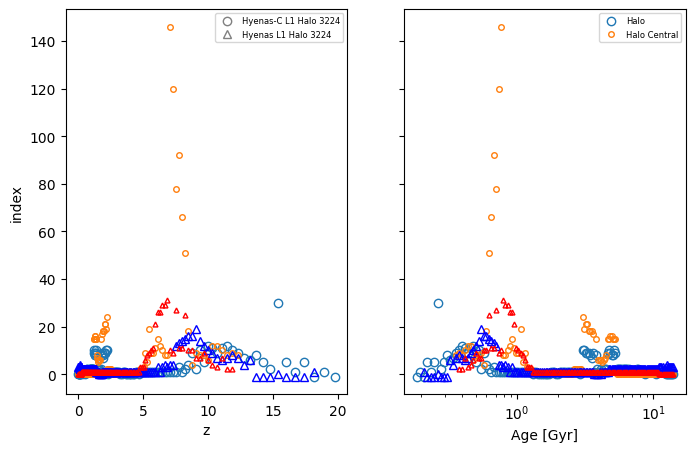


contamination
Hyenas-C L1 Halo 3224

contamination_central does not exist

Hyenas L1 Halo 3224

contamination_central does not exist



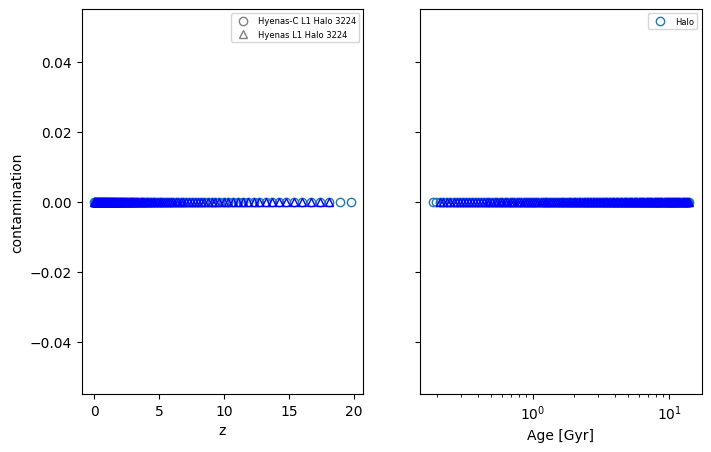


minpotpos
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




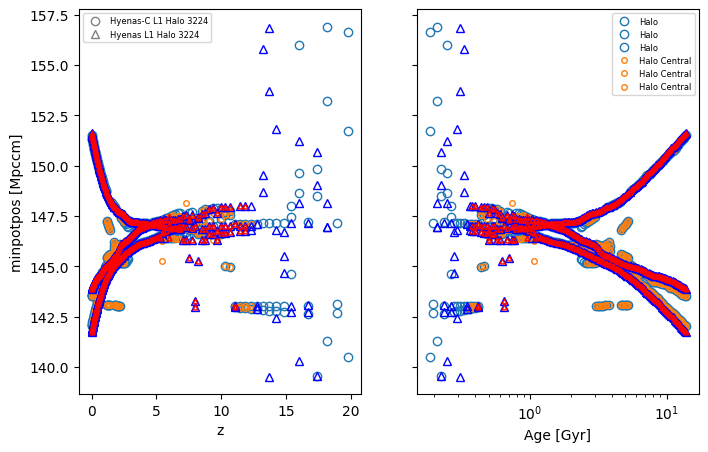


num_major_mergers
Hyenas-C L1 Halo 3224

num_major_mergers_central does not exist

Hyenas L1 Halo 3224

num_major_mergers_central does not exist



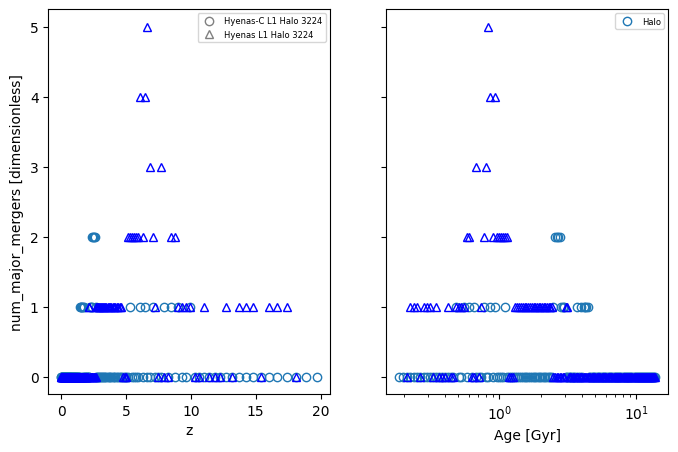


bh_mdot
Hyenas-C L1 Halo 3224

bh_mdot_halo does not exist
[12 13 14 15 16 17 18 19 20 21 22]
nan
[nan nan nan nan nan nan nan nan nan nan nan]

Hyenas L1 Halo 3224

bh_mdot_halo does not exist
[]
-5.950193956630264
[]



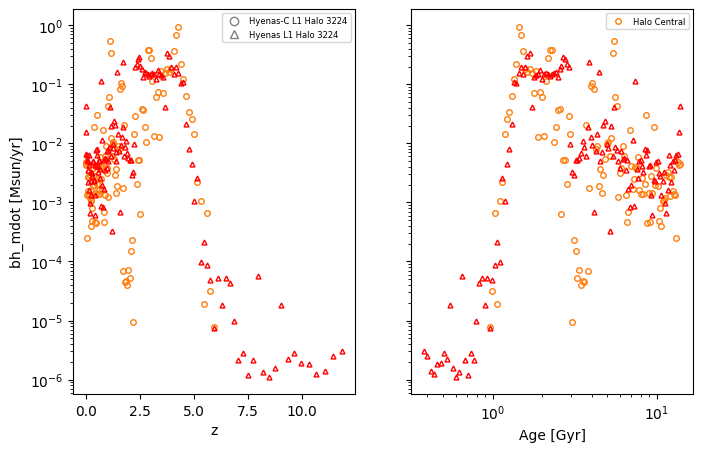


bh_fedd
Hyenas-C L1 Halo 3224

bh_fedd_halo does not exist
[12 13 14 15 16 17 18 19 20 21 22]
nan
[nan nan nan nan nan nan nan nan nan nan nan]

Hyenas L1 Halo 3224

bh_fedd_halo does not exist
[]
-4.445144557247316
[]



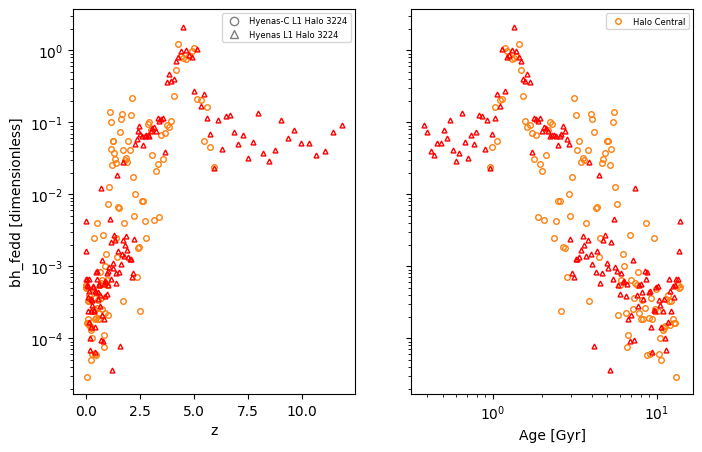


bh_mdot_edd
Hyenas-C L1 Halo 3224

bh_mdot_edd_halo does not exist
[]
nan
[]

Hyenas L1 Halo 3224

bh_mdot_edd_halo does not exist
[]
-4.473201749481233
[]



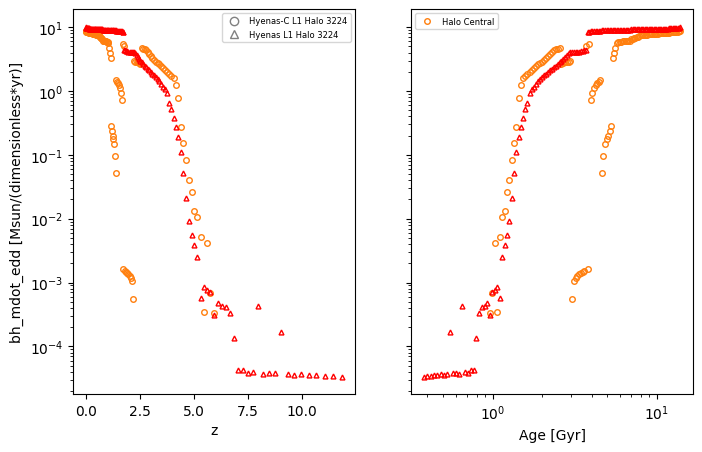


m2500c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
7.715017747338747
[5188212.4 5188212.4 5188212.4 5188212.4 5188212.4]
m2500c_central does not exist

Hyenas L1 Halo 3224

[]
7.631037615284257
[]
m2500c_central does not exist



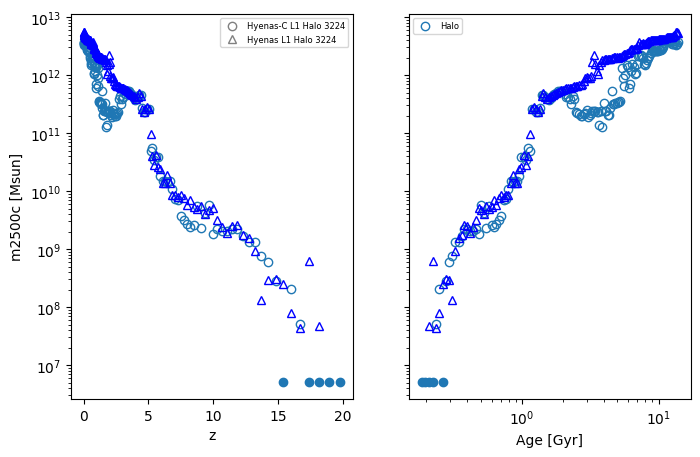


r2500c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
0.6889939088986616
[0.48864551 0.48864551 0.48864551 0.48864551 0.48864551]
r2500c_central does not exist

Hyenas L1 Halo 3224

[]
0.6202490277505327
[]
r2500c_central does not exist



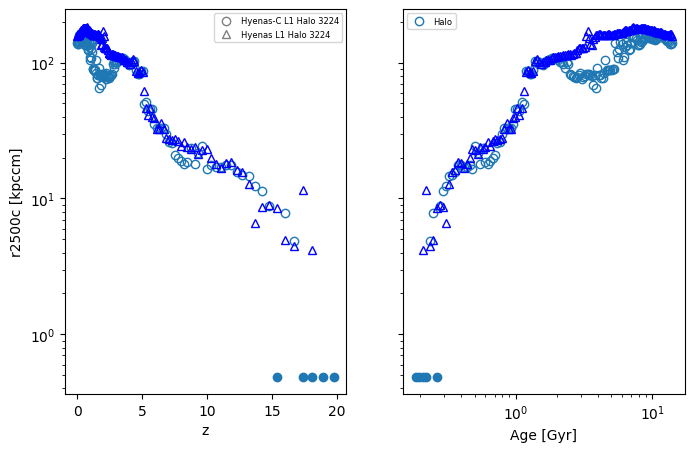


m500c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
8.677142425327757
[47549113.60000002 47549113.60000002 47549113.60000002 47549113.60000002
 47549113.60000002]
m500c_central does not exist

Hyenas L1 Halo 3224

[]
8.209294701667005
[]
m500c_central does not exist



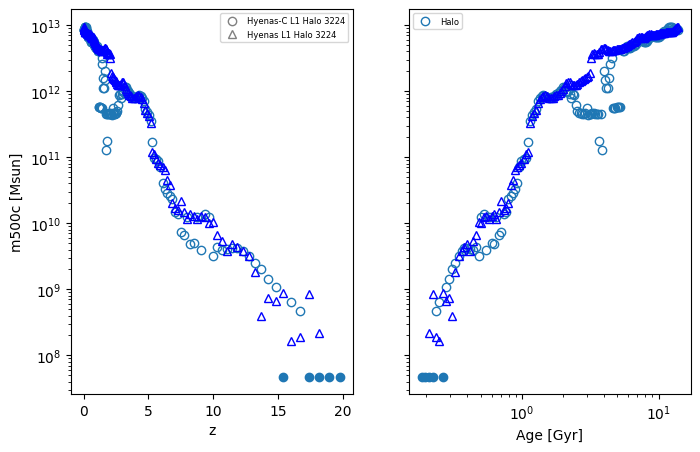


r500c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
1.2563386636686678
[1.80442429 1.80442429 1.80442429 1.80442429 1.80442429]
r500c_central does not exist

Hyenas L1 Halo 3224

[]
1.0904738496764224
[]
r500c_central does not exist



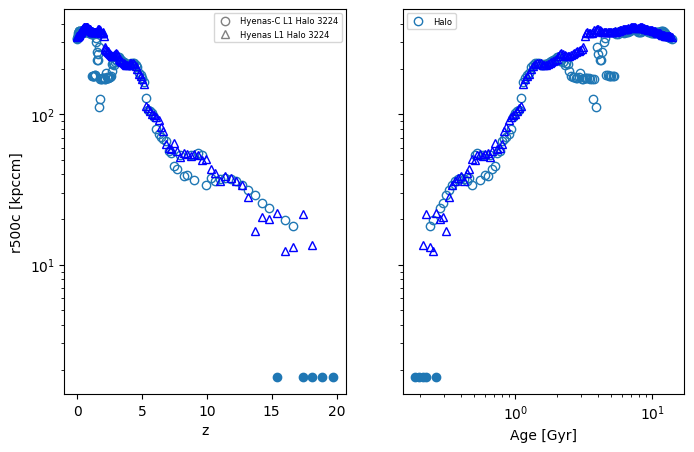


m200c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
8.754235722621463
[56785273.6000001 56785273.6000001 56785273.6000001 56785273.6000001
 56785273.6000001]
m200c_central does not exist

Hyenas L1 Halo 3224

[]
8.512612470241605
[]
m200c_central does not exist



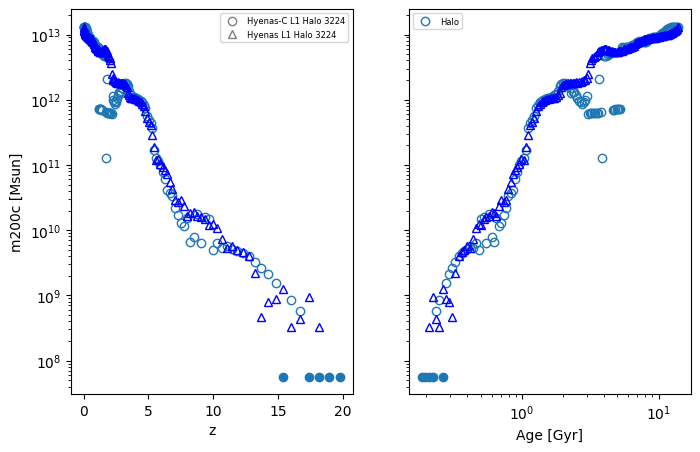


r200c
Hyenas-C L1 Halo 3224

[0 1 2 3 6]
1.412104713870901
[2.58288288 2.58288288 2.58288288 2.58288288 2.58288288]
r200c_central does not exist

Hyenas L1 Halo 3224

[]
1.283611723418363
[]
r200c_central does not exist



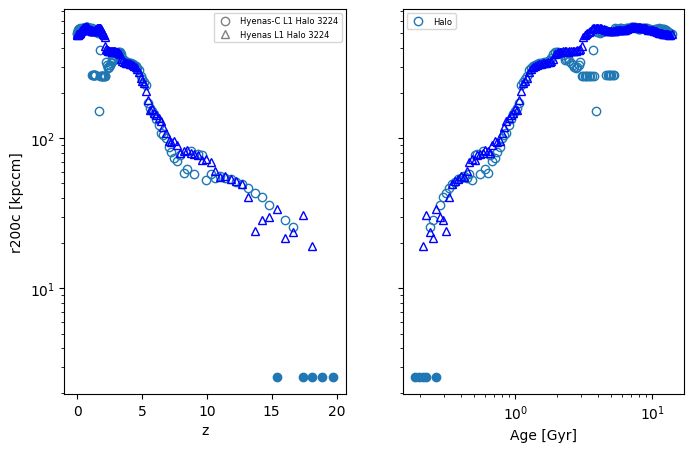


circular_velocity
Hyenas-C L1 Halo 3224

circular_velocity_central does not exist

Hyenas L1 Halo 3224

circular_velocity_central does not exist



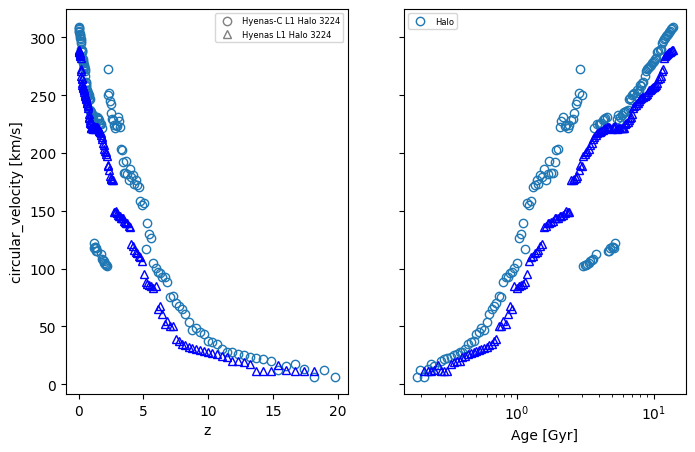


spin_param
Hyenas-C L1 Halo 3224

spin_param_central does not exist

Hyenas L1 Halo 3224

spin_param_central does not exist



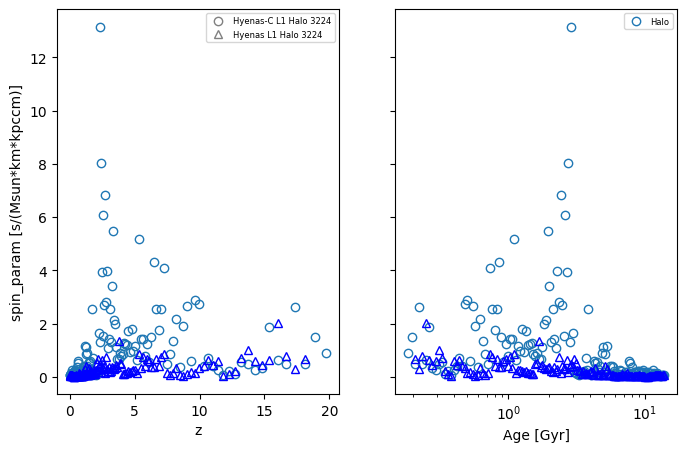


temperature
Hyenas-C L1 Halo 3224

[]
3.1974011711347963
[]
temperature_central does not exist

Hyenas L1 Halo 3224

[]
3.6631985020790863
[]
temperature_central does not exist



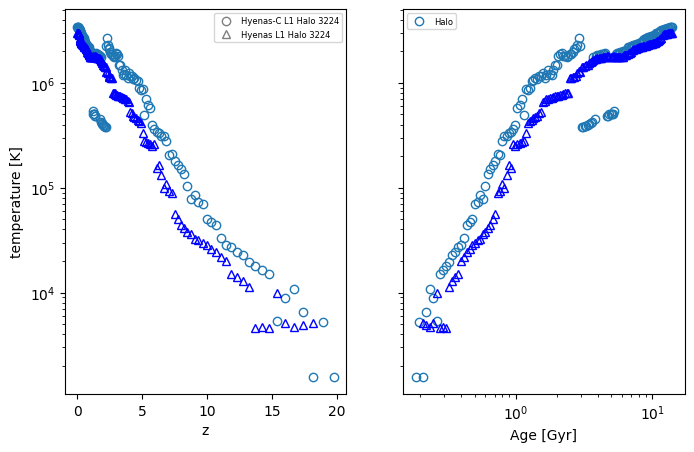


sfr
Hyenas-C L1 Halo 3224

[0 1 2 3 4 6]
-2.443046016978283
[0.00036054 0.00036054 0.00036054 0.00036054 0.00036054 0.00036054]
[]
-0.8873972652659268
[]

Hyenas L1 Halo 3224

[0 2 3 7]
-3.4016047533394844
[3.96638847e-05 3.96638847e-05 3.96638847e-05 3.96638847e-05]
[]
-2.0285204728922834
[]



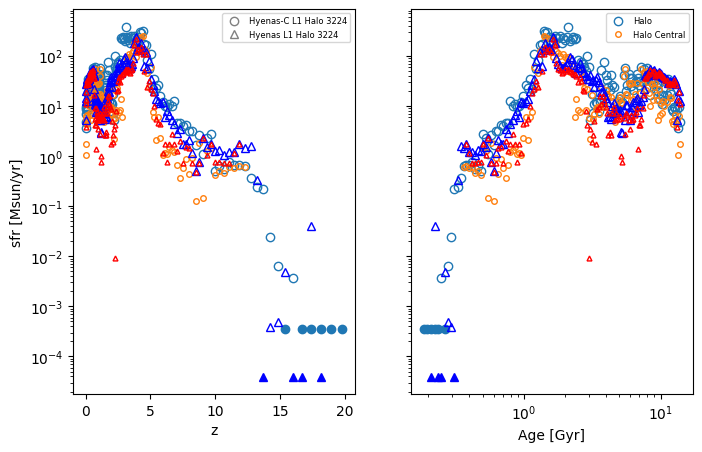


ssfr
Hyenas-C L1 Halo 3224

[]
nan
[]
[]
-11.101733600741339
[]

Hyenas L1 Halo 3224

[]
nan
[]
[]
-12.920043848089867
[]



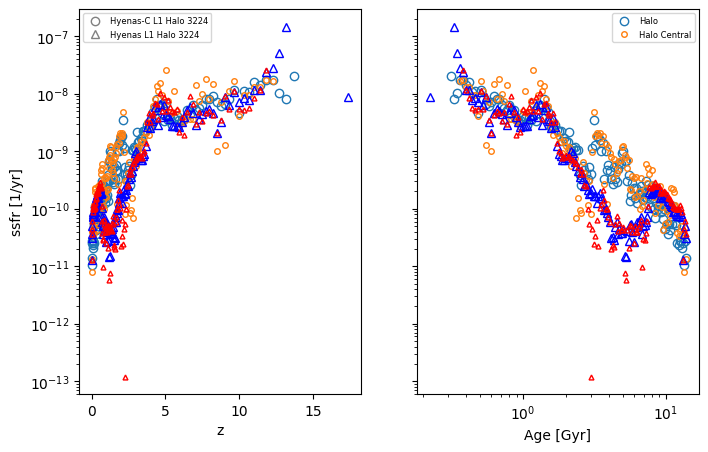


sfr_100
Hyenas-C L1 Halo 3224

[0 1 2 3 4 5 6 7 8]
-0.9429936346694796
[0.01140267 0.01140267 0.01140267 0.01140267 0.01140267 0.01140267
 0.01140267 0.01140267 0.01140267]
[]
-0.7966229567195462
[]

Hyenas L1 Halo 3224

[0 2 3 4 5 6 7]
-1.6419636866143803
[0.00228053 0.00228053 0.00228053 0.00228053 0.00228053 0.00228053
 0.00228053]
[]
-0.5203124528088828
[]



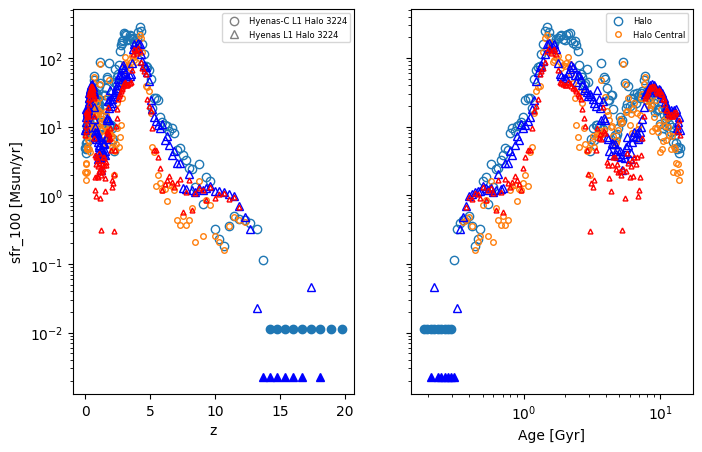


ssfr_100
Hyenas-C L1 Halo 3224

[]
nan
[]
[]
-10.905559337632864
[]

Hyenas L1 Halo 3224

[]
nan
[]
[]
-11.625293043812286
[]



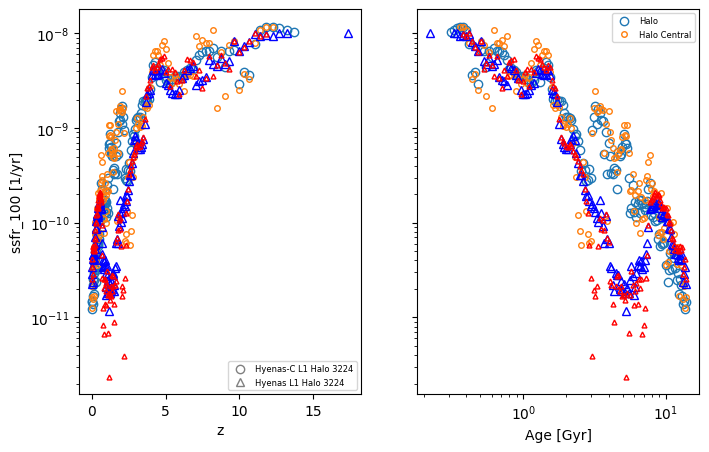


gas_mass
Hyenas-C L1 Halo 3224

[]
7.399429046152727
[]
[]
7.615933013413362
[]

Hyenas L1 Halo 3224

[]
8.13618777642223
[]
[]
7.625558262041756
[]



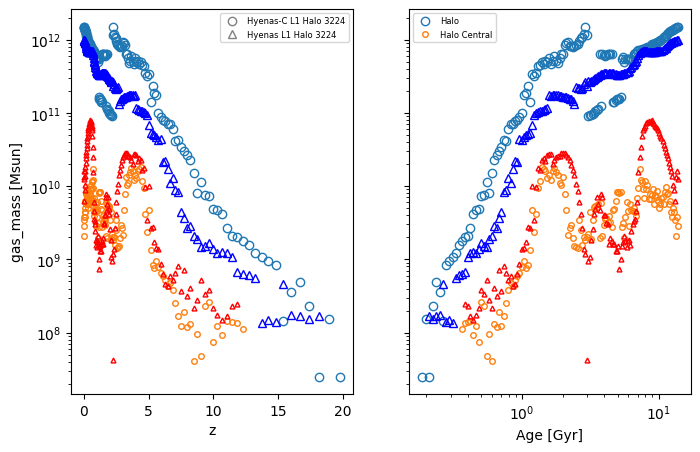


stellar_mass
Hyenas-C L1 Halo 3224

[0 1 2 3 4 5 6 7 8]
7.037939638325977
[1091288.65 1091288.65 1091288.65 1091288.65 1091288.65 1091288.65
 1091288.65 1091288.65 1091288.65]
[]
7.549136623013712
[]

Hyenas L1 Halo 3224

[0 2 3 4 5 6 7]
6.35803631338562
[228053.275 228053.275 228053.275 228053.275 228053.275 228053.275
 228053.275]
[]
7.838712864554172
[]



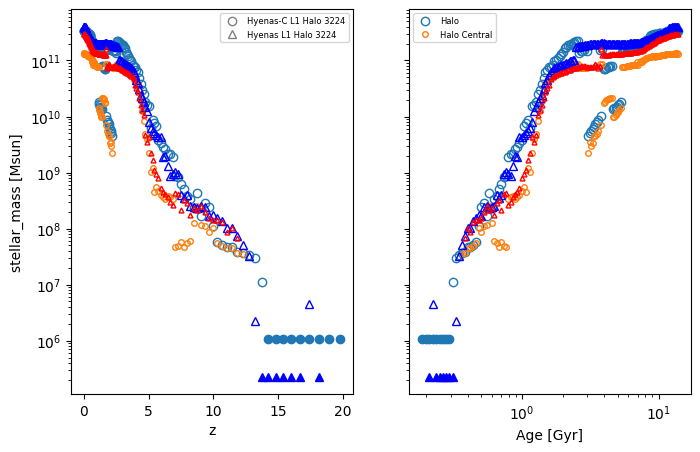


dm_mass
Hyenas-C L1 Halo 3224

[]
8.192139007638938
[]
dm_mass_central does not exist

Hyenas L1 Halo 3224

[]
8.884375665589419
[]
dm_mass_central does not exist



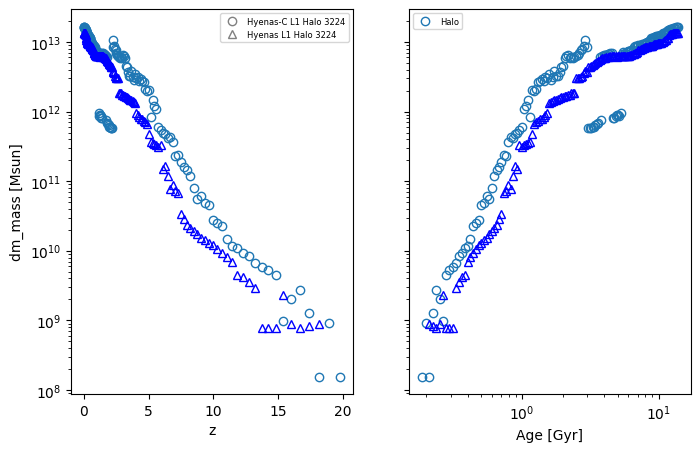


dust_mass
Hyenas-C L1 Halo 3224

[0 2 6]
1.343582338065935
[2.20588231 2.20588231 2.20588231]
[]
3.843196660025217
[]

Hyenas L1 Halo 3224

[0 2 3 7]
0.0071463931715717
[0.10165913 0.10165913 0.10165913 0.10165913]
[]
4.714192809369792
[]



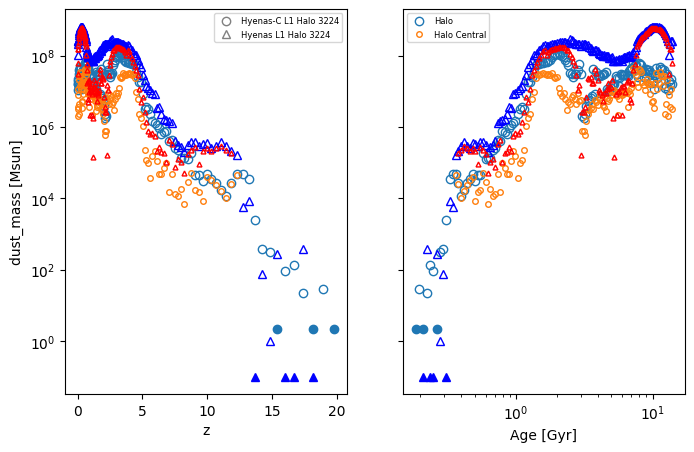


H2_mass
Hyenas-C L1 Halo 3224

[0 1 2 3 4 6]
6.196091860152323
[157069.49960364 157069.49960364 157069.49960364 157069.49960364
 157069.49960364 157069.49960364]
[]
7.830182484773933
[]

Hyenas L1 Halo 3224

[0 2 3 7]
5.4185820104966345
[26216.940625 26216.940625 26216.940625 26216.940625]
[]
7.843057782765691
[]



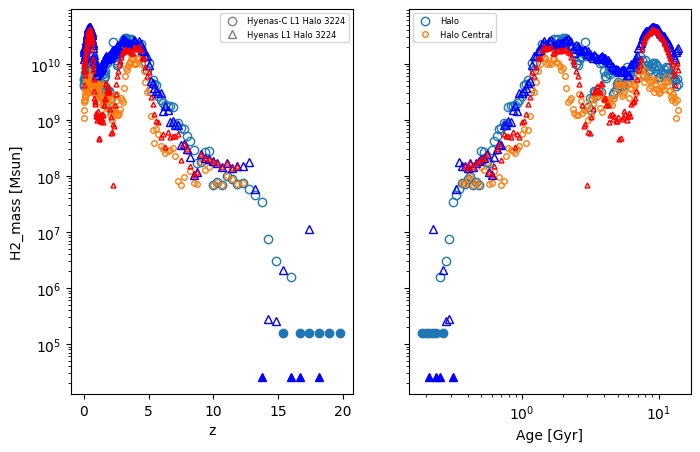


gas_half_mass_radius
Hyenas-C L1 Halo 3224

[]
1.4033912911516175
[]
[]
-0.2829323715902935
[]

Hyenas L1 Halo 3224

[]
0.6778302316183625
[]
[]
0.1368961042958787
[]



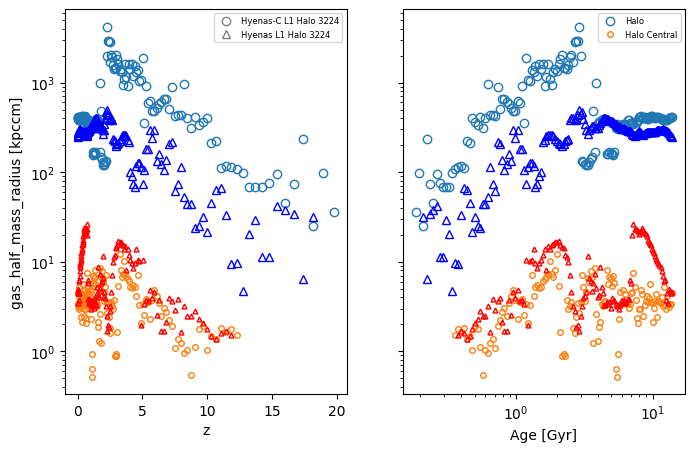


gas_r20_radius
Hyenas-C L1 Halo 3224

[]
0.8906418551746077
[]
[]
-0.4919855094095276
[]

Hyenas L1 Halo 3224

[]
0.1858134906499288
[]
[]
-0.10401974156457376
[]



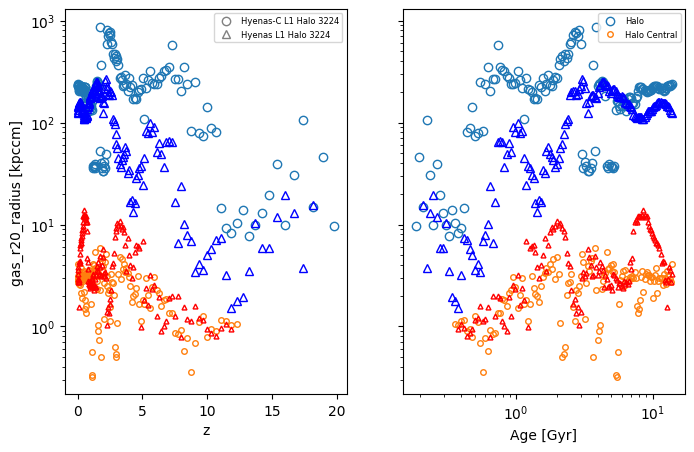


gas_r80_radius
Hyenas-C L1 Halo 3224

[]
1.57100021601486
[]
[]
-0.15339683183299674
[]

Hyenas L1 Halo 3224

[]
1.355202067716461
[]
[]
0.3769847840584981
[]



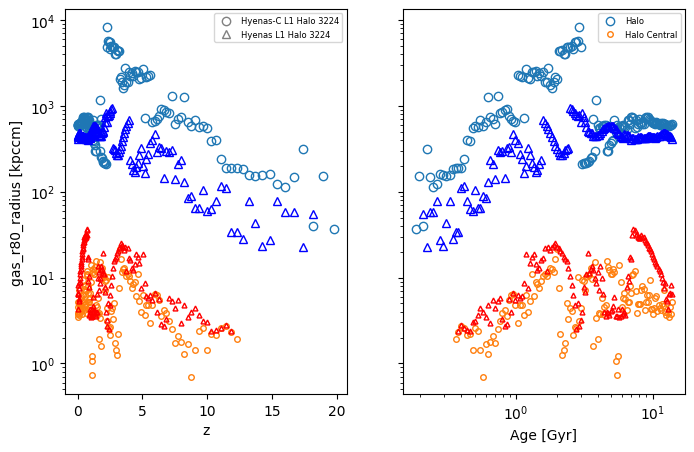


stellar_half_mass_radius
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-0.3715641001161458
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
-0.051108635005679706
[]



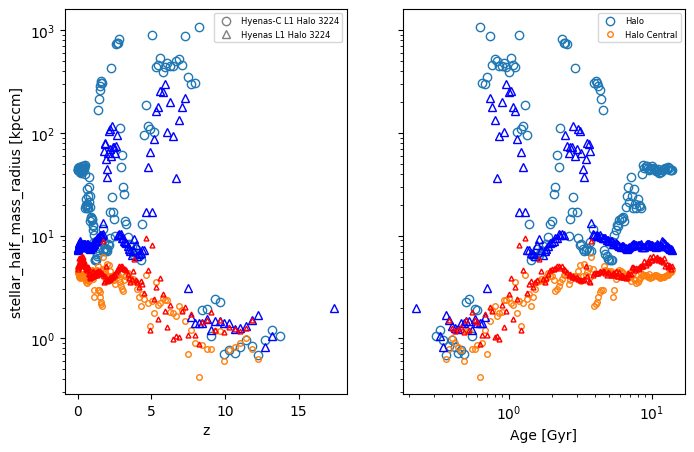


stellar_r20_radius
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-0.5757310526056132
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
-0.27906502759546503
[]



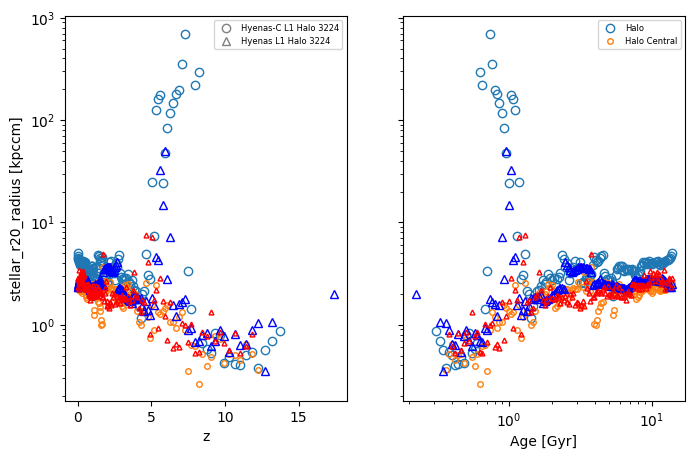


stellar_r80_radius
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-0.08746325852812192
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
0.20235756343022154
[]



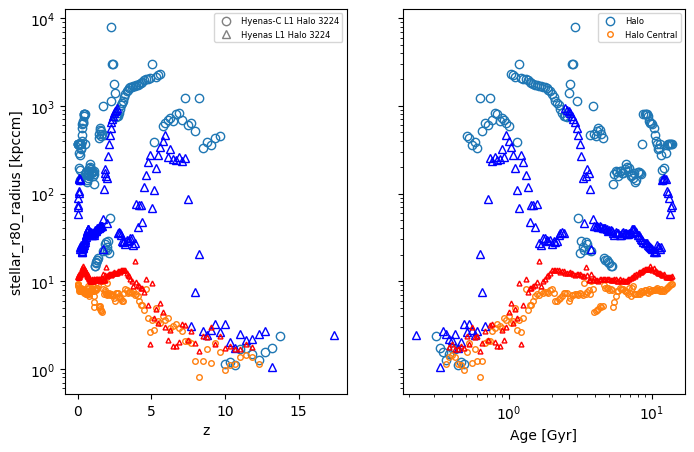


dm_half_mass_radius
Hyenas-C L1 Halo 3224

[]
1.3594888401164211
[]
dm_half_mass_radius_central does not exist

Hyenas L1 Halo 3224

[]
0.9961592746338535
[]
dm_half_mass_radius_central does not exist



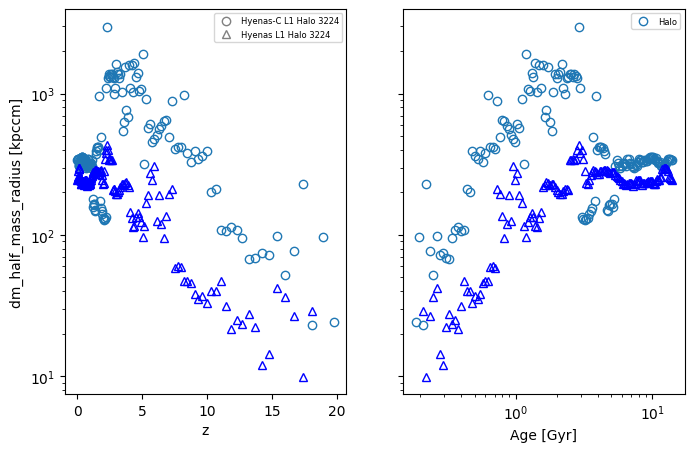


dm_r20_radius
Hyenas-C L1 Halo 3224

[]
1.1443872925975147
[]
dm_r20_radius_central does not exist

Hyenas L1 Halo 3224

[]
0.5951042665265862
[]
dm_r20_radius_central does not exist



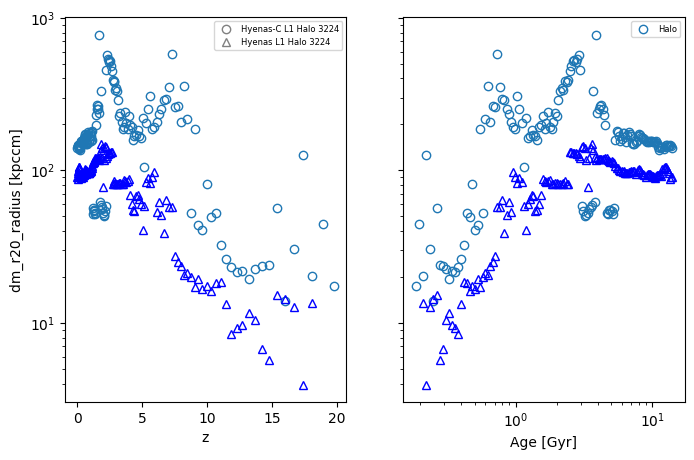


dm_r80_radius
Hyenas-C L1 Halo 3224

[]
1.4764371056713275
[]
dm_r80_radius_central does not exist

Hyenas L1 Halo 3224

[]
1.2404531108431571
[]
dm_r80_radius_central does not exist



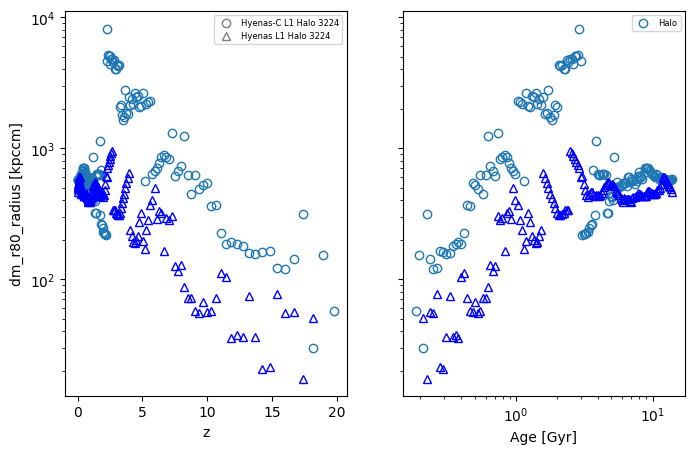


baryon_half_mass_radius
Hyenas-C L1 Halo 3224

[]
1.4033912911516175
[]
[]
-0.18305380977267666
[]

Hyenas L1 Halo 3224

[]
0.6342982479533456
[]
[]
0.09927216422150341
[]



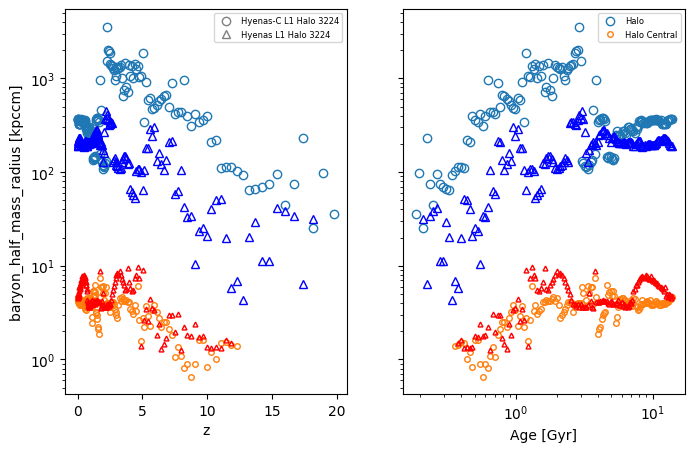


baryon_r20_radius
Hyenas-C L1 Halo 3224

[]
0.8273741901273056
[]
[]
-0.4120957754888043
[]

Hyenas L1 Halo 3224

[]
0.16242847387727943
[]
[]
-0.20330722015109098
[]



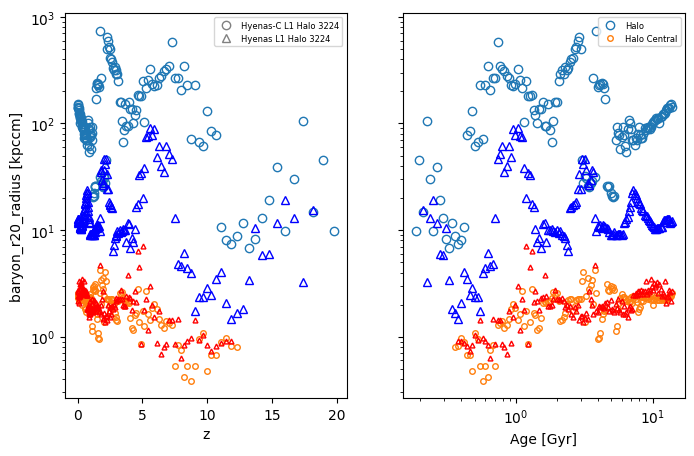


baryon_r80_radius
Hyenas-C L1 Halo 3224

[]
1.57100021601486
[]
[]
0.07515930289167067
[]

Hyenas L1 Halo 3224

[]
1.355202067716461
[]
[]
0.299406997006606
[]



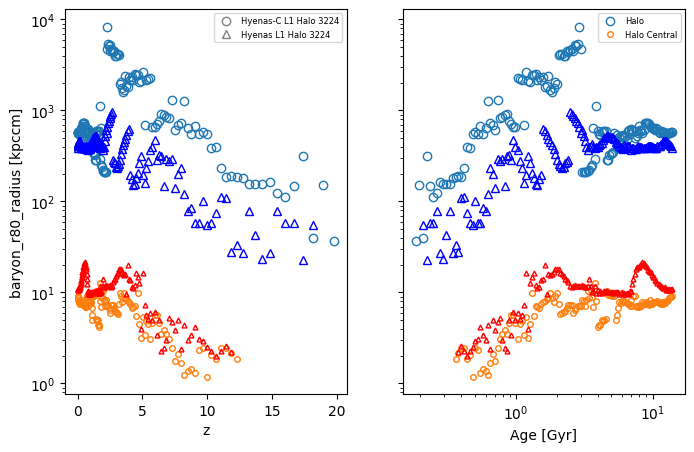


total_half_mass_radius
Hyenas-C L1 Halo 3224

[]
1.3594888401164211
[]
[]
-0.18305380977267666
[]

Hyenas L1 Halo 3224

[]
0.9894970565653008
[]
[]
0.09927216422150341
[]



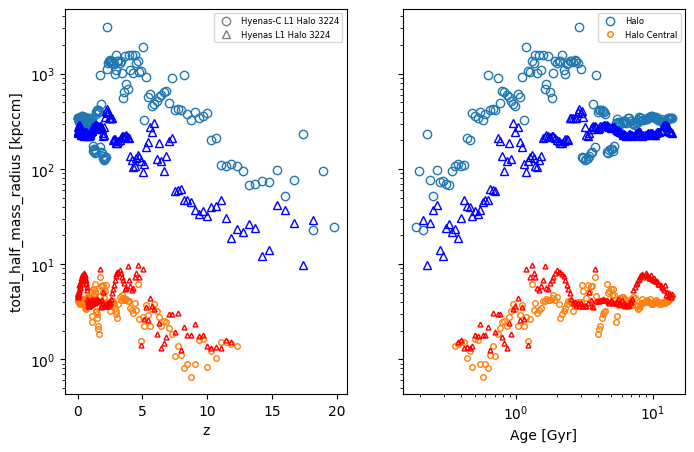


total_r20_radius
Hyenas-C L1 Halo 3224

[]
1.144236732811321
[]
[]
-0.4120957754888043
[]

Hyenas L1 Halo 3224

[]
0.5951042665265862
[]
[]
-0.20330722015109098
[]



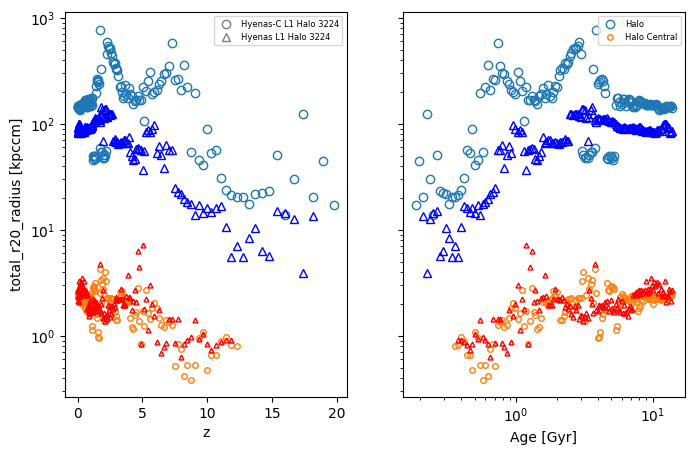


total_r80_radius
Hyenas-C L1 Halo 3224

[]
1.4764371056713275
[]
[]
0.07515930289167067
[]

Hyenas L1 Halo 3224

[]
1.2404531108431571
[]
[]
0.299406997006606
[]



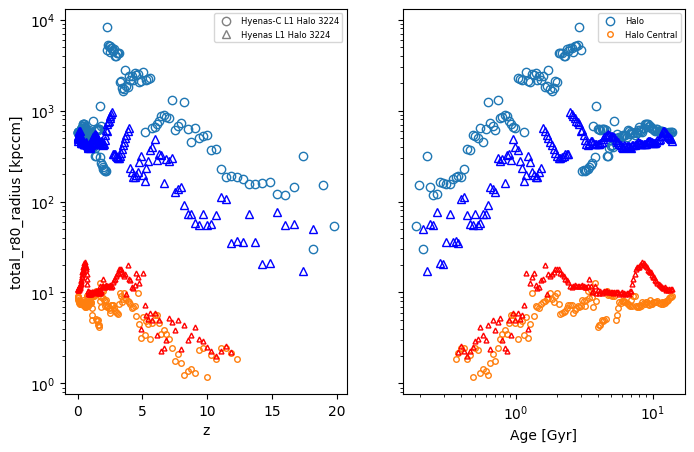


mass_weighted_metallicity
Hyenas-C L1 Halo 3224

[]
-8.534757793250206
[]
[]
-3.056050035227963
[]

Hyenas L1 Halo 3224

[0 2 3 7]
-7.137170168238057
[7.29171745e-09 7.29171745e-09 7.29171745e-09 7.29171745e-09]
[]
-2.9488895180403776
[]



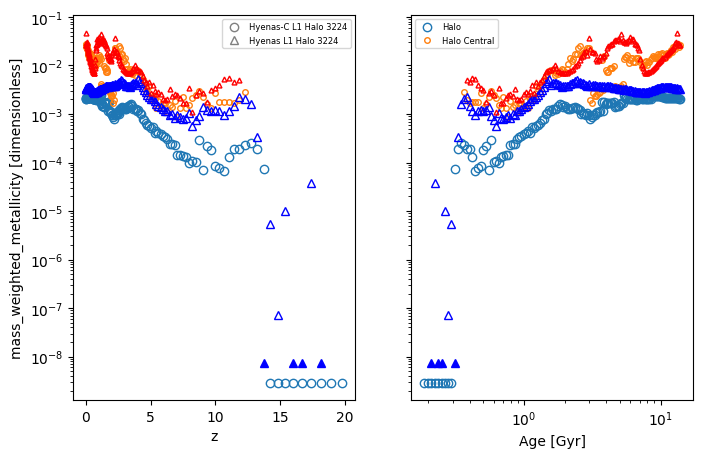


sfr_weighted_metallicity
Hyenas-C L1 Halo 3224

[0 1 2 3 4 6]
-8.534757794370579
[2.91905451e-10 2.91905451e-10 2.91905451e-10 2.91905451e-10
 2.91905451e-10 2.91905451e-10]
[]
-2.977552057946991
[]

Hyenas L1 Halo 3224

[0 2 3 7]
-5.6234832370780286
[2.37967015e-07 2.37967015e-07 2.37967015e-07 2.37967015e-07]
[]
-2.5095472101151555
[]



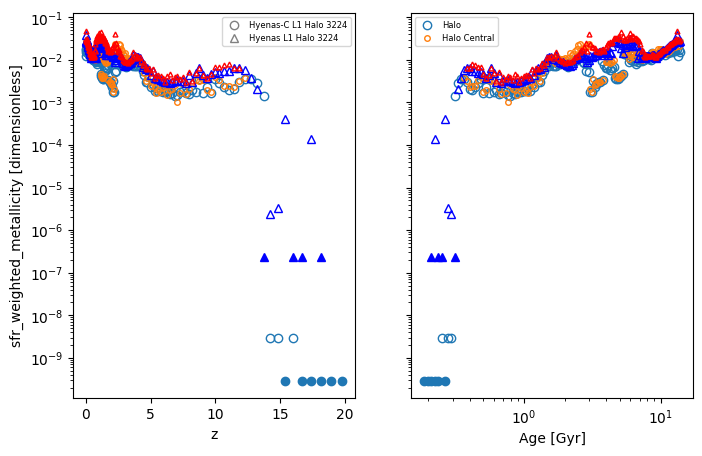


stellar_metallicity
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-2.9389244273226494
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
-2.4297909383719345
[]



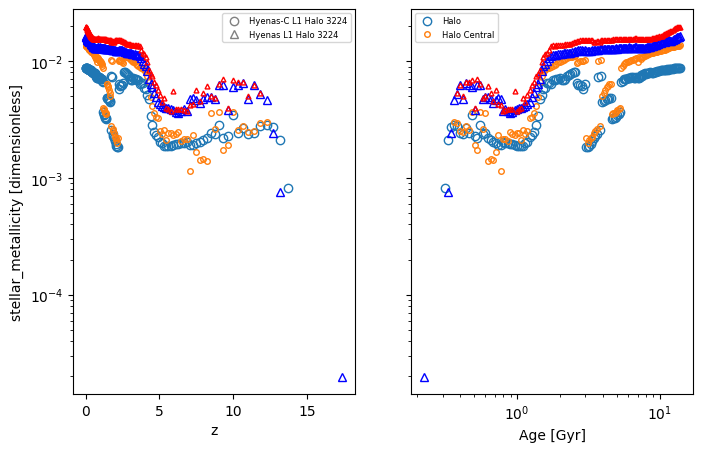


mass_weighted_cgm_metallicity
Hyenas-C L1 Halo 3224

[]
-8.534757793250206
[]
mass_weighted_cgm_metallicity_central does not exist

Hyenas L1 Halo 3224

[0 2 3 7]
-7.728434026047348
[1.86881355e-09 1.86881355e-09 1.86881355e-09 1.86881355e-09]
mass_weighted_cgm_metallicity_central does not exist



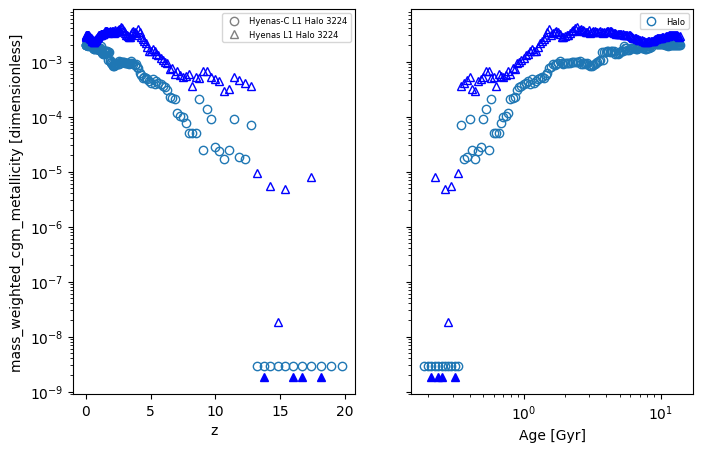


temp_weighted_cgm_metallicity
Hyenas-C L1 Halo 3224

[]
nan
[]
temp_weighted_cgm_metallicity_central does not exist

Hyenas L1 Halo 3224

[0 2 3 7]
0.5606150081877842
[0.36359258 0.36359258 0.36359258 0.36359258]
temp_weighted_cgm_metallicity_central does not exist



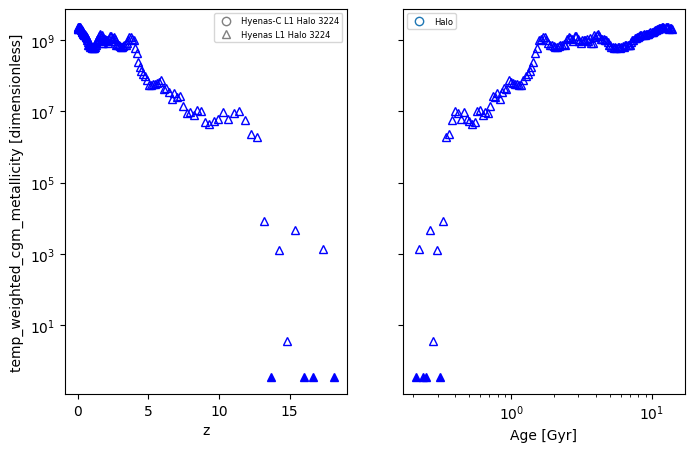


gas_velocity_dispersion
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




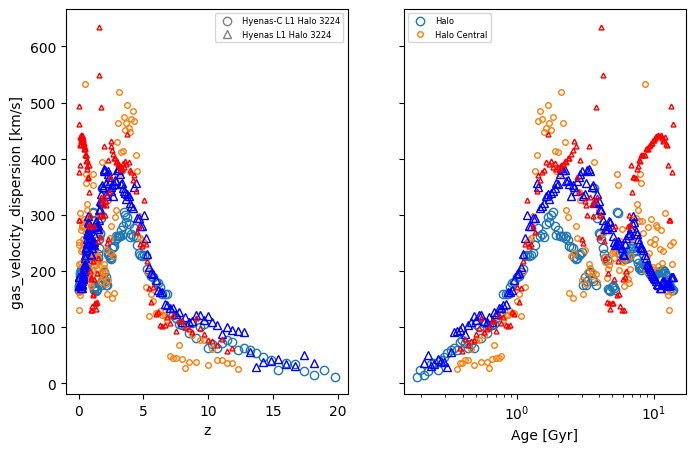


stellar_velocity_dispersion
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




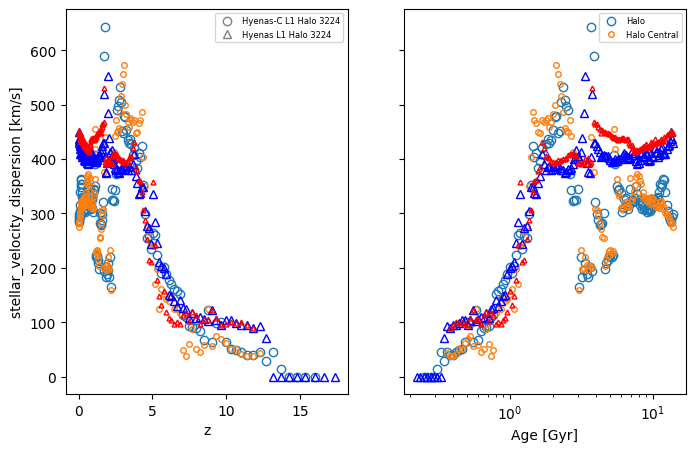


dm_velocity_dispersion
Hyenas-C L1 Halo 3224

dm_velocity_dispersion_central does not exist

Hyenas L1 Halo 3224

dm_velocity_dispersion_central does not exist



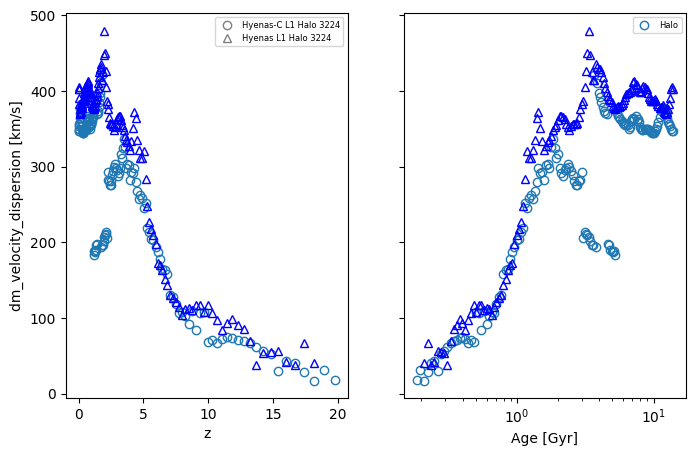


baryon_velocity_dispersion
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




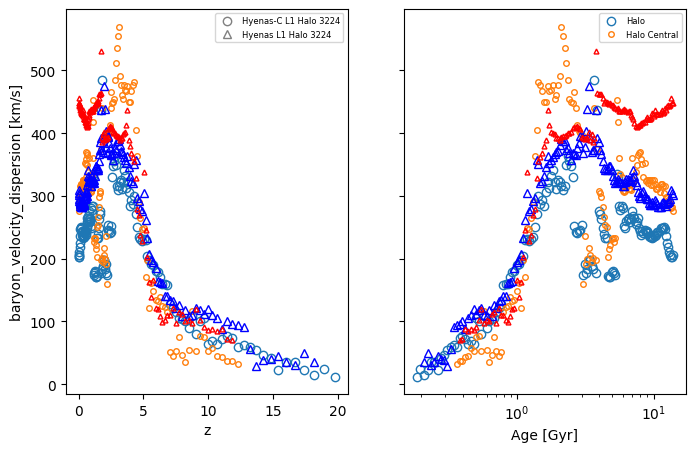


total_velocity_dispersion
Hyenas-C L1 Halo 3224


Hyenas L1 Halo 3224




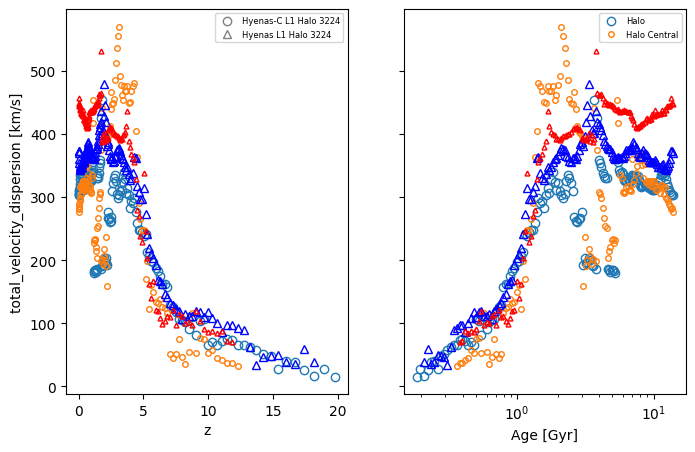


mass_weighted_stellar_age
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-1.7388825357801714
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
-1.400586940494337
[]



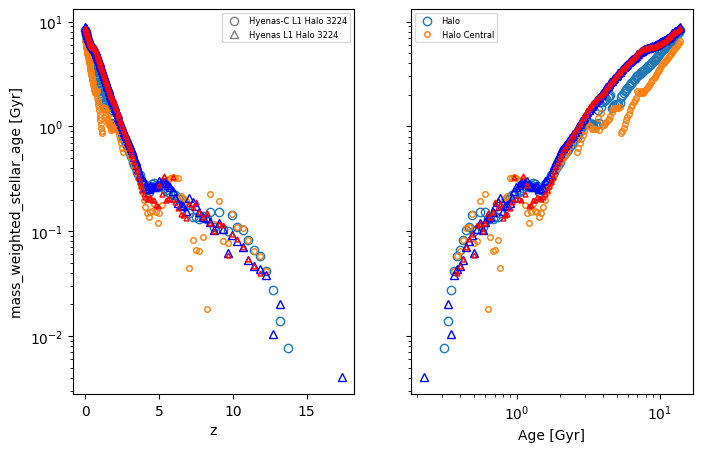


metal_weighted_stellar_age
Hyenas-C L1 Halo 3224

[5 6 7 8]
nan
[nan nan nan nan]
[]
-1.8240650192977887
[]

Hyenas L1 Halo 3224

[2 3 4 5 6 7]
nan
[nan nan nan nan nan nan]
[]
6.338512071773165
[]



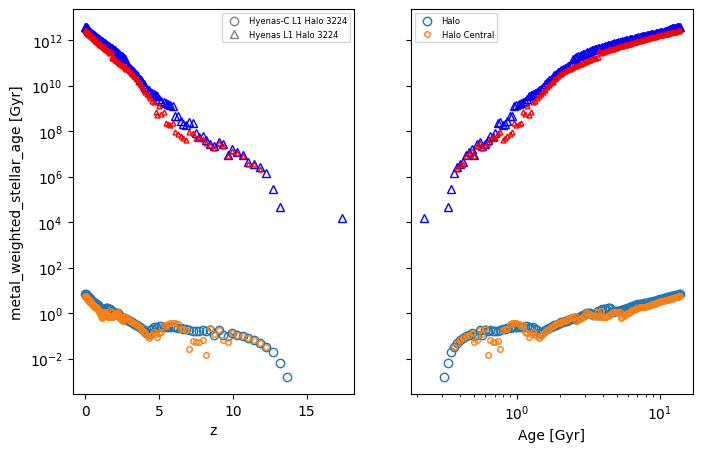


mass_weighted_temperature
Hyenas-C L1 Halo 3224

[]
nan
[]
[]
nan
[]

Hyenas L1 Halo 3224

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0

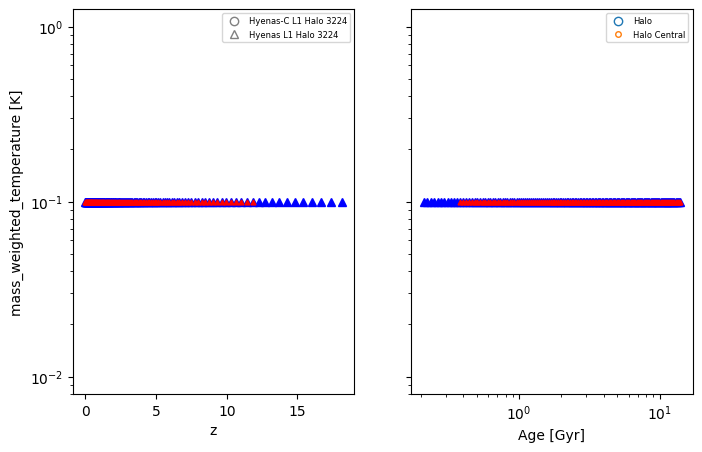


mass_weighted_cgm_temperature
Hyenas-C L1 Halo 3224

[]
nan
[]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0

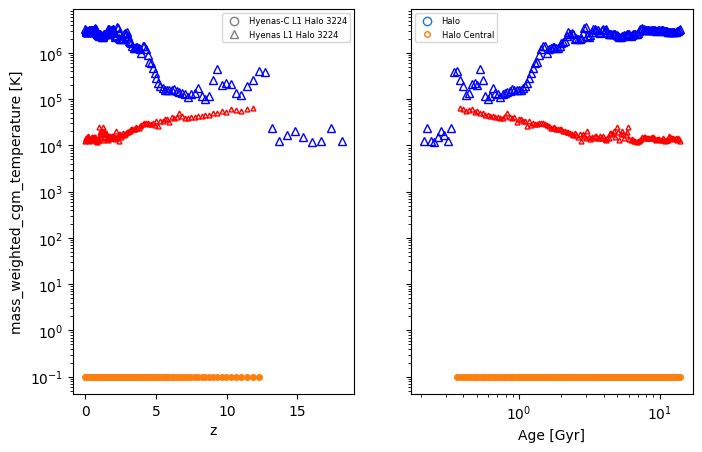


local_mass_density_300kpccm
Hyenas-C L1 Halo 3224

[]
0.2035832506132111
[]
local_mass_density_300kpccm_central does not exist

Hyenas L1 Halo 3224

[]
0.902279236937094
[]
local_mass_density_300kpccm_central does not exist



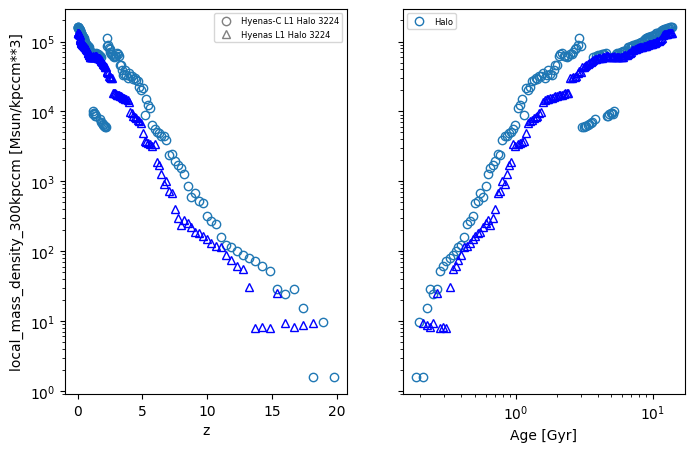


local_number_density_300kpccm
Hyenas-C L1 Halo 3224

[]
-8.053452373461422
[]
local_number_density_300kpccm_central does not exist

Hyenas L1 Halo 3224

[]
-8.053452373461422
[]
local_number_density_300kpccm_central does not exist



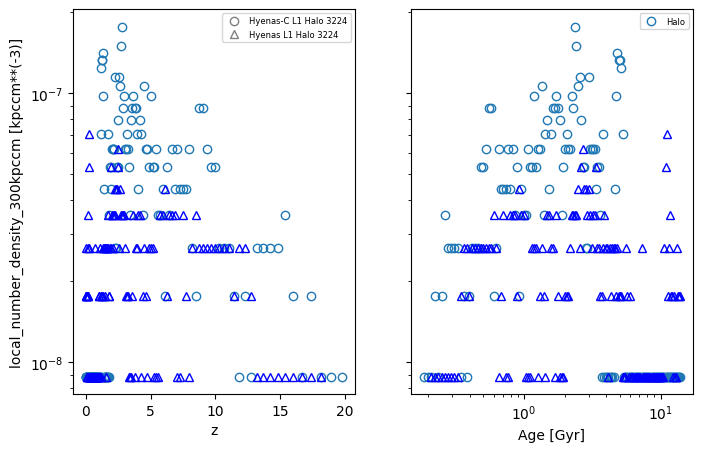


local_mass_density_1000kpccm
Hyenas-C L1 Halo 3224

[]
-1.3650529852278015
[]
local_mass_density_1000kpccm_central does not exist

Hyenas L1 Halo 3224

[]
-0.6641691331709385
[]
local_mass_density_1000kpccm_central does not exist



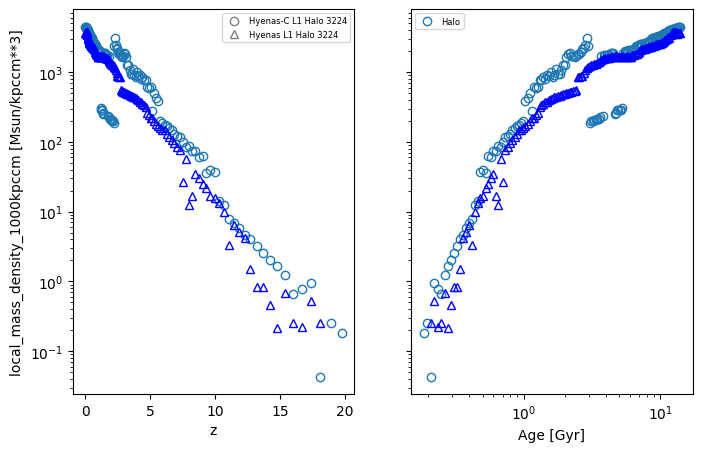


local_number_density_1000kpccm
Hyenas-C L1 Halo 3224

[]
-9.622088609302434
[]
local_number_density_1000kpccm_central does not exist

Hyenas L1 Halo 3224

[]
-9.622088609302434
[]
local_number_density_1000kpccm_central does not exist



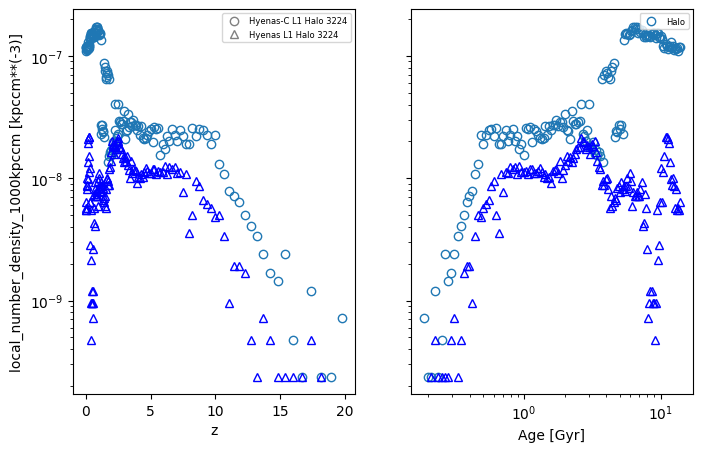


local_mass_density_3000kpccm
Hyenas-C L1 Halo 3224

[]
-2.1706954346050935
[]
local_mass_density_3000kpccm_central does not exist

Hyenas L1 Halo 3224

[]
-2.082632141812878
[]
local_mass_density_3000kpccm_central does not exist



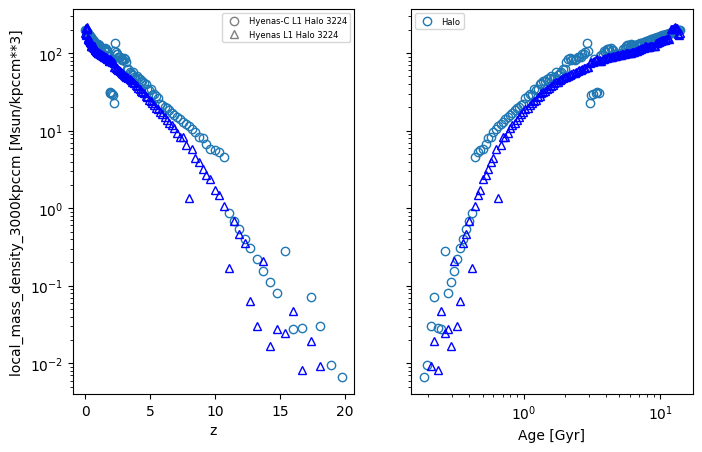


local_number_density_3000kpccm
Hyenas-C L1 Halo 3224

[]
-11.053452373461422
[]
local_number_density_3000kpccm_central does not exist

Hyenas L1 Halo 3224

[]
-11.053452373461422
[]
local_number_density_3000kpccm_central does not exist



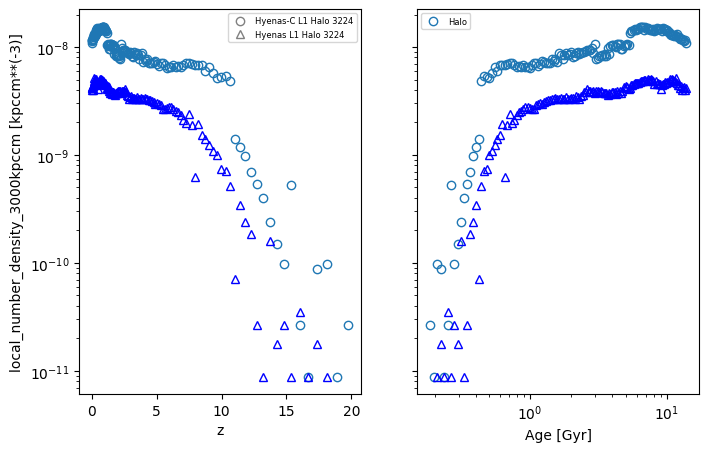


gas_30kpc_mass
Hyenas-C L1 Halo 3224

gas_30kpc_mass_halo does not exist
[]
8.518409312973494
[]

Hyenas L1 Halo 3224

gas_30kpc_mass_halo does not exist
[]
8.667564177340486
[]



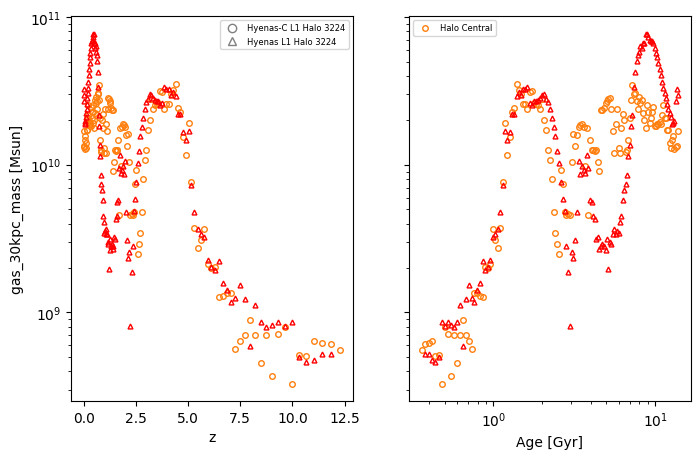


bh_mass
Hyenas-C L1 Halo 3224

bh_mass_halo does not exist
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
4.171219332280684
[1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219]

Hyenas L1 Halo 3224

bh_mass_halo does not exist
[]
3.1804838028599707
[]



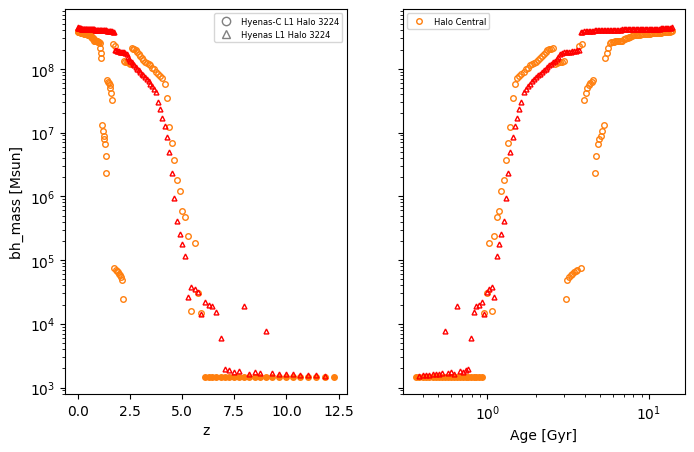


bh_30kpc_mass
Hyenas-C L1 Halo 3224

bh_30kpc_mass_halo does not exist
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
4.171219332280684
[1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219 1483.26699219 1483.26699219
 1483.26699219 1483.26699219 1483.26699219]

Hyenas L1 Halo 3224

bh_30kpc_mass_halo does not exist
[]
6.358026315404776
[]



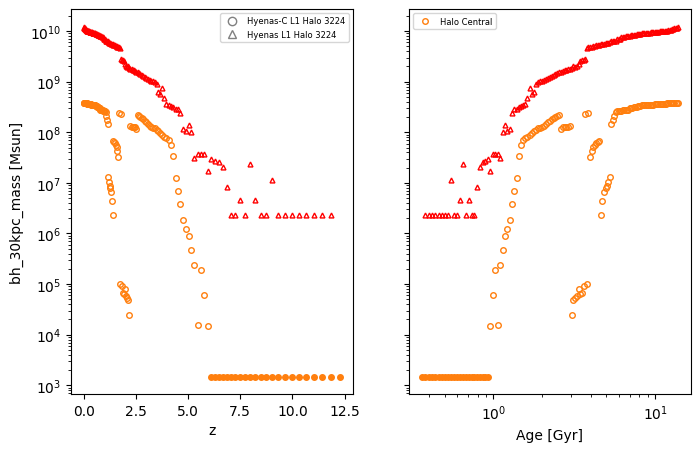


HI_mass
Hyenas-C L1 Halo 3224

HI_mass_halo does not exist
[]
8.982316484698012
[]

Hyenas L1 Halo 3224

HI_mass_halo does not exist
[]
8.225019467409282
[]



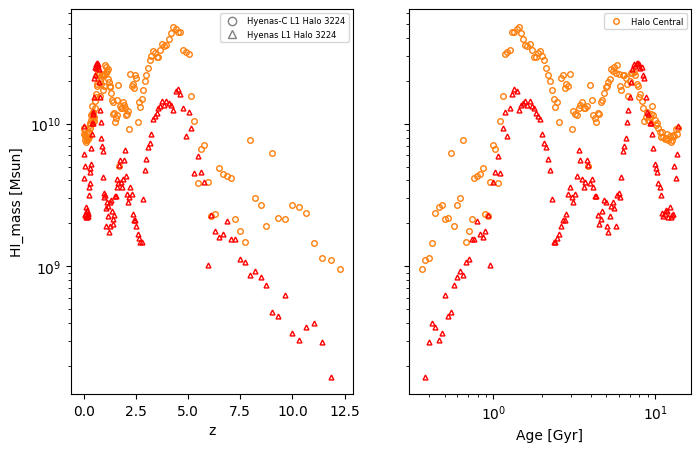


HI_30kpc_mass
Hyenas-C L1 Halo 3224

HI_30kpc_mass_halo does not exist
[]
8.190384202648069
[]

Hyenas L1 Halo 3224

HI_30kpc_mass_halo does not exist
[]
7.602878984422186
[]



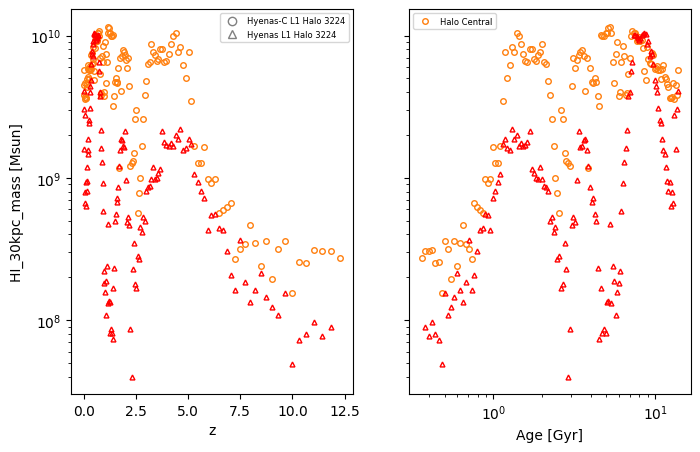


H2_30kpc_mass
Hyenas-C L1 Halo 3224

H2_30kpc_mass_halo does not exist
[]
7.386588843140814
[]

Hyenas L1 Halo 3224

H2_30kpc_mass_halo does not exist
[]
7.305842296128983
[]



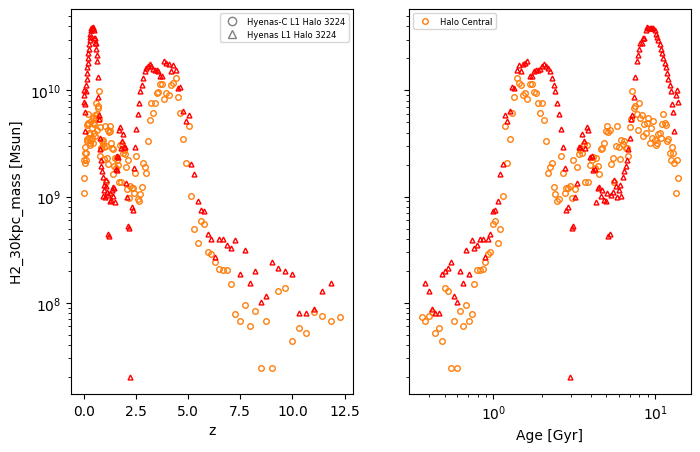

In [107]:
comparison_types = ['halo', 'central']#, 'central_tracked']
comparison_names = ['Halo', 'Halo Central', r'$z=0$ Central Progenitor']
comparison_colors = [['C0', 'C1', 'C2'], ['blue', 'red', 'green']]
# comparison_sizes = [[7, 5, 3], [6.5, 4.5, 2.5]]
comparison_sizes = [[6, 4], [5.5, 3.5]]
for prop_name in prop_comparison_names:
    print(prop_name)
    if prop_name in ['z', 'age', 'snap_num']: continue

    fig, ax = plt.subplots(num=1, figsize=(8,5),
                           nrows=1, ncols=2, sharey='row')


    handle_list = []
    sim_counter = 0
    for sim, sim_info in sim_dict.items():
        print(sim)
        print()
        
        marker = sim_info['marker']
        handle_list.append(Line2D([], [], color='grey', ls='', marker=marker, mfc='none', label=sim))
        
        prop_dict = sim_info['target_halo']['prop_dict']
    
        for comparison_type, comparison_name, mec, ms in zip(comparison_types, comparison_names, comparison_colors[sim_counter], comparison_sizes[sim_counter]):
            x1_name = f'z_{comparison_type}'
            x1 = prop_dict[x1_name]
    
            x2_name = f'age_{comparison_type}'
            x2 = prop_dict[x2_name]
            
            y_name = f'{prop_name}_{comparison_type}'
            try:
                y = prop_dict[y_name]
            except:
                print(f'{y_name} does not exist')
                continue

            if sim_counter == 0:
                label = comparison_name
            else:
                label = None
    
            ax[0].plot(x1, y, marker=marker, ms=ms, mfc='none', mec=mec, ls='', label=label)
            ax[1].plot(x2, y, marker=marker, ms=ms, mfc='none', mec=mec, ls='', label=label)
    
            ## Plot all 0 values as 1 dex below minimum nonzero value
            # if prop_name in log_base_props:
            if prop_name in log_props:
                zero_value_indexes = np.where(np.array(y)==0)[0]
                nonzero_value_indexes = np.where(np.array(y)!=0)[0]
                print(zero_value_indexes)
                try:
                    print(min(np.log10(np.array(y)[nonzero_value_indexes])))
                    zero_value_for_plotting = np.array([10**(min(np.log10(np.array(y)[nonzero_value_indexes]))-1)] * len(zero_value_indexes))
                except:
                    zero_value_for_plotting = np.array([10**(-1)] * len(zero_value_indexes))
                print(zero_value_for_plotting)
        
                ax[0].plot(np.array(x1)[zero_value_indexes], zero_value_for_plotting, 
                           marker=marker, ms=ms, mec=mec, mfc=mec, ls='')
                ax[1].plot(np.array(x2)[zero_value_indexes], zero_value_for_plotting, 
                           marker=marker, ms=ms, mec=mec, mfc=mec, ls='')

        sim_counter += 1
        print()

    # print(marker_list)
    
    ax[1].set_xscale('log')

    ax[0].set_xlabel('z')
    ax[1].set_xlabel('Age [Gyr]')

    try:
         ax[0].set_ylabel(f'{prop_name} [{y[0].units}]')
    except:
        ax[0].set_ylabel(f'{prop_name}')
    
    # if prop_name in log_base_props:
    if prop_name in log_props:
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')    
    
    # ax[1].legend(loc='upper right', fontsize=8)
    ax[0].legend(handles=handle_list, fontsize=6)
    # ax[0].legend(handles=marker_list, labels=sim_dict.keys(), fontsize=6)
    ax[1].legend(fontsize=6)
    plt.show()
    print()

Hyenas-C L1 Halo 3224

Hyenas L1 Halo 3224



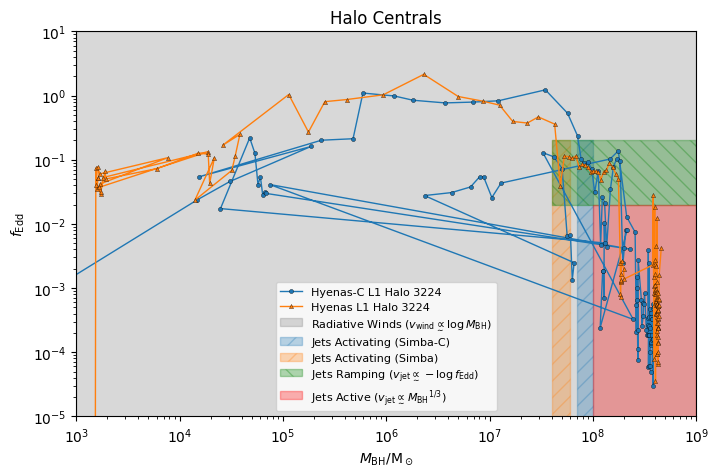

In [119]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

for sim, sim_info in sim_dict.items():
    print(sim)
    print()
    
    marker = sim_info['marker']
    
    prop_dict = sim_info['target_halo']['prop_dict']

    fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
    fedd_to_plot[fedd_to_plot==0] = 1e-10
    
    ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker=marker, ms=3, mew=0.25, mec='black', lw=1,
            label=sim)

ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=1e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=1e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-5,1e1)
ax.set_xlim(1e3, 1e9)

ax.legend(fontsize=8)

plt.title('Halo Centrals')

plt.show()

Hyenas-C L1 Halo 3224

Hyenas L1 Halo 3224



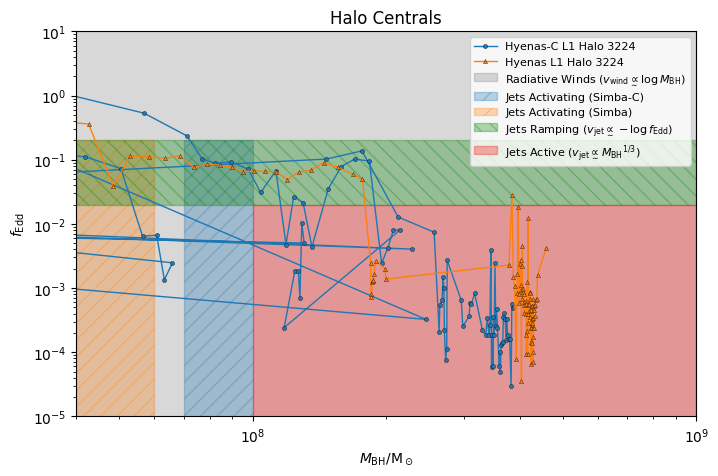

In [120]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

for sim, sim_info in sim_dict.items():
    print(sim)
    print()
    
    marker = sim_info['marker']
    
    prop_dict = sim_info['target_halo']['prop_dict']

    fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
    fedd_to_plot[fedd_to_plot==0] = 1e-10
    
    ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker=marker, ms=3, mew=0.25, mec='black', lw=1,
            label=sim)

ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=1e9, color='grey', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='C0', alpha=0.3, hatch='//', label='Jets Activating (Simba-C)')
ax.fill_betweenx(y=[0,2e-1], x1=4e7, x2=6e7, color='C1', alpha=0.3, hatch='//', label='Jets Activating (Simba)')

ax.fill_betweenx(y=[2e-2,2e-1], x1=4e7, x2=1e9, color='green', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-5,1e1)
ax.set_xlim(4e7, 1e9)

ax.legend(fontsize=8)

plt.title('Halo Centrals')

plt.show()

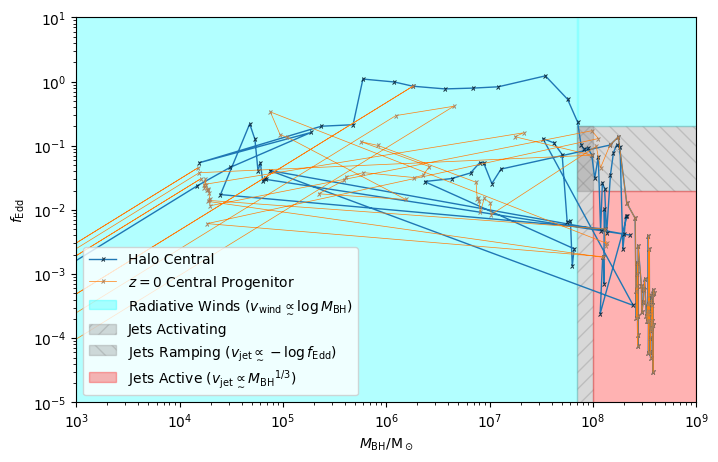

In [89]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
fedd_to_plot[fedd_to_plot==0] = 1e-10
# fedd_to_plot[fedd_to_plot==-np.inf] = 1e-8

ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker='$x$', ms=3, mew=0.25, mec='black', lw=1,
        label='Halo Central')#, ls='')


fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central_tracked'])
fedd_to_plot[fedd_to_plot==0] = 1e-10
# fedd_to_plot[fedd_to_plot==-np.inf] = 1e-8

ax.plot(prop_dict['bh_mass_central_tracked'], fedd_to_plot, marker='$x$', ms=3, mew=0.25, mec='grey', lw=0.5,
        label=r'$z=0$ Central Progenitor')#, ls='')


# ax.axhline(y=0.2, color='grey', ls='-')
# ax.axhline(y=0.02, color='grey', ls='--')

ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=7e7, color='cyan', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')
ax.fill_betweenx(y=[2e-1,1e1], x1=7.2125e7, x2=1e9, color='cyan', alpha=0.3)

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='grey', alpha=0.3, hatch='//', label='Jets Activating')
ax.fill_betweenx(y=[2e-2,2e-1], x1=7e7, x2=1e9, color='grey', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

# ax.text(x=1e8, y=1e-3, s='Jets Active')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e-9,1e1)
ax.set_ylim(1e-5,1e1)

# ax.set_xlim(1e4, 1e9)
# ax.set_xlim(-0.05e9, 1e9)
ax.set_xlim(1e3, 1e9)

ax.legend()

plt.show()

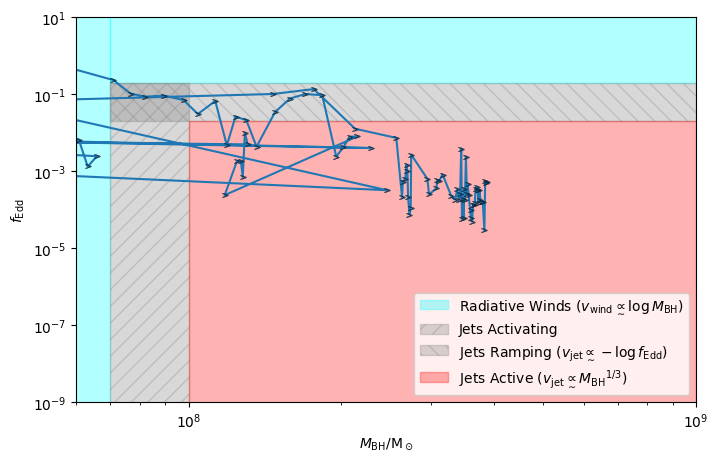

In [90]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
fedd_to_plot[fedd_to_plot==0] = 1e-10
# fedd_to_plot[fedd_to_plot==-np.inf] = 1e-8

ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker='$>$', ms=4, mew=0.25, mec='black')#, ls='')

# ax.axhline(y=0.2, color='grey', ls='-')
# ax.axhline(y=0.02, color='grey', ls='--')

ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=7e7, color='cyan', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')
ax.fill_betweenx(y=[2e-1,1e1], x1=7e7, x2=1e9, color='cyan', alpha=0.3)

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='grey', alpha=0.3, hatch='//', label='Jets Activating')
ax.fill_betweenx(y=[2e-2,2e-1], x1=7e7, x2=1e9, color='grey', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

# ax.text(x=1e8, y=1e-3, s='Jets Active')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e-9,1e1)
ax.set_ylim(1e-9,1e1)

# ax.set_xlim(1e4, 1e9)
# ax.set_xlim(-0.05e9, 1e9)
ax.set_xlim(6e7, 1e9)

ax.legend()

plt.show()

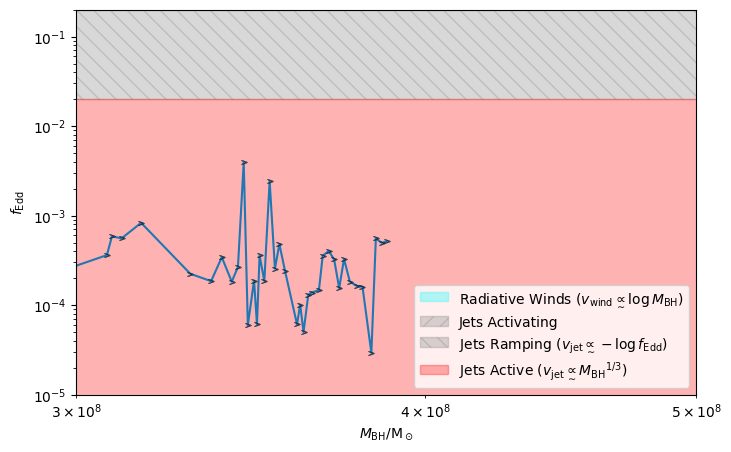

In [91]:
fig, ax = plt.subplots(num=1, figsize=(8,5),
                       nrows=1, ncols=1, sharey='row')

fedd_to_plot = copy.deepcopy(prop_dict['bh_fedd_central'])
fedd_to_plot[fedd_to_plot==0] = 1e-10
# fedd_to_plot[fedd_to_plot==-np.inf] = 1e-8

ax.plot(prop_dict['bh_mass_central'], fedd_to_plot, marker='$>$', ms=4, mew=0.25, mec='black')#, ls='')

# ax.axhline(y=0.2, color='grey', ls='-')
# ax.axhline(y=0.02, color='grey', ls='--')

ax.fill_betweenx(y=[0,1e1], x1=1e3, x2=7e7, color='cyan', alpha=0.3,
                 label=r'Radiative Winds ($v_{\mathrm{wind}} \underset{\sim}{\propto} \log M_{\mathrm{BH}}$)')
ax.fill_betweenx(y=[2e-1,1e1], x1=7e7, x2=1e9, color='cyan', alpha=0.3)

ax.fill_betweenx(y=[0,2e-1], x1=7e7, x2=1e8, color='grey', alpha=0.3, hatch='//', label='Jets Activating')
ax.fill_betweenx(y=[2e-2,2e-1], x1=7e7, x2=1e9, color='grey', alpha=0.3, hatch='\\\\',
                 label=r'Jets Ramping ($v_{\mathrm{jet}} \underset{\sim}{\propto} -\log f_{\mathrm{Edd}}$)')

ax.fill_betweenx(y=[0,2e-2], x1=1e8, x2=1e9, color='red', alpha=0.3,
                 label=r'Jets Active ($v_{\mathrm{jet}} \underset{\sim}{\propto} {M_{\mathrm{BH}}}^{1/3}$)')

# ax.text(x=1e8, y=1e-3, s='Jets Active')

ax.set_xlabel(r'$M_{\mathrm{BH}}/\mathrm{M_\odot}$')
ax.set_ylabel(r'$f_{\mathrm{Edd}}$')

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_ylim(1e-9,1e1)
ax.set_ylim(1e-5,2e-1)

# ax.set_xlim(1e4, 1e9)
# ax.set_xlim(-0.05e9, 1e9)
ax.set_xlim(3e8, 5e8)

ax.legend()

plt.show()